In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
from scipy.stats import chisquare, binomtest
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
dir_fig = 'fragile_x_all/'

In [3]:
### read methylation data instead of generating it again
### skip to plotting
file_methyl_in = f'{dir_fig}/methylation_table_complete.tsv'
df_methyl = pd.read_table(file_methyl_in, header=0, index_col=0, sep='\t', dtype={'in_trios': str, 'has_both_hps': str, 'both_hps_2_reads': str, 'both_hps_3_reads': str})
display(df_methyl)

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,...,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads
REACH000026,.,NaN,.,NaN,.,"22,10,10,0,2,7,4,2,20,19,20,2,18",.,.,.,.,...,.,.,.,.,FALSE,.,.,.,.,.
REACH000058,.,NaN,.,NaN,"51,51,51,57,51,51,52","3,4,9,10,2,2,7,2,39,8,12,1,17,0,0,1,1,14,29,10...",.,.,0|0|0|0|0|0|0|1|2|32|27|13|7|5|46|27|29|15|3|4...,.,...,.,.,.,.,FALSE,.,.,.,.,.
REACH000065,.,NaN,.,NaN,30,"9,10",.,.,62|37|36|51|8|2|0|0|0|0|0|7|46|88|91|87|84|66|...,.,...,.,.,.,.,FALSE,.,.,.,.,.
REACH000066,32,"1,12,34","31,43,30","87,0",.,"71,77,1,88",91|95|100|99|96|100|99|98|98|96|96|97|94|99|98...,64|20|7|2|0|0|0|0|0|0|2|0|1|0|0|0|0|0|3|2|6|2|...,.,31,...,0.0,1.0,31.333333333333332,31.0,TRUE,0.125,9.030899869919436,26-34 CGG,FALSE,FALSE
REACH000067,.,NaN,.,15,.,"7,0,11,23,55,0,2,3,4,0,0,8,46",.,.,9|14|13|23|14|22|13|13|29|12|20|2|7|5|9|18|6|4...,.,...,.,.,.,.,FALSE,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REACH000681,.,5,.,16,"-6,-8,-6,25","3,47,10,23,3,1,9,9,2,17,1,3,0,6,2,16,4,6,14,11...",.,.,0|9|59|2|56|0|0|0|0|0|0|0|0|0|6|0|0|11|0|1|9|0...,.,...,.,.,.,.,FALSE,.,.,.,.,.
REACH000682,"31,28,.,24","2,63,56,6,31,89,81,3,69,52,66,69,2,17,60,2,78,...","12,14","71,20,2,54,41,43,8,3,7,5,8,58,54,94,57,48,4,84...","30,26,-12","80,73,0,0",0|0|0|9|8|4|3|3|0|0|0|0|21|0|0|0|2|8|0|0|3|5|1...,45|97|100|100|100|100|100|22|89|17|92|100|95|1...,100|100|100|81|100|95|100|100|100|100|100|35|1...,"30,29,.,28",...,0.0,1.0,29.0,24.5,TRUE,0.03125,15.051499783199061,≤25 CGG,TRUE,FALSE
REACH000683,.,NaN,.,NaN,"31,26,23,31","2,6,4,1,1,20,7,4,33,9,19,4,1,1,0,0,6,6,3,2,1,2...",.,.,0|0|0|18|0|0|0|0|0|0|0|0|0|0|1|33|0|0|0|0|0|0|...,.,...,.,.,.,.,FALSE,.,.,.,.,.
REACH000684,"30,24,24",NaN,"23,15,24",NaN,.,"2,4,5,7,3,0,27,1,10,4,2,6,6,0,28,1,6,12,1,87,5...",3|58|0|2|5|0|0|0|0|0|0|0|0|0|0|0|0|0|0|14|0|0|...,0|0|0|8|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2|2|4|0|...,.,"30,28,28",...,.,.,.,.,FALSE,.,.,.,.,.


In [3]:
file_in = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/snoopsv_methyl/FMR1_ALL/methyl_data.tsv'
df = pd.read_table(file_in, sep='\t', header=0, keep_default_na=False)
df = df.loc[df.region_id.str.contains('_5UTR')].copy()
#df = df.reindex(index=[i for i in range(df.shape[0])])
#.reindex(labels=[])
print('df:')
display(df)

file_sam = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/snoopsv_methyl/FMR1_ALL/methyl_data_sample_order.txt'
with open(file_sam, 'r') as fh:
    sample_order = fh.readline().split(',')[:-1] # last one is an empty string
print(f'number of samples: {len(sample_order)}')
#print(f'sample order: {sample_order}')

df:


,chrom,pos,end,region_id,methyl_h1,methyl_h2,methyl_h0,bp_dev_h1,bp_dev_h2,bp_dev_h0,rn_h1,rn_h2,rn_h0,ps_h1,ps_h2
1,chrX,147911920,147912179,FMR1_5UTR,.;.;.;91|95|100|99|96|100|99|98|98|96|96|97|94...,.;.;.;64|20|7|2|0|0|0|0|0|0|2|0|1|0|0|0|0|0|3|...,.;0|0|0|0|0|0|0|1|2|32|27|13|7|5|46|27|29|15|3...,".;.;.;32;.;.;30;.;31,30;34;27,27,27,29;.;.;.;3...",".;.;.;31,43,30;.;.;30,28,28,31;.;30,30,32;34,2...",".;51,51,51,57,51,51,52;30;.;.;30;.;34,31;.;.;....",.;.;.;m54340U_200716_153006/27724288/ccs;.;.;m...,".;.;.;m54340U_200716_153006/75497573/ccs,m5434...",".;m54340U_210523_044800/52758275/ccs,m54340U_2...",".;.;.;10185;.;.;10215;.;10215,10215;10185;1018...",".;.;.;10185,10185,10185;.;.;10215,10215,10215,..."
7,chrX,149505139,149505306,IDS_5UTR,.;.;.;8|2|2|1|0|0|0|0|0|1|0|7|1|0|3|2|1|4|0|0|...,.;.;.;62|51|80|91|75|95|89|98|99|98|97|99|99|9...,.;0|2|0|1|0|1|6|2|1|8|9|13|6|3|4|8|5|0|1|0|0|0...,".;.;.;1;.;.;.;.;.;2;.;.;.;.;0,0,2;.;.;-1,1,0;....",".;.;.;0;.;.;.;.;.;.;.;.;.;.;.;.;.;1,0,1;.;.;.;...",".;0,2;3;.;0,0;0;-1,1,0,1;0,-2,0;0,0,-1,0;0,0,1...",.;.;.;m54340U_200716_153006/128059025/ccs;.;.;...,.;.;.;m54340U_200716_153006/133105829/ccs;.;.;...,".;m54340U_200806_070905/88277013/ccs,m54340U_2...",".;.;.;10185;.;.;.;.;.;10185;.;.;.;.;10185,1018...",".;.;.;10185;.;.;.;.;.;.;.;.;.;.;.;.;.;10185,10..."
8,chrX,149631582,149631792,TMEM185A_5UTR,.;.;.;.;.;.;95|91|35|70|18|12|12|62|41|61|26|6...,.;.;.;.;73|60|29|4|2|7|3|1|1|1|1|0|0|0|8|17|11...,5|0|0|0|0|13|5|7|20|56|43|61|72|96|91|64|21|11...,".;.;.;.;.;.;-21,-21,-21;.;-21,-15;.;15,9;.;0;....",".;.;.;.;-21;.;.,9,0;.;-21,-21;.;-21;.;-11;.;.;...","-21,-19;-21,-21,-21,-21,-18,-21,-21,-25;.;-19;...",.;.;.;.;.;.;m54340U_210703_193517/110166254/cc...,.;.;.;.;m54340U_200716_153006/94110941/ccs;.;m...,"m54340U_200716_001732/174262380/ccs,m54340U_20...",".;.;.;.;.;.;10215,10215,10215;.;10215,10215;.;...",".;.;.;.;10185;.;10215,10215,10215;.;10215,1021..."
9,chrX,150363318,150363530,MAMLD1_5UTR,.;.;.;3|2|5|5|4|1|3|3|1|0|0|0|0|0|0|0|0|0|0|4|...,.;.;.;.;.;.;71|65|46|44|7|4|0|0|0|0|0|2|64|66|...,0|2|2|2|0|0|1|6|1|3|2|49|71|55|13|6|11|26|7|5|...,".;.;.;0;.;.;-1;.;0,0;32,33,35,29,29,34,34;1,-1...",".;.;.;.;.;.;1,3;.;.;1,2,2;0,1,3;.;1,1;.;1,0;.;...","-1;0,0,0;.;.;0,3;4,1;1,0,1,1;0,1,0,0;.;.;.;37,...",.;.;.;m54340U_200716_153006/71501671/ccs;.;.;m...,.;.;.;.;.;.;m54340U_200806_223416/98175724/ccs...,m54340U_200716_001732/24969595/ccs;m54340U_210...,".;.;.;10185;.;.;10215;.;10215,10215;10185,1018...",".;.;.;.;.;.;10215,10215;.;.;10185,10185,10185;..."
10,chrX,150568622,150568662,MTM1_5UTR,".;.;.;.;.;.;.;.;.;3|13|4|2|0|0,98|99|98|95|97|...",".;.;.;.;.;.;.;.;.;100|100|100|100|100|100,45|5...","1|0|0|0|0|0,2|4|2|0|0|6,7|14|13|9|1|0,2|13|6|0...",".;.;.;.;.;.;.;.;.;0,0;0,0;.;0,0,0;.;.;.;.;0,0;...",".;.;.;.;.;.;.;.;.;0,2;0;.;0,-1;.;.;.;.;1;.;.;....","0,0,0,0,0;0,0,0;0;.;0,0;.;2,0,0,0;.;.,0,0,1,0,...",.;.;.;.;.;.;.;.;.;m54340U_200611_224317/158271...,.;.;.;.;.;.;.;.;.;m54340U_200611_224317/107350...,"m54340U_200716_001732/162859070/ccs,m54340U_20...",".;.;.;.;.;.;.;.;.;10185,10185;10185,10185;.;10...",".;.;.;.;.;.;.;.;.;10185,10185;10185;.;10185,10..."
11,chrX,150693397,150693530,MTMR1_5UTR,.;.;.;.;.;.;.;.;.;2|1|2|10|11|5|3|2|3|1|1|5|18...,.;.;.;.;.;.;.;.;.;.;.;.;2|0|0|5|2|5|12|23|34|4...,6|4|6|5|10|63|82|90|76|34|11|6|1|2|2|1|1|3|2|4...,".;.;.;.;.;.;.;.;.;1,0,1,0,2,0;1,2,2,1,1;.;.;.;...",".;.;.;.;.;.;.;.;.;.;.;.;-1,1,-1;.;0,2,3;.;.;0,...","1,0,0;0,0,0,0,2,0,1;.;0;0,0;0;0,0,0,1,1;0,-1,0...",.;.;.;.;.;.;.;.;.;m54340U_200611_224317/609751...,.;.;.;.;.;.;.;.;.;.;.;.;m54340U_200611_224317/...,"m54340U_200716_001732/53740679/ccs,m54340U_200...",".;.;.;.;.;.;.;.;.;10185,10185,10185,10185,1018...",".;.;.;.;.;.;.;.;.;.;.;.;10185,10185,10185;.;10..."
12,chrX,150898590,150898668,CD99L2_5UTR,.;.;.;8|7|9|52|43|81|48|25;.;.;88|47|83|82|98|...,".;.;.;2|0|0|1|0|0|0|0;.;.;0|0|0|0|0|0|0|13,62|...","0|0|1|0|1|1|6|4,1|1|1|4|3|16|46|69;0|0|0|0|1|1...",".;.;.;1;.;.;0,1;.;0;0,0,-1;0,0;.;0,0,1;.;.;.;....",".;.;.;1;.;.;0,0,0;.;.;0,0,1;2,

number of samples: 270


In [4]:
df_exnd = df[['chrom' ,'pos', 'end', 'region_id']].copy()
cols = df.columns.tolist()[4:]
#print(cols)

for idx, sample in enumerate(sample_order):
    #if sample == 'REACH000450' or sample == 'REACH000452':
    #    continue
    for col in cols:
        df_exnd[f'{sample}_{col}'] = df[col].str.split(';').apply(lambda row: row[idx])
display(df_exnd)

,chrom,pos,end,region_id,REACH000026_methyl_h1,REACH000026_methyl_h2,REACH000026_methyl_h0,REACH000026_bp_dev_h1,REACH000026_bp_dev_h2,REACH000026_bp_dev_h0,...,REACH000685_methyl_h2,REACH000685_methyl_h0,REACH000685_bp_dev_h1,REACH000685_bp_dev_h2,REACH000685_bp_dev_h0,REACH000685_rn_h1,REACH000685_rn_h2,REACH000685_rn_h0,REACH000685_ps_h1,REACH000685_ps_h2
1,chrX,147911920,147912179,FMR1_5UTR,.,.,.,.,.,.,...,.,2|0|15|0|2|4|35|71|4|0|1|7|0|10|0|2|0|0|0|0|58...,.,.,"13,17,33,29,16",.,.,"658567b8-0bb0-48a8-a85d-619f26f01f60,ec6386b7-...",.,.
7,chrX,149505139,149505306,IDS_5UTR,.,.,.,.,.,.,...,.,11|0|0|0|0|15|0|0|0|4|89|91|2|0|0|0|1|9|93|89|...,.,.,"6,-14,-3,-4,-29,-24,-17,-8,-69",.,.,"dbdc51c7-868d-4c1e-aef8-54b4be7616b1,ee73bd80-...",.,.
8,chrX,149631582,149631792,TMEM185A_5UTR,.,.,5|0|0|0|0|13|5|7|20|56|43|61|72|96|91|64|21|11...,.,.,"-21,-19",...,.,"100|4|30|7|40|97|0,0|0|0|0|2|0|0|1|0|0|0|0|2|2...",.,.,"-23,-13,-2,-8,-21,.",.,.,"0bdcf4ce-425a-4468-9796-785e0a2817f8,8d6dac54-...",.,.
9,chrX,150363318,150363530,MAMLD1_5UTR,.,.,0|2|2|2|0|0|1|6|1|3|2|49|71|55|13|6|11|26|7|5|...,.,.,-1,...,.,1|0|1|0|0|0|4|0|3|61|9|12|46|79|84|75|0|1|0|0|...,.,.,"-8,-3,-11,-2,-17,8,-5,-2",.,.,"b0ddb187-c71b-4f31-8e70-da57f39b8cff,9b1c13e4-...",.,.
10,chrX,150568622,150568662,MTM1_5UTR,.,.,"1|0|0|0|0|0,2|4|2|0|0|6,7|14|13|9|1|0,2|13|6|0...",.,.,"0,0,0,0,0",...,.,"40|36|9|41|79|30|22|2|45,4|2|0|0|0|0|5,0|4|0|1...",.,.,"9,-1,-2,2,6",.,.,"7178be63-b143-43d2-b646-7f250eee984a,3152af87-...",.,.
11,chrX,150693397,150693530,MTMR1_5UTR,.,.,6|4|6|5|10|63|82|90|76|34|11|6|1|2|2|1|1|3|2|4...,.,.,"1,0,0",...,.,"0|9|0|1|0|0|0|1|13|0|16|0|0|2|0|5,55|70|9|2|1|...",.,.,"-10,-2,5,0,-3,3,5,-5,-16,-4",.,.,"33acaac3-8252-404b-b9e8-e6c5fde090e9,21350c97-...",.,.
12,chrX,150898590,150898668,CD99L2_5UTR,.,.,"0|0|1|0|1|1|6|4,1|1|1|4|3|16|46|69",.,.,"0,0",...,"1|0|0|7|7|0|0|0|2,45|0|21|0|0|2|0|2","46|85,0|49|2|0|0|4|0|0,0|80|0|2|0|3|0|36,10|0",-3,"4,0","-6,-6,-5,.",5af74e3f-fde8-469d-9c44-8ca2cce771d2,"34a1e889-e5f6-4400-8f70-0d32c5afd4d6,7d1b38e0-...","1ae72adc-1d37-4141-bfa6-590e0ec211d1,46f0b406-...",10185,"10185,10185"
13,chrX,150983336,150983376,HMGB3_5UTR,.,.,.,.,.,.,...,.,"0|0|12|0,0|0|0|0|2",.,.,"-1,-6",.,.,"519f9439-750b-421f-9828-4705fb07f845,94933348-...",.,.


In [5]:
file_cov = '/expanse/projects/sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
#file_cov = '/tscc/projects/ps-sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
df_cov = pd.read_table(file_cov, header=0, sep='\t')
multiplat_samples = ['REACH000236', 'REACH000530', 'REACH000531', 'REACH000532', 'REACH000436']
df_cov['SAMPLE'] = df_cov.apply(lambda row: row['SAMPLE']+'_'+row['COHORT'] if row['SAMPLE'] in multiplat_samples else row['SAMPLE'], axis=1)
df_cov_high = df_cov.loc[df_cov.SAMPLE.str.startswith('REACH000') & (df_cov.MEAN_COVERAGE > 9)]
display(df_cov)
high_cov_samples = df_cov_high.SAMPLE.tolist()
#print(high_cov_samples)

def get_plat(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['COHORT'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

def get_cov(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['MEAN_COVERAGE'].values[0]
    except:
        print(f'problem with samples: {sample} in get_cov')
        ret = ''
    return ret

plat_dict = {sample: get_plat(sample) for sample in df_cov.SAMPLE.tolist()}
plat_dict['REACH000226_blood'] = plat_dict['REACH000226']
plat_dict['REACH000226_sperm'] = plat_dict['REACH000226']
#print('plat_dict:')
#print(plat_dict)

cov_dict = {sample: get_cov(sample) for sample in df_cov.SAMPLE.tolist()}
#print('cov_dict:')
#print(cov_dict)

,SAMPLE,COHORT,MEAN_COVERAGE
0,HG004,ONT,81.44
1,REACH000626,ONT,10.51
2,REACH000546,ONT,10.87
3,REACH000683,ONT,9.97
4,REACH000563,ONT,8.68
...,...,...,...
283,REACH000284,PB,3.43
284,REACH000672,PB,5.02
285,REACH000292,PB,9.00
286,REACH000066,PB,1.61


In [6]:
file_psam = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/process_IL_LR/HWE/REACH_LR_platform.psam'
df_p = pd.read_table(file_psam, sep='\t', header=None, names = ['famid', 'sample_id', 'dad', 'mom', 'sex', 'phen'])
#print('df_p:')
#display(df_p)
ds_sex = df_p.set_index('sample_id').sex
#display(ds_sex)

# make mom and dad dictionary
sample_dad_dict = {}
sample_mom_dict = {}
for sample, dad, mom in zip(df_p.sample_id, df_p.dad, df_p.mom):
    #print(sample, dad, mom)
    sample_dad_dict[sample] = dad
    sample_mom_dict[sample] = mom

#print('complete trios:')
df_trios = df_p.loc[df_p.dad.isin(df_p.sample_id) & df_p.mom.isin(df_p.sample_id)]
print('df_trios:')
display(df_trios.shape)

### make a samples dataframe containing all samples in complete trios
df_samples = pd.DataFrame()
df_samples['sample_id'] = df_trios['sample_id']
df_samples['rel'] = 'C'

df_dads = pd.DataFrame()
df_dads['sample_id'] =  list(set(df_trios['dad'].tolist()))
df_dads['rel'] = 'D'
df_samples = pd.concat([df_samples, df_dads])

df_moms = pd.DataFrame()
df_moms['sample_id'] =  list(set(df_trios['mom'].tolist()))
df_moms['rel'] = 'M'
df_samples = pd.concat([df_samples, df_moms])

df_samples['sex'] = df_samples.sample_id.map(ds_sex)
df_samples['plat'] = df_samples.sample_id.map(plat_dict)
df_samples['coverage'] = df_samples.sample_id.map(cov_dict)
### add blood/sperm sections for REACH000226
row_add = pd.DataFrame({'sample_id':['REACH000226_blood', 'REACH000226_sperm'] ,'rel':['D', 'D'] ,'sex':[1, 1] ,'plat':['ONT', 'ONT'] ,'coverage':[1.92, 27.87]})
df_samples = pd.concat([df_samples, row_add])
pd.set_option('display.max_rows', 10)
print('df_samples:')
display(df_samples)

print(df_samples.sex.value_counts())
print(df_samples.plat.value_counts())
print(df_samples.rel.value_counts())

print('===============================')
df_samples_flt = df_samples.loc[(df_samples.coverage>=2)]
print('df_samples_flt:')
display(df_samples_flt.shape)

print('===============================')
df_samples_flt_female_kids = df_samples_flt.loc[(df_samples_flt.sex==2)&(df_samples_flt.rel=='C')]
print('df_samples_flt_female_kids:')
display(df_samples_flt_female_kids.shape)
print(df_samples_flt_female_kids.plat.value_counts())

print('===============================')
df_samples_flt_females = df_samples_flt.loc[(df_samples_flt.sex==2)]
print('df_samples_flt_females:')
display(df_samples_flt_females.shape)
print(df_samples_flt_females.plat.value_counts())
print(df_samples_flt_females.rel.value_counts())

print('===============================')
df_samples_flt_males = df_samples_flt.loc[(df_samples_flt.sex==1)]
print('df_samples_flt_males:')
display(df_samples_flt_males.shape)
print(df_samples_flt_males.plat.value_counts())
print(df_samples_flt_males.rel.value_counts())
print(df_samples_flt_males.sample_id.tolist())

df_trios:


(117, 6)

df_samples:


,sample_id,rel,sex,plat,coverage
10,REACH000026,C,1,PB,3.22
11,REACH000058,C,1,PB,6.19
12,REACH000065,C,1,PB,1.22
15,REACH000086,C,1,PB,2.70
18,REACH000089,C,2,PB,3.27
...,...,...,...,...,...
60,REACH000098,M,2,PB,3.61
61,REACH000183,M,2,PB,3.24
62,REACH000451,M,2,PB,6.35
0,REACH000226_blood,D,1,ONT,1.92


sex
1    139
2    106
Name: count, dtype: int64
plat
PB     142
ONT    103
Name: count, dtype: int64
rel
C    117
D     65
M     63
Name: count, dtype: int64
df_samples_flt:


(206, 5)

df_samples_flt_female_kids:


(39, 5)

plat
ONT    23
PB     16
Name: count, dtype: int64
df_samples_flt_females:


(93, 5)

plat
PB     47
ONT    46
Name: count, dtype: int64
rel
M    54
C    39
Name: count, dtype: int64
df_samples_flt_males:


(113, 5)

plat
PB     57
ONT    56
Name: count, dtype: int64
rel
C    62
D    51
Name: count, dtype: int64
['REACH000026', 'REACH000058', 'REACH000086', 'REACH000097', 'REACH000120', 'REACH000159', 'REACH000162', 'REACH000182', 'REACH000185', 'REACH000194', 'REACH000197', 'REACH000214', 'REACH000222', 'REACH000233', 'REACH000287', 'REACH000288', 'REACH000291', 'REACH000292', 'REACH000293', 'REACH000356', 'REACH000441', 'REACH000537', 'REACH000643', 'REACH000650', 'REACH000653', 'REACH000671', 'REACH000708', 'REACH000730', 'REACH000747', 'REACH000750', 'REACH000762', 'REACH000767', 'REACH000001', 'REACH000154', 'REACH000400', 'REACH000403', 'REACH000414', 'REACH000419', 'REACH000422', 'REACH000423', 'REACH000426', 'REACH000427', 'REACH000428', 'REACH000448', 'REACH000476', 'REACH000483', 'REACH000501', 'REACH000514', 'REACH000517', 'REACH000529', 'REACH000532_ONT', 'REACH000540', 'REACH000544', 'REACH000558', 'REACH000559', 'REACH000560', 'REACH000564', 'REACH000626', 'REACH000663', 'REACH000681'

In [7]:
meta_file = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/REACH_sample_info.tsv'
df_meta = pd.read_table(meta_file, sep='\t', header=0)

rename_samples_dict = {'REACH000236': 'REACH000236_PB', 
                       'REACH000436': 'REACH000436_PB', 
                       'REACH000530': 'REACH000530_PB', 
                       'REACH000531': 'REACH000531_ONT', 
                       'REACH000532': 'REACH000532_ONT'}
df_meta['Sample_ID'] = df_meta.apply(lambda row: rename_samples_dict[row['Sample_ID']] 
                                     if row['Sample_ID'] in rename_samples_dict else row['Sample_ID'], axis=1)

aff_dict = {}
for sample, aff in zip(df_meta['Sample_ID'].tolist(), df_meta['Affected'].tolist()):
    aff_dict[sample] = aff

In [8]:
file_pca = '/expanse/projects/sebat1/j3guevar/SFARI/aspera-sf/SFARI_DS468588/data/master_phen_4.SBayesR.20210915.csv'

df_pca = pd.read_table(file_pca, sep=',', header=0)
cols = ['fid', 'iid', 'phen','sex','cohort','duo','family','is_eur','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 
        'PC1_PAT','PC2_PAT','PC3_PAT','PC4_PAT','PC5_PAT','PC6_PAT','PC7_PAT','PC8_PAT','PC9_PAT','PC10_PAT', 
        'PC1_MAT','PC2_MAT','PC3_MAT','PC4_MAT','PC5_MAT','PC6_MAT','PC7_MAT','PC8_MAT','PC9_MAT','PC10_MAT']
df_pca = df_pca[cols]

rename_samples_dict = {'REACH000236': 'REACH000236_PB', 
                       'REACH000436': 'REACH000436_PB', 
                       'REACH000530': 'REACH000530_PB', 
                       'REACH000531': 'REACH000531_ONT', 
                       'REACH000532': 'REACH000532_ONT'}
df_pca['iid'] = df_pca.apply(lambda row: rename_samples_dict[row['iid']] if row['iid'] in rename_samples_dict else row['iid'], axis=1)
#display(df_pca)

# first filter for the kids, then add parents to them
df_pca_flt = df_pca.loc[df_pca.iid.isin(df_trios.sample_id)].copy()
df_pca_flt['rel'] = 'C'
#print('df_pca_flt:')
#display(df_pca_flt)

df_parents = pd.DataFrame()
for index, row in df_pca_flt.iterrows():
    sample = row['iid']
    fid = row['fid']
    phen = row['phen']
    is_eur = row['is_eur']
    pc_mat = [row[f'PC{x}_MAT'] for x in range(1,11)]
    pc_pat = [row[f'PC{x}_PAT'] for x in range(1,11)]
    dad = sample_dad_dict[sample]
    mom = sample_mom_dict[sample]
    
    dict_mat = {'fid': [fid], 'iid': [mom], 'phen': ['.'], 'sex': ['Female'], 'cohort': [1], 'duo': ['.'], 'is_eur': [is_eur]}
    dict_mat.update({f'PC{x}': [pc_mat[x-1]] for x in range(1,11)})
    df_mat = pd.DataFrame(dict_mat)

    dict_pat = {'fid': [fid], 'iid': [dad], 'phen': ['.'], 'sex': ['Male'], 'cohort': [1], 'duo': ['.'], 'is_eur': [is_eur]}
    dict_pat.update({f'PC{x}': [pc_pat[x-1]] for x in range(1,11)})
    df_pat = pd.DataFrame(dict_pat)
    
    if df_parents.shape[0] == 0 or mom not in df_parents.iid.tolist():
        df_parents = pd.concat([df_parents, df_mat])
    if df_parents.shape[0] == 0 or dad not in df_parents.iid.tolist():
        df_parents = pd.concat([df_parents, df_pat])

df_parents['rel'] = 'P'
#print('df_parents:')
#display(df_parents)

df_pca_flt = pd.concat([df_pca_flt, df_parents])

df_pca_flt = pd.merge(df_pca_flt, df_meta[['Sample_ID', 'Affected', 'Affected_ASD']], how='inner', left_on='iid', right_on='Sample_ID')
df_pca_flt = pd.merge(df_pca_flt, df_cov[['SAMPLE', 'MEAN_COVERAGE']], how='inner', left_on='iid', right_on='SAMPLE')

df_pca_flt['Phenotype'] = df_pca_flt.apply(lambda row: 1 if row.Affected == 'Yes' else 0, axis=1)
#df_pca_flt['Phenotype_ASD'] = df_pca_flt.apply(lambda row: 1 if row.Affected_ASD == 'Yes' else 0, axis=1)
df_pca_flt['Platform'] = df_pca_flt.apply(lambda row: get_plat(row.iid), axis=1)
print('df_pca_flt:')
display(df_pca_flt)

df_pca_flt:


,fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,...,PC9_MAT,PC10_MAT,rel,Sample_ID,Affected,Affected_ASD,SAMPLE,MEAN_COVERAGE,Phenotype,Platform
0,F0001,REACH000001,ASD,Male,1,trio,1.0,1,0.008627,-0.005607,...,0.005399,-0.014983,C,REACH000001,Yes,Yes,REACH000001,10.15,1,ONT
1,F0026,REACH000026,ASD,Male,1,trio,1.0,0,0.095364,-0.045230,...,0.015895,-0.011925,C,REACH000026,Yes,Yes,REACH000026,3.22,1,PB
2,F0058,REACH000058,ASD,Male,1,trio,1.0,1,0.002422,-0.009216,...,0.020007,0.016383,C,REACH000058,Yes,Yes,REACH000058,6.19,1,PB
3,F0065,REACH000065,ASD,Male,1,trio,1.0,0,0.252774,0.107933,...,-0.012000,-0.009906,C,REACH000065,Yes,Yes,REACH000065,1.22,1,PB
4,F0078,REACH000086,ASD,Male,1,trio,2.0,0,0.044785,0.038065,...,0.006253,-0.018303,C,REACH000086,Yes,Yes,REACH000086,2.70,1,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,F0288,REACH000756,.,Male,1,.,NaN,0,0.204041,0.127559,...,NaN,NaN,P,REACH000756,No,No,REACH000756,1.55,0,PB
239,F0290,REACH000763,.,Female,1,.,NaN,1,-0.030630,0.003052,...,NaN,NaN,P,REACH000763,No,No,REACH000763,3.36,0,PB
240,F0290,REACH000764,.,Male,1,.,NaN,1,-0.027327,-0.004878,...,NaN,NaN,P,REACH000764,No,No,REACH000764,1.20,0,PB
241,F0291,REACH000768,.,Female,1,.,NaN,0,0.091442,-0.016917,...,NaN,NaN,P,REACH000768,No,No,REACH000768,0.10,0,PB


In [ ]:
### not needed really
file_tr_gts = 'fragile_x/FMR1_repeat_gts.tsv'
df_tr_gts = pd.read_table(file_tr_gts, header=0, sep='\t')
display(df_tr_gts)

### generate a dataframe showing haplotype repeat length for each sample/hap in LongTR genotype
this_df = df_tr_gts.loc[df_tr_gts.GB!='.'].copy()
this_df[['h1_bp_dev', 'h2_bp_dev']] = this_df.GB.str.split('|', expand=True).astype(int)
this_df[['h1_rep', 'h2_rep']] = (this_df[['h1_bp_dev', 'h2_bp_dev']] / 3).apply(round).astype(int) + 20
#this_df = this_df.set_index('Sample_id')
#display(this_df)

df_ltr = pd.DataFrame()
df_tmp = this_df[['Sample_id', 'h1_rep']].copy()
df_tmp['hp_tag'] = 'h1'
df_tmp = df_tmp.rename(columns={'Sample_id': 'subject', 'h1_rep': 'hp_rep'})
#display(df_tmp)
df_ltr = pd.concat([df_ltr, df_tmp])
df_tmp = this_df[['Sample_id', 'h2_rep']].copy()
df_tmp['hp_tag'] = 'h2'
df_tmp = df_tmp.rename(columns={'Sample_id': 'subject', 'h2_rep': 'hp_rep'})
df_ltr = pd.concat([df_ltr, df_tmp])
df_ltr = df_ltr.set_index(['subject', 'hp_tag'])
print('df_ltr:')
display(df_ltr)

In [ ]:
####################################### These cells below are written newly: 
####################################### generate a table of samples, and plot large vs small haplotype 
####################################### with classification and GMM models

In [9]:
### make a table of raw data for the paper.
pd.set_option('display.max_columns', None)
region_id = 'FMR1_5UTR'
xci_region_ids = ['IDS_5UTR', 'TMEM185A_5UTR', 'MAMLD1_5UTR', 'MTM1_5UTR', 'MTMR1_5UTR', 'CD99L2_5UTR', 'HMGB3_5UTR']
df_methyl = pd.DataFrame()

this_idx = df_exnd.loc[df_exnd.region_id==region_id].index.tolist()[0]
cols_bp = [f'bp_dev_h1', f'bp_dev_h2', f'bp_dev_h0']
cols_met = [f'methyl_h1', f'methyl_h2', f'methyl_h0']
for col in cols_bp+cols_met:
    col_out = f'xci_read_mean_methyl_lik_{col.split("_")[-1]}'
    df_methyl[col] = pd.Series(dtype='str')
    df_methyl[col_out] = pd.Series(dtype='str')

for sample in sample_order:
    #print(sample)
    #sample = 'REACH000561'
    
    ### set bp deviation columns
    for col in cols_bp:
        df_methyl.loc[sample, col] = df_exnd.loc[df_exnd.region_id==region_id].loc[this_idx, f'{sample}_{col}']
    
    ### set FMR1 methylation columns
    for col in cols_met:
        df_methyl.loc[sample, col] = df_exnd.loc[df_exnd.region_id==region_id].loc[this_idx, f'{sample}_{col}']

    ### set 7 XCI gene methylation columns
    for col in cols_met:
        col_out = f'xci_read_mean_methyl_lik_{col.split("_")[-1]}'
        read_met_list = [y for x in df_exnd.loc[df_exnd.region_id.isin(xci_region_ids)][f'{sample}_{col}'].tolist() for y in x.split(',') if y!='.']
        df_methyl.loc[sample, col_out] = ','.join([str(round(np.mean([float(xx) for xx in x.split('|')]))) for x in read_met_list])

#df_methyl = df_methyl.fillna('.')
#display(df_methyl)

### correct phasing of REACH000563 and REACH000561 manually
bp_dev_thr = 60
if ('REACH000563' in df_methyl.index):
    this_sample = 'REACH000563'
    # h1 and h2 are empty and we want to make them from h0 based on bp deviation
    df_methyl.loc[this_sample, 'bp_dev_h2'] = ','.join([x for x in df_methyl.loc[this_sample, 'bp_dev_h0'].split(',') if x != '.' and float(x)>bp_dev_thr])
    df_methyl.loc[this_sample, 'bp_dev_h1'] = ','.join([x for x in df_methyl.loc[this_sample, 'bp_dev_h0'].split(',') if x != '.' and float(x)<bp_dev_thr])
    df_methyl.loc[this_sample, 'methyl_h2'] = ','.join([m for b, m in zip(df_methyl.loc[this_sample, 'bp_dev_h0'].split(','),  
                                                                          df_methyl.loc[this_sample, 'methyl_h0'].split(',')) if b != '.' and float(b)>bp_dev_thr])
    df_methyl.loc[this_sample, 'methyl_h1'] = ','.join([m for b, m in zip(df_methyl.loc[this_sample, 'bp_dev_h0'].split(','),  
                                                                          df_methyl.loc[this_sample, 'methyl_h0'].split(',')) if b != '.' and float(b)<bp_dev_thr])
    df_methyl.loc[this_sample, 'methyl_h0'] = '.'
    df_methyl.loc[this_sample, 'bp_dev_h0'] = '.'

if ('REACH000561' in df_methyl.index):
    this_sample = 'REACH000561'
    ### first fix h2: bring one read from h1
    # one read in h1 has bp=83 and belongs to h2. we want to bring it in h2
    df_methyl.loc[this_sample, 'bp_dev_h2'] = ','.join(df_methyl.loc[this_sample, 'bp_dev_h2'].split(',') + 
                                               [x for x in df_methyl.loc[this_sample, 'bp_dev_h1'].split(',') if x != '.' and float(x)>bp_dev_thr])
    df_methyl.loc[this_sample, 'methyl_h2'] = ','.join(df_methyl.loc[this_sample, 'methyl_h2'].split(',') + 
                                                       [m for b, m in zip(df_methyl.loc[this_sample, 'bp_dev_h1'].split(','), 
                                                                          df_methyl.loc[this_sample, 'methyl_h1'].split(',')) if b != '.' and float(b)>bp_dev_thr])
    df_methyl.loc[this_sample, 'bp_dev_h1'] = ','.join([x for x in df_methyl.loc[this_sample, 'bp_dev_h1'].split(',') if x != '.' and float(x)<bp_dev_thr])
    df_methyl.loc[this_sample, 'methyl_h1'] = ','.join([m for b, m in zip(df_methyl.loc[this_sample, 'bp_dev_h1'].split(','),  
                                                                          df_methyl.loc[this_sample, 'methyl_h1'].split(',')) if b != '.' and float(b)<bp_dev_thr])
#display(df_methyl)

### compute repeat length based on bp deviation
for col in cols_bp:
    col_out = f'repeat_length_{col.split("_")[-1]}'
    df_methyl[col_out] = df_methyl[col].apply(lambda x: ','.join([str(round(float(xx) / 3) + 20) if xx!='.' else '.' for xx in x.split(',')]))
    
### take average of repeat length
cols_rep_len = [f'repeat_length_h1', f'repeat_length_h2', f'repeat_length_h0']
for col in cols_rep_len:
    df_methyl[f'mean_{col}'] = df_methyl.apply(lambda row: np.mean([float(x) for x in row[col].split(',') if x != '.']) 
                                                 if len([x for x in row[col].split(',') if x != '.'])>0 else '.', axis=1)

### compute mean methylation likelihood for each read
for col in cols_met:
    df_methyl[f'read_mean_methyl_lik_{col.split("_")[-1]}'] = df_methyl.apply(lambda row: ','.join([str(round(np.mean([float(xx) for xx in x.split('|')]))) for x in row[col].split(',') if x != '.'])
                                                                             if row[col] != '.' else '.', axis=1)
#display(df_methyl)
### set number of methylation/unmethylation reads
for col in cols_met:
    hp = col.split("_")[-1]
    df_methyl[f'num_methyl_reads_{hp}'] = df_methyl[f'read_mean_methyl_lik_{hp}'].apply(lambda x: len([xx for xx in x.split(',') if float(xx)>=50]) if x != '.' else '.')
    df_methyl[f'num_unmethyl_reads_{hp}'] = df_methyl[f'read_mean_methyl_lik_{hp}'].apply(lambda x: len([xx for xx in x.split(',') if float(xx)<50]) if x != '.' else '.')
    df_methyl[f'frac_hap_methyl_{hp}'] = df_methyl.apply(lambda row: int(row[f'num_methyl_reads_{hp}'])/(int(row[f'num_methyl_reads_{hp}'])+int(row[f'num_unmethyl_reads_{hp}'])) 
                                                           if (row[f'num_methyl_reads_{hp}']!='.' and row[f'num_unmethyl_reads_{hp}']!='.') else '.', axis=1)

### set 7 XCI gene number of methylation/unmethylation reads
for col in cols_met:
    hp = col.split("_")[-1]
    df_methyl[f'xci_num_methyl_reads_{hp}'] = df_methyl[f'xci_read_mean_methyl_lik_{hp}'].apply(lambda x: len([xx for xx in x.split(',') if float(xx)>=50]) if (x != '.' and x != '') else '.')
    df_methyl[f'xci_num_unmethyl_reads_{hp}'] = df_methyl[f'xci_read_mean_methyl_lik_{hp}'].apply(lambda x: len([xx for xx in x.split(',') if float(xx)<50]) if (x != '.' and x != '') else '.')
    df_methyl[f'xci_frac_hap_methyl_{hp}'] = df_methyl.apply(lambda row: int(row[f'xci_num_methyl_reads_{hp}'])/(int(row[f'xci_num_methyl_reads_{hp}'])+int(row[f'xci_num_unmethyl_reads_{hp}'])) 
                                                           if (row[f'xci_num_methyl_reads_{hp}']!='.' and row[f'xci_num_unmethyl_reads_{hp}']!='.') else '.', axis=1)


display(df_methyl)

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,repeat_length_h2,repeat_length_h0,mean_repeat_length_h1,mean_repeat_length_h2,mean_repeat_length_h0,read_mean_methyl_lik_h1,read_mean_methyl_lik_h2,read_mean_methyl_lik_h0,num_methyl_reads_h1,num_unmethyl_reads_h1,frac_hap_methyl_h1,num_methyl_reads_h2,num_unmethyl_reads_h2,frac_hap_methyl_h2,num_methyl_reads_h0,num_unmethyl_reads_h0,frac_hap_methyl_h0,xci_num_methyl_reads_h1,xci_num_unmethyl_reads_h1,xci_frac_hap_methyl_h1,xci_num_methyl_reads_h2,xci_num_unmethyl_reads_h2,xci_frac_hap_methyl_h2,xci_num_methyl_reads_h0,xci_num_unmethyl_reads_h0,xci_frac_hap_methyl_h0
REACH000026,.,,.,,.,"22,10,10,0,2,7,4,2,20,19,20,2,18",.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0,13,0.0
REACH000058,.,,.,,"51,51,51,57,51,51,52","3,4,9,10,2,2,7,2,39,8,12,1,17,0,0,1,1,14,29,10...",.,.,0|0|0|0|0|0|0|1|2|32|27|13|7|5|46|27|29|15|3|4...,.,.,"37,37,37,39,37,37,37",.,.,37.285714,.,.,"8,9,11,17,23,5,17",.,.,.,.,.,.,0,7,0.0,.,.,.,.,.,.,0,28,0.0
REACH000065,.,,.,,30,"9,10",.,.,62|37|36|51|8|2|0|0|0|0|0|7|46|88|91|87|84|66|...,.,.,30,.,.,30.0,.,.,22,.,.,.,.,.,.,0,1,0.0,.,.,.,.,.,.,0,2,0.0
REACH000066,32,"1,12,34","31,43,30","87,0",.,"71,77,1,88",91|95|100|99|96|100|99|98|98|96|96|97|94|99|98...,64|20|7|2|0|0|0|0|0|0|2|0|1|0|0|0|0|0|3|2|6|2|...,.,31,"30,34,30",.,31.0,31.333333,.,79,"8,42,3",.,1,0,1.0,0,3,0.0,.,.,.,0,3,0.0,1,1,0.5,3,1,0.75
REACH000067,.,,.,15,.,"7,0,11,23,55,0,2,3,4,0,0,8,46",.,.,9|14|13|23|14|22|13|13|29|12|20|2|7|5|9|18|6|4...,.,.,.,.,.,.,.,.,11,.,.,.,.,.,.,0,1,0.0,.,.,.,0,1,0.0,1,12,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REACH000681,.,5,.,16,"-6,-8,-6,25","3,47,10,23,3,1,9,9,2,17,1,3,0,6,2,16,4,6,14,11...",.,.,0|9|59|2|56|0|0|0|0|0|0|0|0|0|6|0|0|11|0|1|9|0...,.,.,"18,17,18,28",.,.,20.25,.,.,"4,25,5,11",.,.,.,.,.,.,0,4,0.0,0,1,0.0,0,1,0.0,1,31,0.03125
REACH000682,"31,28,.,24","2,63,56,6,31,89,81,3,69,52,66,69,2,17,60,2,78,...","12,14","71,20,2,54,41,43,8,3,7,5,8,58,54,94,57,48,4,84...","30,26,-12","80,73,0,0",0|0|0|9|8|4|3|3|0|0|0|0|21|0|0|0|2|8|0|0|3|5|1...,45|97|100|100|100|100|100|22|89|17|92|100|95|1...,100|100|100|81|100|95|100|100|100|100|100|35|1...,"30,29,.,28","24,25","30,29,16",29.0,24.5,25.0,"8,2,5,3","74,86","70,8,12",0,4,0.0,2,0,1.0,1,2,0.333333,13,18,0.419355,8,20,0.285714,2,2,0.5
REACH000683,.,,.,,"31,26,23,31","2,6,4,1,1,20,7,4,33,9,19,4,1,1,0,0,6,6,3,2,1,2...",.,.,0|0|0|18|0|0|0|0|0|0|0|0|0|0|1|33|0|0|0|0|0|0|...,.,.,"30,29,28,30",.,.,29.25,.,.,"2,4,29,6",.,.,.,.,.,.,0,4,0.0,.,.,.,.,.,.,0,29,0.0
REACH000684,"30,24,24",,"23,15,24",,.,"2,4,5,7,3,0,27,1,10,4,2,6,6,0,28,1,6,12,1,87,5...",3|58|0|2|5|0|0|0|0|0|0|0|0|0|0|0|0|0|0|14|0|0|...,0|0|0|8|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2|2|4|0|...,.,"30,28,28","28,25,28",.,28.666667,27.0,.,"2,7,3","1,13,3",.,0,3,0.0,0,3,0.0,.,.,.,.,.,.,.,.,.,2,30,0.0625


In [10]:
### correction for some large deviation families after averaging over corresponding haplotypes in children and parents
### subjects corrected: 
#REACH000519, C, F
#REACH000518, C, F
#REACH000523, M, F
#REACH000524, D, M

hp_c_h1 = (df_methyl.loc['REACH000519', 'repeat_length_h1'] + ',' + 
           df_methyl.loc['REACH000518', 'repeat_length_h1'] + ',' + 
           df_methyl.loc['REACH000524', 'repeat_length_h0']).split(',')
hp_c_h1 = np.mean([float(x) for x in hp_c_h1])
print(f'hp_c_h1: {hp_c_h1}')
df_methyl.loc['REACH000519', 'mean_repeat_length_h1'] = hp_c_h1
df_methyl.loc['REACH000518', 'mean_repeat_length_h1'] = hp_c_h1
df_methyl.loc['REACH000524', 'mean_repeat_length_h0'] = hp_c_h1

hp_c1_h2 = (df_methyl.loc['REACH000519', 'repeat_length_h2'] + ',' + 
            df_methyl.loc['REACH000523', 'repeat_length_h1']).split(',')
hp_c1_h2 = np.mean([float(x) for x in hp_c1_h2])
print(f'hp_c1_h2: {hp_c1_h2}')
df_methyl.loc['REACH000519', 'mean_repeat_length_h2'] = hp_c1_h2
df_methyl.loc['REACH000523', 'mean_repeat_length_h1'] = hp_c1_h2

hp_c2_h2 = (df_methyl.loc['REACH000518', 'repeat_length_h2'] + ',' + 
            df_methyl.loc['REACH000523', 'repeat_length_h2']).split(',')
hp_c2_h2 = np.mean([float(x) for x in hp_c2_h2])
print(f'hp_c2_h2: {hp_c2_h2}')
df_methyl.loc['REACH000518', 'mean_repeat_length_h2'] = hp_c2_h2
df_methyl.loc['REACH000523', 'mean_repeat_length_h2'] = hp_c2_h2

hp_c_h1: 35.0
hp_c1_h2: 20.833333333333332
hp_c2_h2: 29.444444444444443


In [11]:
### subjects corrected: 
#REACH000563, C, F
#REACH000560, C, M
#REACH000561, M, F
#REACH000562, D, M

hp_c_h1 = (df_methyl.loc['REACH000563', 'repeat_length_h1'] + ',' + 
           df_methyl.loc['REACH000562', 'repeat_length_h0']).split(',')
hp_c_h1 = np.mean([float(x) for x in hp_c_h1])
print(f'hp_c_h1: {hp_c_h1}')
df_methyl.loc['REACH000563', 'mean_repeat_length_h1'] = hp_c_h1
df_methyl.loc['REACH000562', 'mean_repeat_length_h0'] = hp_c_h1

hp_c1_h2 = (df_methyl.loc['REACH000563', 'repeat_length_h2'] + ',' + 
            df_methyl.loc['REACH000561', 'repeat_length_h2']).split(',')
hp_c1_h2 = np.mean([float(x) for x in hp_c1_h2])
print(f'hp_c1_h2: {hp_c1_h2}')
df_methyl.loc['REACH000563', 'mean_repeat_length_h2'] = hp_c1_h2
df_methyl.loc['REACH000561', 'mean_repeat_length_h2'] = hp_c1_h2

hp_m_h1 = (df_methyl.loc['REACH000561', 'repeat_length_h1']).split(',')
hp_m_h1 = np.mean([float(x) for x in hp_m_h1])
print(f'hp_m_h1: {hp_m_h1}')
df_methyl.loc['REACH000561', 'mean_repeat_length_h1'] = hp_m_h1

hp_c_h1: 26.375
hp_c1_h2: 49.111111111111114
hp_m_h1: 28.25


In [12]:
### subjects corrected: 
#REACH000453, C, F
#REACH000451, M, F

hp_c1_h2 = (df_methyl.loc['REACH000453', 'repeat_length_h2'] + ',' + 
            df_methyl.loc['REACH000451', 'repeat_length_h2']).split(',')
hp_c1_h2 = np.mean([float(x) for x in hp_c1_h2])
print(f'hp_c1_h2: {hp_c1_h2}')
df_methyl.loc['REACH000453', 'mean_repeat_length_h2'] = hp_c1_h2
df_methyl.loc['REACH000451', 'mean_repeat_length_h2'] = hp_c1_h2

hp_c_h1 = (df_methyl.loc['REACH000453', 'repeat_length_h1']).split(',')
hp_c_h1 = np.mean([float(x) for x in hp_c_h1])
print(f'hp_c_h1: {hp_c_h1}')
df_methyl.loc['REACH000453', 'mean_repeat_length_h1'] = hp_c_h1

hp_m_h1 = (df_methyl.loc['REACH000451', 'repeat_length_h1']).split(',')
hp_m_h1 = np.mean([float(x) for x in hp_m_h1])
print(f'hp_m_h1: {hp_m_h1}')
df_methyl.loc['REACH000451', 'mean_repeat_length_h1'] = hp_m_h1

hp_c1_h2: 49.4
hp_c_h1: 31.2
hp_m_h1: 28.8


In [16]:
#df_methyl = df_methyl.loc[df_methyl.index != 'REACH000226_blood']
df_methyl['sample_id'] = df_methyl.index.map(lambda x: x if 'REACH000226' not in x else 'REACH000226')
df_methyl['rel'] = df_methyl.index.map(df_samples.set_index('sample_id').rel)
df_methyl['sex'] = df_methyl.index.map(df_samples.set_index('sample_id').sex.apply(lambda x: 'Male' if x==1 else 'Female'))
df_methyl['coverage'] = df_methyl.index.map(df_samples.set_index('sample_id').coverage)
df_methyl['Platform'] = df_methyl.index.map(df_samples.set_index('sample_id').plat)
df_methyl['Affected'] = df_methyl.sample_id.map(df_meta.set_index('Sample_ID').Affected)
df_methyl['in_trios'] = df_methyl.index.map(lambda x: 'TRUE' if x in df_pca_flt.iid.tolist() or x=='REACH000226_sperm' else 'FALSE')
#display(df_methyl)

### for those subjects with both haplotypes present (must be females), compute large and small haplotype stats (frac, mean rep, skewness)
### haplotype of col_in_1 must correspond to col_out_1 and the same for _2
### output is large: first, small: second
#def get_large_small_vals(row, min_num_reads, col_in_1, col_in_2, col_out_1, col_out_2):
def get_large_small_vals(row, col_in_1, col_in_2, col_out_1, col_out_2):
    if row.sex != 'Female':
        return '.', '.'
    if row.num_methyl_reads_h1 == '.' or row.num_methyl_reads_h2 == '.':
        return '.', '.'
    #if (row.num_methyl_reads_h1 + row.num_unmethyl_reads_h1 < min_num_reads) or (row.num_methyl_reads_h2 + row.num_unmethyl_reads_h2 < min_num_reads):
    #    return '.', '.'
    if row[col_in_1] >= row[col_in_2]:
        out = (row[col_out_1], row[col_out_2])
    else:
        out = (row[col_out_2], row[col_out_1])
    return out


### figure out which hp is the large and with is the small CGG repeat
col_in_1 = 'mean_repeat_length_h1'
col_in_2 = 'mean_repeat_length_h2'
col_out_1 = 'frac_hap_methyl_h1'
col_out_2 = 'frac_hap_methyl_h2'
#df_methyl[['frac_hap_methyl_large_rep', 'frac_hap_methyl_small_rep']] = df_methyl.apply(lambda row: get_large_small_vals(row, num_reads_thr, col_in_1, col_in_2, 
#                                                                                                                         col_out_1, col_out_2), axis=1, result_type = 'expand')
df_methyl[['frac_hap_methyl_large_rep', 'frac_hap_methyl_small_rep']] = df_methyl.apply(lambda row: get_large_small_vals(row, col_in_1, col_in_2, 
                                                                                                                         col_out_1, col_out_2), axis=1, result_type = 'expand')

col_in_1 = 'mean_repeat_length_h1'
col_in_2 = 'mean_repeat_length_h2'
col_out_1 = 'mean_repeat_length_h1'
col_out_2 = 'mean_repeat_length_h2'
#df_methyl[['mean_large_rep', 'mean_small_rep']] = df_methyl.apply(lambda row: get_large_small_vals(row, num_reads_thr, col_in_1, col_in_2, 
#                                                                                                   col_out_1, col_out_2), axis=1, result_type = 'expand')
df_methyl[['mean_large_rep', 'mean_small_rep']] = df_methyl.apply(lambda row: get_large_small_vals(row, col_in_1, col_in_2, 
                                                                                                   col_out_1, col_out_2), axis=1, result_type = 'expand')

df_methyl['has_both_hps'] = df_methyl.mean_large_rep.map(lambda x: 'TRUE' if x!='.' else 'FALSE')

def get_binomtest_pval(row):
    if row.has_both_hps == 'FALSE':
        return '.'
    k = row.num_methyl_reads_h1 + row.num_unmethyl_reads_h2
    n = row.num_methyl_reads_h1 + row.num_unmethyl_reads_h1 + row.num_methyl_reads_h2 + row.num_unmethyl_reads_h2
    return binomtest(k, n, p=0.5, alternative='two-sided').pvalue

df_methyl['binomial_pval'] = df_methyl.apply(lambda row: get_binomtest_pval(row), axis=1)
df_methyl['binomial_phred'] = df_methyl['binomial_pval'].apply(lambda x: -10*np.log10(x) if x!='.' else '.')

def get_rep_group(row):
    if row.has_both_hps == 'FALSE':
        return '.'
    out = ('≥35 CGG' if ((row.mean_repeat_length_h1 >= 35) or 
                         (row.mean_repeat_length_h2 >= 35)) else 
           ('≤25 CGG' if ((row.mean_repeat_length_h1 <= 25) or 
                          (row.mean_repeat_length_h2 <= 25)) else '26-34 CGG'))
    return out
df_methyl['repeat_group'] = df_methyl.apply(lambda row: get_rep_group(row), axis=1)

### last column: both haplotype has certain number of reads
def get_min_reads(row, num_reads_thr=2):
    if row.sex != 'Female':
        return '.'
    if row.num_methyl_reads_h1 == '.' or row.num_methyl_reads_h2 == '.':
        return '.'
    if (row.num_methyl_reads_h1 + row.num_unmethyl_reads_h1 >= num_reads_thr) and (row.num_methyl_reads_h2 + row.num_unmethyl_reads_h2 >= num_reads_thr):
        return 'TRUE'
    else:
        return 'FALSE'

num_reads_thr = 2
df_methyl['both_hps_2_reads'] = df_methyl.apply(lambda row: get_min_reads(row, num_reads_thr), axis=1)
num_reads_thr = 3
df_methyl['both_hps_3_reads'] = df_methyl.apply(lambda row: get_min_reads(row, num_reads_thr), axis=1)

print(df_methyl['in_trios'].value_counts())
#pd.set_option('display.max_rows', None)
#display(df_methyl.loc[df_methyl.in_trios=='FALSE'])
#pd.set_option('display.max_rows', 10)

print(df_methyl['Affected'].value_counts())

display(df_methyl)
### write the table
file_name = f'{dir_fig}/methylation_table_complete.tsv'
print(file_name)
df_methyl.to_csv(file_name, sep='\t', index=True)

in_trios
TRUE     242
FALSE     28
Name: count, dtype: int64
Affected
No     176
Yes     89
Name: count, dtype: int64


,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,repeat_length_h2,repeat_length_h0,mean_repeat_length_h1,mean_repeat_length_h2,mean_repeat_length_h0,read_mean_methyl_lik_h1,read_mean_methyl_lik_h2,read_mean_methyl_lik_h0,num_methyl_reads_h1,num_unmethyl_reads_h1,frac_hap_methyl_h1,num_methyl_reads_h2,num_unmethyl_reads_h2,frac_hap_methyl_h2,num_methyl_reads_h0,num_unmethyl_reads_h0,frac_hap_methyl_h0,xci_num_methyl_reads_h1,xci_num_unmethyl_reads_h1,xci_frac_hap_methyl_h1,xci_num_methyl_reads_h2,xci_num_unmethyl_reads_h2,xci_frac_hap_methyl_h2,xci_num_methyl_reads_h0,xci_num_unmethyl_reads_h0,xci_frac_hap_methyl_h0,sample_id,rel,sex,coverage,Platform,Affected,in_trios,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads
REACH000026,.,,.,,.,"22,10,10,0,2,7,4,2,20,19,20,2,18",.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0,13,0.0,REACH000026,C,Male,3.22,PB,Yes,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000058,.,,.,,"51,51,51,57,51,51,52","3,4,9,10,2,2,7,2,39,8,12,1,17,0,0,1,1,14,29,10...",.,.,0|0|0|0|0|0|0|1|2|32|27|13|7|5|46|27|29|15|3|4...,.,.,"37,37,37,39,37,37,37",.,.,37.285714,.,.,"8,9,11,17,23,5,17",.,.,.,.,.,.,0,7,0.0,.,.,.,.,.,.,0,28,0.0,REACH000058,C,Male,6.19,PB,Yes,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000065,.,,.,,30,"9,10",.,.,62|37|36|51|8|2|0|0|0|0|0|7|46|88|91|87|84|66|...,.,.,30,.,.,30.0,.,.,22,.,.,.,.,.,.,0,1,0.0,.,.,.,.,.,.,0,2,0.0,REACH000065,C,Male,1.22,PB,Yes,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000066,32,"1,12,34","31,43,30","87,0",.,"71,77,1,88",91|95|100|99|96|100|99|98|98|96|96|97|94|99|98...,64|20|7|2|0|0|0|0|0|0|2|0|1|0|0|0|0|0|3|2|6|2|...,.,31,"30,34,30",.,31.0,31.333333,.,79,"8,42,3",.,1,0,1.0,0,3,0.0,.,.,.,0,3,0.0,1,1,0.5,3,1,0.75,REACH000066,M,Female,1.61,PB,No,TRUE,0.0,1.0,31.333333,31.0,TRUE,0.125,9.0309,26-34 CGG,FALSE,FALSE
REACH000067,.,,.,15,.,"7,0,11,23,55,0,2,3,4,0,0,8,46",.,.,9|14|13|23|14|22|13|13|29|12|20|2|7|5|9|18|6|4...,.,.,.,.,.,.,.,.,11,.,.,.,.,.,.,0,1,0.0,.,.,.,0,1,0.0,1,12,0.076923,REACH000067,D,Male,1.42,PB,No,TRUE,.,.,.,.,FALSE,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REACH000681,.,5,.,16,"-6,-8,-6,25","3,47,10,23,3,1,9,9,2,17,1,3,0,6,2,16,4,6,14,11...",.,.,0|9|59|2|56|0|0|0|0|0|0|0|0|0|6|0|0|11|0|1|9|0...,.,.,"18,17,18,28",.,.,20.25,.,.,"4,25,5,11",.,.,.,.,.,.,0,4,0.0,0,1,0.0,0,1,0.0,1,31,0.03125,REACH000681,C,Male,10.04,ONT,Yes,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000682,"31,28,.,24","2,63,56,6,31,89,81,3,69,52,66,69,2,17,60,2,78,...","12,14","71,20,2,54,41,43,8,3,7,5,8,58,54,94,57,48,4,84...","30,26,-12","80,73,0,0",0|0|0|9|8|4|3|3|0|0|0|0|21|0|0|0|2|8|0|0|3|5|1...,45|97|100|100|100|100|100|22|89|17|92|100|95|1...,100|100|100|81|100|95|100|100|100|100|100|35|1...,"30,29,.,28","24,25","30,29,16",29.0,24.5,25.0,"8,2,5,3","74,86","70,8,12",0,4,0.0,2,0,1.0,1,2,0.333333,13,18,0.419355,8,20,0.285714,2,2,0.5,REACH000682,M,Female,8.63,ONT,No,TRUE,0.0,1.0,29.0,24.5,TRUE,0.03125,15.0515,≤25 CGG,TRUE,FALSE
REACH000683,.,,.,,"31,26,23,31","2,6,4,1,1,20,7,4,33,9,19,4,1,1,0,0,6,6,3,2,1,2...",.,.,0|0|0|18|0|0|0|0|0|0|0|0|0|0|1|33|0|0|0|0|0|0|...,.,.,"30,29,28,30",.,.,29.25,.,.,"2,4,29,6",.,.,.,.,.,.,0,4,0.0,.,.,.,.,.,.,0,29,0.0,REACH000683,D,Male,9.97,ONT,No,TRUE,.,.,.,.,FALSE,.,.,.,.,.
REACH000684,"30,24,24",,"23,15,24",,.,"2,4,5,7,3,0,27,1,10,4,2,6,6,0,28,1,6,12,1,87,5...",3|58|0|2|5|0|0|0|0|0|0|0|0|0|0|0|0|0|0|14|0|0|...,0|0|0|8|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2|2|4|0|...,.,"30,28,28","28,25,28",.,28.666667,27.0,.,"2,7,3","1,13,3",.,0,3,0.0,0,3,0.0,.,.,.,.,.,.,.,.,.,2,30,0.0625,REACH000684,C,Male,7.84,ONT,No,TRUE,.,.,.,.,FALSE,.,.,.,.,.


fragile_x_all//methylation_table_complete.tsv


In [ ]:
##################### New generation plots ###########################

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,...,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads
REACH000089,"31,30","54,51,2,91,51","30,30,32","82,52,94",.,"47,5,6,28,11,1,0,22,4,96,7,13,13,25,78,83,81,9...",5|9|3|4|24|19|29|89|99|100|100|99|97|99|93|76|...,82|69|81|83|45|73|55|13|24|33|82|67|43|60|86|9...,.,"30,30",...,0.6666666666666666,0.5,30.333333333333332,30.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,FALSE
REACH000220,"28,26,27,27","93,6,11,8,77,7,44,1,1,68,98","27,27,27,.","1,4,0,1,58,0,91,8,79,89,97,54,66,55,64,0,3,13,45",.,"32,7,6,5,41,7",0|0|0|2|1|11|7|1|2|1|2|11|2|12|2|24|11|6|1|1|0...,99|96|100|100|100|100|100|100|100|100|100|99|1...,.,"29,29,29,29",...,0.25,0.25,29.0,29.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,TRUE
REACH000230,"32,28","0,5,98","-1,0,7","75,1,2,27",.,"62,14,65,80",0|0|0|0|0|2|13|4|22|16|11|18|6|0|1|1|2|2|0|1|0...,61|79|92|98|98|99|100|99|97|100|99|99|98|98|98...,.,"31,29",...,0.0,0.6666666666666666,30.0,20.666666666666668,TRUE,0.375,4.259687322722812,≤25 CGG,TRUE,FALSE
REACH000234,"29,27,27","10,8,80,74,11,8,80,28,55,63,0,46,21,43,81,69,9...","33,30,32,33,30","33,10,4,0,35,23,26,92,5,0,9,8,8,83,85,4,40,3,1...",.,"3,31,92",29|44|69|88|87|49|39|23|65|53|33|57|55|48|47|1...,92|44|99|100|100|100|99|99|100|100|100|100|98|...,.,"30,29,29",...,0.8,0.6666666666666666,30.6,29.333333333333332,TRUE,0.7265625,1.3872702109393327,26-34 CGG,TRUE,TRUE
REACH000314,"27,29,28,30","85,96,57,8,78","30,37","100,7,15,79,17,34,9,1,21,4,84,96,4,68,2,3,46,9...",38,62,0|0|1|27|11|19|4|10|43|8|1|0|0|0|0|0|0|1|1|1|1...,5|1|10|14|5|7|5|9|59|29|4|5|20|23|10|6|2|1|0|0...,44|62|73|59|25|36|58|81|98|98|97|92|93|98|82|7...,"29,30,29,30",...,0.5,0.5,31.0,29.5,TRUE,1.0,-0.0,26-34 CGG,TRUE,FALSE
REACH000365,"30,30,29,30,30,32,.","2,5,0,30","27,27,27,30","97,46,90,92,100,90,99",.,"50,13,2,34,96,33,96,7,61,28,80,58,0,9,92,49,0,...",98|82|100|100|99|100|100|100|100|100|100|100|1...,97|66|94|100|89|85|19|31|21|0|0|0|0|13|9|11|58...,.,"30,30,30,30,30,31,.",...,0.42857142857142855,0.75,30.166666666666668,29.25,TRUE,0.548828125,2.6056364107075085,26-34 CGG,TRUE,TRUE
REACH000436_PB,"15,12,9,8","59,0,81,0,3,11,36,19,4,31,0,62,0,19,64,0,3,100","30,27,30,30,30,30","0,44,43,0,48,50,67,80,0,90,0,0,0,71",.,"0,0,99,33,1,84,91,0,29,0,0,0,76,17",4|6|5|6|0|0|0|0|1|2|1|4|7|9|2|2|2|6|3|0|3|28|5...,0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0|0|...,.,"25,24,23,23",...,0.3333333333333333,0.5,29.833333333333332,23.75,TRUE,0.75390625,1.226826563040758,≤25 CGG,TRUE,TRUE
REACH000451,"24,27,27,27,27","20,1,99,95,99,94,16,4,0,78,7,88,44,99,0,0,3,0,...","81,91","100,6,0,0,7,0,0,1,97,93,95,100,39,0,1,99,3,98,...",.,"0,91,32,0,100,0,0,15,100,100,1,98,0,22",0|0|0|0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0|...,59|90|82|99|12|93|98|98|100|100|100|100|100|10...,.,"28,29,29,29,29",...,1.0,0.2,49.4,28.8,TRUE,0.125,9.030899869919436,≥35 CGG,TRUE,FALSE
REACH000453,"33,33,33,36,33","0,86,0,1,0,84,52,1,81,79,69,76,1,0,0,0,53,1,99...","97,84,90","87,0,0,0,0,93,3,1,1,100,2,68,96,99,99,0,86,72,...",.,"10,3,0,80,90,70,1,100,83,2,23,100,0,0,92",59|95|99|100|99|100|100|97|90|78|91|100|100|10...,94|100|100|100|100|99|99|99|100|99|95|99|100|9...,.,"31,31,31,32,31",...,1.0,0.6,49.4,31.2,TRUE,0.7265625,1.3872702109393327,≥35 CGG,TRUE,TRUE
REACH000628,"30,31,30,32,.","16,69,58,0,100,92,2,96,98,94,99,0,18,0,98,97,8...","27,27,27,26,30","52,77,86,82,94,4,0,22",.,"62,30,91,0,1,81,81,10,0,73,100,0,2,87,98,5,98,...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,7|12|7|3|0|0|0|0|0|0|0|0|0|0|3|1|2|2|6|27|6|4|...,.,"30,30,30,31,.",...,0.6,0.0,30.25,29.2,TRUE,0.109375,9.610819339696304,26-34 CGG,TRUE,TRUE


stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     8.865
Date:                Mon, 28 Apr 2025   Prob (F-statistic):            0.00541
Time:                        10:51:36   Log-Likelihood:                -4.4335
No. Observations:                  35   AIC:                             12.87
Df Residuals:                      33   BIC:                             15.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  

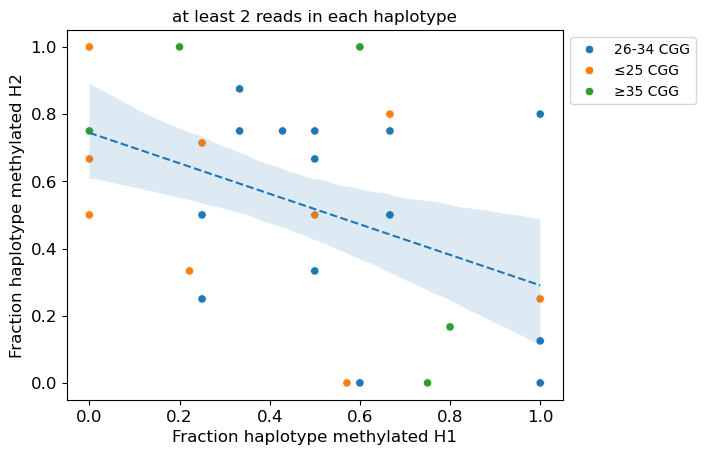

In [14]:
### plot fraction haplotype methylated h1 vs h2

#df_methyl_plt = df_methyl.loc[df_methyl.has_both_hps=='TRUE'].copy()
df_methyl_plt = df_methyl.loc[(df_methyl.has_both_hps=='TRUE') & (df_methyl.both_hps_2_reads=='TRUE')].copy()

col = 'frac_hap_methyl_h1'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_h2'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)

pd.set_option('display.max_rows', None)
display(df_methyl_plt)
pd.set_option('display.max_rows', 10)
#display(df_methyl_plt)

y = np.array(df_methyl_plt.frac_hap_methyl_h2.tolist())
X = pd.DataFrame(df_methyl_plt.frac_hap_methyl_h1)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

FS = 12
plt.figure()
sb.scatterplot(data=df_methyl_plt, x='frac_hap_methyl_h1', y='frac_hap_methyl_h2', hue='repeat_group') #, hue='subject', size='num_reads', sizes=(5,20))
sb.regplot(data=df_methyl_plt, x='frac_hap_methyl_h1', y='frac_hap_methyl_h2', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #title = 'binomial phred'
plt.xlabel('Fraction haplotype methylated H1', fontsize=FS)
plt.ylabel('Fraction haplotype methylated H2', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.title('at least 2 reads in each haplotype')
fig_name = f'{dir_fig}/frac_hap_methyl_h1_vs_h2.png'
#print(fig_name)
#plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,...,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads
REACH000089,"31,30","54,51,2,91,51","30,30,32","82,52,94",.,"47,5,6,28,11,1,0,22,4,96,7,13,13,25,78,83,81,9...",5|9|3|4|24|19|29|89|99|100|100|99|97|99|93|76|...,82|69|81|83|45|73|55|13|24|33|82|67|43|60|86|9...,.,"30,30",...,0.666667,0.500000,30.333333333333332,30.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,FALSE
REACH000220,"28,26,27,27","93,6,11,8,77,7,44,1,1,68,98","27,27,27,.","1,4,0,1,58,0,91,8,79,89,97,54,66,55,64,0,3,13,45",.,"32,7,6,5,41,7",0|0|0|2|1|11|7|1|2|1|2|11|2|12|2|24|11|6|1|1|0...,99|96|100|100|100|100|100|100|100|100|100|99|1...,.,"29,29,29,29",...,0.250000,0.250000,29.0,29.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,TRUE
REACH000230,"32,28","0,5,98","-1,0,7","75,1,2,27",.,"62,14,65,80",0|0|0|0|0|2|13|4|22|16|11|18|6|0|1|1|2|2|0|1|0...,61|79|92|98|98|99|100|99|97|100|99|99|98|98|98...,.,"31,29",...,0.000000,0.666667,30.0,20.666666666666668,TRUE,0.375,4.259687322722812,≤25 CGG,TRUE,FALSE
REACH000234,"29,27,27","10,8,80,74,11,8,80,28,55,63,0,46,21,43,81,69,9...","33,30,32,33,30","33,10,4,0,35,23,26,92,5,0,9,8,8,83,85,4,40,3,1...",.,"3,31,92",29|44|69|88|87|49|39|23|65|53|33|57|55|48|47|1...,92|44|99|100|100|100|99|99|100|100|100|100|98|...,.,"30,29,29",...,0.800000,0.666667,30.6,29.333333333333332,TRUE,0.7265625,1.3872702109393327,26-34 CGG,TRUE,TRUE
REACH000314,"27,29,28,30","85,96,57,8,78","30,37","100,7,15,79,17,34,9,1,21,4,84,96,4,68,2,3,46,9...",38,62,0|0|1|27|11|19|4|10|43|8|1|0|0|0|0|0|0|1|1|1|1...,5|1|10|14|5|7|5|9|59|29|4|5|20|23|10|6|2|1|0|0...,44|62|73|59|25|36|58|81|98|98|97|92|93|98|82|7...,"29,30,29,30",...,0.500000,0.500000,31.0,29.5,TRUE,1.0,-0.0,26-34 CGG,TRUE,FALSE
REACH000365,"30,30,29,30,30,32,.","2,5,0,30","27,27,27,30","97,46,90,92,100,90,99",.,"50,13,2,34,96,33,96,7,61,28,80,58,0,9,92,49,0,...",98|82|100|100|99|100|100|100|100|100|100|100|1...,97|66|94|100|89|85|19|31|21|0|0|0|0|13|9|11|58...,.,"30,30,30,30,30,31,.",...,0.428571,0.750000,30.166666666666668,29.25,TRUE,0.548828125,2.6056364107075085,26-34 CGG,TRUE,TRUE
REACH000436_PB,"15,12,9,8","59,0,81,0,3,11,36,19,4,31,0,62,0,19,64,0,3,100","30,27,30,30,30,30","0,44,43,0,48,50,67,80,0,90,0,0,0,71",.,"0,0,99,33,1,84,91,0,29,0,0,0,76,17",4|6|5|6|0|0|0|0|1|2|1|4|7|9|2|2|2|6|3|0|3|28|5...,0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0|0|...,.,"25,24,23,23",...,0.333333,0.500000,29.833333333333332,23.75,TRUE,0.75390625,1.226826563040758,≤25 CGG,TRUE,TRUE
REACH000451,"24,27,27,27,27","20,1,99,95,99,94,16,4,0,78,7,88,44,99,0,0,3,0,...","81,91","100,6,0,0,7,0,0,1,97,93,95,100,39,0,1,99,3,98,...",.,"0,91,32,0,100,0,0,15,100,100,1,98,0,22",0|0|0|0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0|...,59|90|82|99|12|93|98|98|100|100|100|100|100|10...,.,"28,29,29,29,29",...,1.000000,0.200000,49.4,28.8,TRUE,0.125,9.030899869919436,≥35 CGG,TRUE,FALSE
REACH000453,"33,33,33,36,33","0,86,0,1,0,84,52,1,81,79,69,76,1,0,0,0,53,1,99...","97,84,90","87,0,0,0,0,93,3,1,1,100,2,68,96,99,99,0,86,72,...",.,"10,3,0,80,90,70,1,100,83,2,23,100,0,0,92",59|95|99|100|99|100|100|97|90|78|91|100|100|10...,94|100|100|100|100|99|99|99|100|99|95|99|100|9...,.,"31,31,31,32,31",...,1.000000,0.600000,49.4,31.2,TRUE,0.7265625,1.3872702109393327,≥35 CGG,TRUE,TRUE
REACH000628,"30,31,30,32,.","16,69,58,0,100,92,2,96,98,94,99,0,18,0,98,97,8...","27,27,27,26,30","52,77,86,82,94,4,0,22",.,"62,30,91,0,1,81,81,10,0,73,100,0,2,87,98,5,98,...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,7|12|7|3|0|0|0|0|0|0|0|0|0|0|3|1|2|2|6|27|6|4|...,.,"30,30,30,31,.",...,0.600000,0.000000,30.25,29.2,TRUE,0.109375,9.610819339696304,26-34 CGG,TRUE,TRUE


stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     8.865
Date:                Mon, 28 Apr 2025   Prob (F-statistic):            0.00541
Time:                        10:52:35   Log-Likelihood:                -4.4335
No. Observations:                  35   AIC:                             12.87
Df Residuals:                      33   BIC:                             15.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  

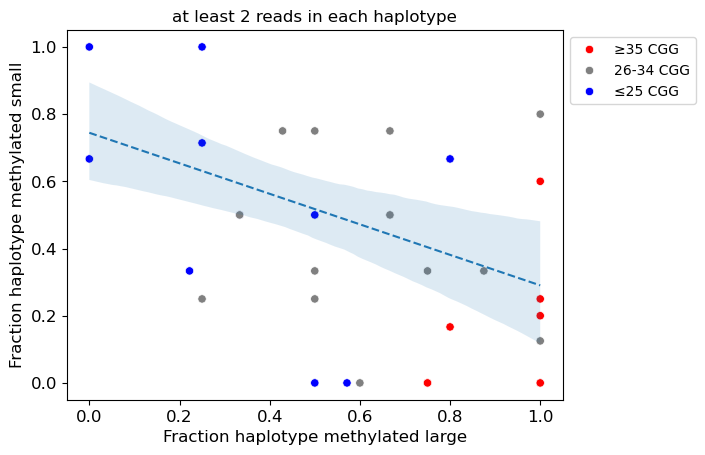

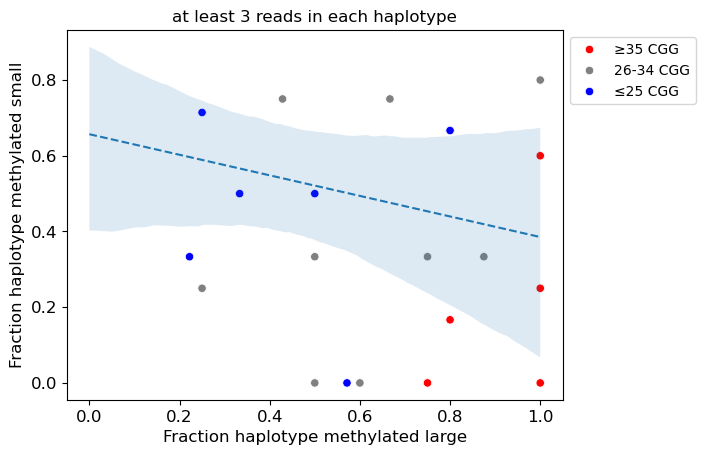

In [15]:
### plot fraction haplotype methylated hp large vs small

df_methyl_plt = df_methyl.loc[(df_methyl.has_both_hps=='TRUE') & (df_methyl.both_hps_2_reads=='TRUE')].copy()

col = 'frac_hap_methyl_h1'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_h2'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_large_rep'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_small_rep'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)

pd.set_option('display.max_rows', None)
display(df_methyl_plt)
pd.set_option('display.max_rows', 10)
#display(df_methyl_plt)

y = np.array(df_methyl_plt.frac_hap_methyl_h2.tolist())
X = pd.DataFrame(df_methyl_plt.frac_hap_methyl_h1)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')
            
FS = 12
plt.figure()
sb.scatterplot(data=df_methyl_plt, x='frac_hap_methyl_large_rep', y='frac_hap_methyl_small_rep', 
               hue='repeat_group', hue_order=['≥35 CGG', '26-34 CGG', '≤25 CGG'], palette=['red', 'gray', 'blue']) #, hue='subject', size='num_reads', sizes=(5,20))
sb.regplot(data=df_methyl_plt, x='frac_hap_methyl_h1', y='frac_hap_methyl_h2', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #title = 'binomial phred'
plt.xlabel('Fraction haplotype methylated large', fontsize=FS)
plt.ylabel('Fraction haplotype methylated small', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.title('at least 2 reads in each haplotype')
fig_name = f'{dir_fig}/frac_hap_methyl_h1_vs_h2.png'
#print(fig_name)
#plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

plt.figure()
sb.scatterplot(data=df_methyl_plt.loc[df_methyl_plt.both_hps_3_reads=='TRUE'], x='frac_hap_methyl_large_rep', y='frac_hap_methyl_small_rep', 
               hue='repeat_group', hue_order=['≥35 CGG', '26-34 CGG', '≤25 CGG'], palette=['red', 'gray', 'blue']) #, hue='subject', size='num_reads', sizes=(5,20))
sb.regplot(data=df_methyl_plt.loc[df_methyl_plt.both_hps_3_reads=='TRUE'], x='frac_hap_methyl_h1', y='frac_hap_methyl_h2', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #title = 'binomial phred'
plt.xlabel('Fraction haplotype methylated large', fontsize=FS)
plt.ylabel('Fraction haplotype methylated small', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.title('at least 3 reads in each haplotype')
fig_name = f'{dir_fig}/frac_hap_methyl_h1_vs_h2.png'
#print(fig_name)
#plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,...,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads
REACH000230,"32,28","0,5,98","-1,0,7","75,1,2,27",.,"62,14,65,80",0|0|0|0|0|2|13|4|22|16|11|18|6|0|1|1|2|2|0|1|0...,61|79|92|98|98|99|100|99|97|100|99|99|98|98|98...,.,"31,29",...,0.000000,0.666667,30.0,20.666666666666668,TRUE,0.375,4.259687322722812,≤25 CGG,TRUE,FALSE
REACH000436_PB,"15,12,9,8","59,0,81,0,3,11,36,19,4,31,0,62,0,19,64,0,3,100","30,27,30,30,30,30","0,44,43,0,48,50,67,80,0,90,0,0,0,71",.,"0,0,99,33,1,84,91,0,29,0,0,0,76,17",4|6|5|6|0|0|0|0|1|2|1|4|7|9|2|2|2|6|3|0|3|28|5...,0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0|0|...,.,"25,24,23,23",...,0.333333,0.500000,29.833333333333332,23.75,TRUE,0.75390625,1.226826563040758,≤25 CGG,TRUE,TRUE
REACH000451,"24,27,27,27,27","20,1,99,95,99,94,16,4,0,78,7,88,44,99,0,0,3,0,...","81,91","100,6,0,0,7,0,0,1,97,93,95,100,39,0,1,99,3,98,...",.,"0,91,32,0,100,0,0,15,100,100,1,98,0,22",0|0|0|0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0|...,59|90|82|99|12|93|98|98|100|100|100|100|100|10...,.,"28,29,29,29,29",...,1.000000,0.200000,49.4,28.8,TRUE,0.125,9.030899869919436,≥35 CGG,TRUE,FALSE
REACH000453,"33,33,33,36,33","0,86,0,1,0,84,52,1,81,79,69,76,1,0,0,0,53,1,99...","97,84,90","87,0,0,0,0,93,3,1,1,100,2,68,96,99,99,0,86,72,...",.,"10,3,0,80,90,70,1,100,83,2,23,100,0,0,92",59|95|99|100|99|100|100|97|90|78|91|100|100|10...,94|100|100|100|100|99|99|99|100|99|95|99|100|9...,.,"31,31,31,32,31",...,1.000000,0.600000,49.4,31.2,TRUE,0.7265625,1.3872702109393327,≥35 CGG,TRUE,TRUE
REACH000404,"38,28,14,24","70,12,17,12,3,3,3,45,72,7,73,6,1,6,4,12,32,58,...","30,-2,-6,7,2,-22,-15","75,86,66,7,9,81,64,47,81,83,8,64,16,1,68,3,48,...","10,-21,-5,-20","82,62,2,59,64,1,6,10,25,7,85,43,35,3,58,79,71,...",15|89|65|0|45|100|84|1|0|0|0|26|0|0|0|44|1|29|...,95|69|100|95|89|100|99|99|99|100|100|100|98|10...,0|0|0|0|0|1|2|7|14|0|0|0|0|0|0|89|0|0|22|7|1|0...,"33,29,25,28",...,0.250000,0.714286,28.75,19.714285714285715,TRUE,0.2265625,6.4481197174891225,≤25 CGG,TRUE,TRUE
REACH000417,"23,-23,29","79,62,76,3,34,59,5,4,1,74,45,7,8,2,1,35,66,6","48,3,23,26,30","86,45,78,55,56,63,5,12,38,10,62,97","30,.","73,4,23,47,58,84,43,80,7,64,3,5,94,70,4,79,71,...",100|0|100|3|29|99|64|0|100|2|0|7|98|100|99|89|...,99|58|83|100|91|100|100|100|100|100|29|37|65|5...,0|90|100|52|80|100|100|99|100|100|99|100|100|1...,"28,12,30",...,0.800000,0.666667,28.8,23.333333333333332,TRUE,0.7265625,1.3872702109393327,≤25 CGG,TRUE,TRUE
REACH000420,"-9,-1,-1,0,-2,1","73,68,18,0,1,1,39,26,8,0,9","25,9","75,4,62,94,72,74,2,82,100,80","30,22,7,2,20","20,5,5,61,1,2,50,9,10,79,51,60,84,62,82,2,80,4...",0|0|0|15|0|2|3|0|0|0|0|62|49|7|16|1|60|0|0|0|0...,100|62|100|90|100|100|100|100|80|89|99|76|67|1...,100|99|99|100|100|63|98|96|100|32|86|77|91|89|...,"17,20,20,20,19,20",...,0.500000,0.000000,25.5,19.333333333333332,TRUE,0.0703125,11.529674602085436,≤25 CGG,TRUE,FALSE
REACH000435,"17,45,26,35,19,22,18","59,50,15,66,55,66,13,51","5,11,-5","63,2,78,3,4,16,1,2,52,43,3,31","26,34,-9,16","80,62,6,51,7,45,28,18,0,24,1,80,2,70,23,58,22,...",64|99|1|93|96|90|82|48|16|38|100|99|97|0|52|60...,0|0|1|13|0|0|0|0|0|0|0|0|0|0|6|23|7|0|0|70|41|...,72|100|100|98|100|97|93|100|100|100|100|100|79...,"26,35,29,32,26,27,26",...,0.571429,0.000000,28.714285714285715,21.333333333333332,TRUE,0.34375,4.637572931616809,≤25 CGG,TRUE,TRUE
REACH000479,"48,42,43,51,57","81,81,67,67,77,78,67,86,93,69,88,91,72,99,3,98...","-5,-4,0,-4,57,-3","16,71,16,3,1,79,54,61,1,13,5,2,6,2,2,0,12,75,1...","42,-7,1","22,14,8,3,75,2,79,74,15,77,13,55,15,7,67,67,42...",82|0|99|82|100|0|100|99|100|70|97|100|100|5|0|...,7|3|0|31|3|98|52|5|0|0|2|36|38|95|38|4|3|3|1|6...,93|98|100|100|98|59|100|100|32|100|100|100|99|...,"36,34,34,37,39",...,0.800000,0.166667,36.0,22.333333333

fragile_x_all//frac_hap_methyl_h1_vs_h2_GMM.png


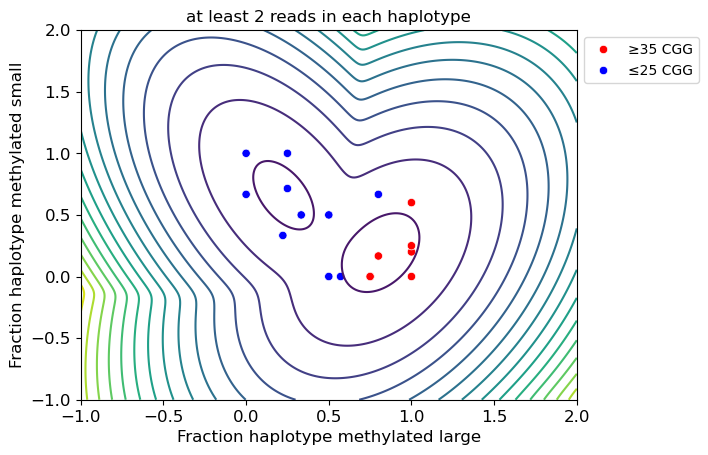

In [35]:
### plot fraction haplotype methylated large vs small with a GMM
from sklearn.mixture import GaussianMixture

#df_methyl_plt = df_methyl.loc[df_methyl.has_both_hps=='TRUE'].copy()
df_methyl_plt = df_methyl.loc[(df_methyl.has_both_hps=='TRUE') & (df_methyl.both_hps_2_reads=='TRUE')].copy()

col = 'frac_hap_methyl_h1'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_h2'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_large_rep'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_small_rep'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)

### only look at the large and small groups
df_methyl_plt = df_methyl_plt.loc[df_methyl_plt.repeat_group != '26-34 CGG']

pd.set_option('display.max_rows', None)
display(df_methyl_plt)
pd.set_option('display.max_rows', 10)
#display(df_methyl_plt)

# Fit GMM
X = np.array(df_methyl_plt[['frac_hap_methyl_large_rep', 'frac_hap_methyl_small_rep']])
#display(X)
#display(np.array(X))
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

# Create grid for contour
x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300)
y = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
X_grid, Y_grid = np.meshgrid(x, y)
XY_grid = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

# Compute the GMM likelihood at each point in the grid
Z = -gmm.score_samples(XY_grid)  # negative log-likelihood
Z = Z.reshape(X_grid.shape)

FS = 12
plt.figure()
sb.scatterplot(data=df_methyl_plt, x='frac_hap_methyl_large_rep', y='frac_hap_methyl_small_rep', 
               hue='repeat_group', hue_order=['≥35 CGG', '≤25 CGG'], palette=['red',  'blue']) #, hue='subject', size='num_reads', sizes=(5,20))
plt.contour(X_grid, Y_grid, Z, levels=15, cmap='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #title = 'binomial phred'
plt.xlabel('Fraction haplotype methylated large', fontsize=FS)
plt.ylabel('Fraction haplotype methylated small', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
#plt.xlim((-0.1, 1.1))
#plt.ylim((-0.1, 1.1))
plt.title('at least 2 reads in each haplotype')
fig_name = f'{dir_fig}/frac_hap_methyl_h1_vs_h2_GMM.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,...,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads,Read count
REACH000220,"28,26,27,27","93,6,11,8,77,7,44,1,1,68,98","27,27,27,.","1,4,0,1,58,0,91,8,79,89,97,54,66,55,64,0,3,13,45",.,"32,7,6,5,41,7",0|0|0|2|1|11|7|1|2|1|2|11|2|12|2|24|11|6|1|1|0...,99|96|100|100|100|100|100|100|100|100|100|99|1...,.,"29,29,29,29",...,0.250000,29.0,29.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,TRUE,8
REACH000234,"29,27,27","10,8,80,74,11,8,80,28,55,63,0,46,21,43,81,69,9...","33,30,32,33,30","33,10,4,0,35,23,26,92,5,0,9,8,8,83,85,4,40,3,1...",.,"3,31,92",29|44|69|88|87|49|39|23|65|53|33|57|55|48|47|1...,92|44|99|100|100|100|99|99|100|100|100|100|98|...,.,"30,29,29",...,0.666667,30.6,29.333333333333332,TRUE,0.7265625,1.3872702109393327,26-34 CGG,TRUE,TRUE,8
REACH000365,"30,30,29,30,30,32,.","2,5,0,30","27,27,27,30","97,46,90,92,100,90,99",.,"50,13,2,34,96,33,96,7,61,28,80,58,0,9,92,49,0,...",98|82|100|100|99|100|100|100|100|100|100|100|1...,97|66|94|100|89|85|19|31|21|0|0|0|0|13|9|11|58...,.,"30,30,30,30,30,31,.",...,0.750000,30.166666666666668,29.25,TRUE,0.548828125,2.6056364107075085,26-34 CGG,TRUE,TRUE,11
REACH000436_PB,"15,12,9,8","59,0,81,0,3,11,36,19,4,31,0,62,0,19,64,0,3,100","30,27,30,30,30,30","0,44,43,0,48,50,67,80,0,90,0,0,0,71",.,"0,0,99,33,1,84,91,0,29,0,0,0,76,17",4|6|5|6|0|0|0|0|1|2|1|4|7|9|2|2|2|6|3|0|3|28|5...,0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0|0|...,.,"25,24,23,23",...,0.500000,29.833333333333332,23.75,TRUE,0.75390625,1.226826563040758,≤25 CGG,TRUE,TRUE,10
REACH000453,"33,33,33,36,33","0,86,0,1,0,84,52,1,81,79,69,76,1,0,0,0,53,1,99...","97,84,90","87,0,0,0,0,93,3,1,1,100,2,68,96,99,99,0,86,72,...",.,"10,3,0,80,90,70,1,100,83,2,23,100,0,0,92",59|95|99|100|99|100|100|97|90|78|91|100|100|10...,94|100|100|100|100|99|99|99|100|99|95|99|100|9...,.,"31,31,31,32,31",...,0.600000,49.4,31.2,TRUE,0.7265625,1.3872702109393327,≥35 CGG,TRUE,TRUE,8
REACH000628,"30,31,30,32,.","16,69,58,0,100,92,2,96,98,94,99,0,18,0,98,97,8...","27,27,27,26,30","52,77,86,82,94,4,0,22",.,"62,30,91,0,1,81,81,10,0,73,100,0,2,87,98,5,98,...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,7|12|7|3|0|0|0|0|0|0|0|0|0|0|3|1|2|2|6|27|6|4|...,.,"30,30,30,31,.",...,0.000000,30.25,29.2,TRUE,0.109375,9.610819339696304,26-34 CGG,TRUE,TRUE,10
REACH000672,"30,29,30","86,1,11,71,69,8,10,1,0,0,83,100,100,0,1","30,30,30,30,30","63,95,91,3,1,94,88,100",.,"0,73,74,2,83,84,3,95,75,44",97|94|100|100|100|100|100|100|100|100|100|100|...,75|99|98|100|98|99|88|8|57|98|100|100|97|100|1...,.,"30,30,30",...,0.800000,30.0,30.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,TRUE,8
REACH000674,"30,30,30","89,0,10,6,14,92,0,2,11,54,94,1,87,0,3,2","31,33,30,34,30,30","0,45,61,57,3,32,88,17,95,99,0,98,54,95,0,84,100",.,"1,0,69,0,80,87,0,0,1,0,14,62,0,63,0,86,59,72,9...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,98|98|98|100|99|99|99|99|99|100|100|99|99|100|...,.,"30,30,30",...,0.000000,30.333333333333332,30.0,TRUE,0.5078125,2.942966130050128,26-34 CGG,TRUE,TRUE,9
REACH000702,"27,27,27,27,27,32","42,62,93,89,9,40,39,12,66,74,4,70,0,4,4,0","30,30,30,31,29,35,30,30","86,84,0,98,67,61,19,83,96,68,23,41,23,29,64,0",.,"2,49,0,0,0,74,74,77,82,38,72,86,11,73,67,0,75,...",0|0|0|0|0|0|0|0|2|4|0|2|5|1|0|0|0|0|0|0|0|0|0|...,13|11|91|100|99|100|100|100|100|98|99|98|38|96...,.,"29,29,29,29,29,31",...,0.333333,30.25,29.333333333333332,TRUE,0.057373046875,12.412920856960381,26-34 CGG,TRUE,TRUE,14
REACH000107,"24,27,24,30","77,1,2,59,46,61,65,3,0,1,1,6,91,84,87,4,16,67,...","21,26,26","42,41,74,64,3,66,78,10,87,74,0,2,78,66,9,0,8,6...","33,34,16,26,30,25,18","19,85,9,81,83,3,2,77,4,7,74,5,2,5,6,2,20,79,14",0|86|100|91|66|100|100|100|100|97|98|0|0|0|100...,100|94|100|99|0|0|100|96|0|99|4|99|100|100|95|...,2|100|98|90|100|1|25|95|100|7|1|0|1|67|100|99|...,"28,29,28,30"

array([[1.        , 0.25      , 0.25      ],
       [1.        , 0.8       , 0.66666667],
       [1.        , 0.42857143, 0.75      ],
       [1.        , 0.33333333, 0.5       ],
       [1.        , 1.        , 0.6       ],
       [1.        , 0.6       , 0.        ],
       [1.        , 1.        , 0.8       ],
       [1.        , 0.5       , 0.        ],
       [1.        , 0.875     , 0.33333333],
       [1.        , 0.5       , 0.33333333],
       [1.        , 0.25      , 0.71428571],
       [1.        , 0.8       , 0.66666667],
       [1.        , 0.57142857, 0.        ],
       [1.        , 0.8       , 0.16666667],
       [1.        , 0.22222222, 0.33333333],
       [1.        , 0.66666667, 0.75      ],
       [1.        , 0.75      , 0.        ],
       [1.        , 1.        , 0.25      ],
       [1.        , 0.75      , 0.33333333],
       [1.        , 1.        , 0.        ],
       [1.        , 0.5       , 0.5       ]])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/smmortazavi/micromamba/envs/bioinf/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.000005
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   21
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        15:00:53   Log-Likelihood:            -0.00010688
converged:                      False   LL-Null:                       -11.526
Covariance Type:            nonrobust   LLR p-value:                 9.868e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7637.7500   7.26e+04     -0.105      0.916    -1.5e+05    1.35e+05
x1          1.058e+04   1.01e+05      0.105      0.916   -1.87e+0

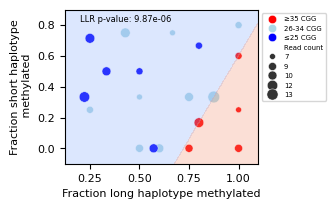

In [4]:
### plot classification of ≥35 with other groups in terms of large vs small haplotypes
import statsmodels.api as sm

df_methyl_plt = df_methyl.loc[(df_methyl.has_both_hps=='TRUE') & (df_methyl.both_hps_3_reads=='TRUE')].copy()
df_methyl_plt['Read count'] = (df_methyl_plt.num_methyl_reads_h1.astype(int) + df_methyl_plt.num_unmethyl_reads_h1.astype(int) + 
                              df_methyl_plt.num_methyl_reads_h2.astype(int) + df_methyl_plt.num_unmethyl_reads_h2.astype(int))

col = 'frac_hap_methyl_h1'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_h2'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_large_rep'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)
col = 'frac_hap_methyl_small_rep'
df_methyl_plt[col] = df_methyl_plt[col].astype(float)

### only look at the large and small groups
#df_methyl_plt = df_methyl_plt.loc[df_methyl_plt.repeat_group != '26-34 CGG']

pd.set_option('display.max_rows', None)
display(df_methyl_plt)
pd.set_option('display.max_rows', 10)

# Logistic regression
X = np.array(df_methyl_plt[['frac_hap_methyl_large_rep', 'frac_hap_methyl_small_rep']])
X_with_intercept = sm.add_constant(X) # Add intercept (statsmodels doesn't add it automatically)
display(X_with_intercept)
y = np.array(df_methyl_plt.repeat_group.map(lambda x: 1 if x == '≥35 CGG' else 0)) # Class labels: 0 and 1
display(y)

# Fit logistic regression using statsmodels
model = sm.Logit(y, X_with_intercept)
result = model.fit()

# Summary includes p-values
print(result.summary())

# Create a grid of values
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 300),
                     np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_with_const = sm.add_constant(grid)

# Predict probabilities for each point in the grid
probs = result.predict(grid_with_const).reshape(xx.shape)

FS = 8
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_methyl_plt, x='frac_hap_methyl_large_rep', y='frac_hap_methyl_small_rep', 
               hue='repeat_group', hue_order=['≥35 CGG', '26-34 CGG', '≤25 CGG'], palette=['red',  'lightblue', 'blue'], size='Read count') #, hue='subject', size='num_reads', sizes=(5,20))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.3)
plt.text(x=.2, y=.82, s=f'LLR p-value: {result.llr_pvalue:.2e}', fontsize=FS-2)
plt.legend(title = '', loc='upper left', bbox_to_anchor=(1, 1), 
           handles=plt.gca().legend_.legend_handles[1:], fontsize=FS-3, title_fontsize=FS-3) #title = 'binomial phred'
plt.xlabel('Fraction long haplotype methylated', fontsize=FS)
plt.ylabel('Fraction short haplotype\n methylated', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
#plt.xlim((-0.1, 1.1))
#plt.ylim((-0.1, 1.1))
fig_name = f'{dir_fig}/frac_hap_methyl_h1_vs_h2_logid_classify.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

(106, 53)
(54, 53)
(41, 53)
(35, 53)


,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,...,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads
REACH000089,"31,30","54,51,2,91,51","30,30,32","82,52,94",.,"47,5,6,28,11,1,0,22,4,96,7,13,13,25,78,83,81,9...",5|9|3|4|24|19|29|89|99|100|100|99|97|99|93|76|...,82|69|81|83|45|73|55|13|24|33|82|67|43|60|86|9...,.,"30,30",...,0.6666666666666666,0.5,30.333333333333332,30.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,FALSE
REACH000220,"28,26,27,27","93,6,11,8,77,7,44,1,1,68,98","27,27,27,.","1,4,0,1,58,0,91,8,79,89,97,54,66,55,64,0,3,13,45",.,"32,7,6,5,41,7",0|0|0|2|1|11|7|1|2|1|2|11|2|12|2|24|11|6|1|1|0...,99|96|100|100|100|100|100|100|100|100|100|99|1...,.,"29,29,29,29",...,0.25,0.25,29.0,29.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,TRUE
REACH000230,"32,28","0,5,98","-1,0,7","75,1,2,27",.,"62,14,65,80",0|0|0|0|0|2|13|4|22|16|11|18|6|0|1|1|2|2|0|1|0...,61|79|92|98|98|99|100|99|97|100|99|99|98|98|98...,.,"31,29",...,0.0,0.6666666666666666,30.0,20.666666666666668,TRUE,0.375,4.259687322722812,≤25 CGG,TRUE,FALSE
REACH000234,"29,27,27","10,8,80,74,11,8,80,28,55,63,0,46,21,43,81,69,9...","33,30,32,33,30","33,10,4,0,35,23,26,92,5,0,9,8,8,83,85,4,40,3,1...",.,"3,31,92",29|44|69|88|87|49|39|23|65|53|33|57|55|48|47|1...,92|44|99|100|100|100|99|99|100|100|100|100|98|...,.,"30,29,29",...,0.8,0.6666666666666666,30.6,29.333333333333332,TRUE,0.7265625,1.3872702109393327,26-34 CGG,TRUE,TRUE
REACH000314,"27,29,28,30","85,96,57,8,78","30,37","100,7,15,79,17,34,9,1,21,4,84,96,4,68,2,3,46,9...",38,62,0|0|1|27|11|19|4|10|43|8|1|0|0|0|0|0|0|1|1|1|1...,5|1|10|14|5|7|5|9|59|29|4|5|20|23|10|6|2|1|0|0...,44|62|73|59|25|36|58|81|98|98|97|92|93|98|82|7...,"29,30,29,30",...,0.5,0.5,31.0,29.5,TRUE,1.0,-0.0,26-34 CGG,TRUE,FALSE
REACH000365,"30,30,29,30,30,32,.","2,5,0,30","27,27,27,30","97,46,90,92,100,90,99",.,"50,13,2,34,96,33,96,7,61,28,80,58,0,9,92,49,0,...",98|82|100|100|99|100|100|100|100|100|100|100|1...,97|66|94|100|89|85|19|31|21|0|0|0|0|13|9|11|58...,.,"30,30,30,30,30,31,.",...,0.42857142857142855,0.75,30.166666666666668,29.25,TRUE,0.548828125,2.6056364107075085,26-34 CGG,TRUE,TRUE
REACH000436_PB,"15,12,9,8","59,0,81,0,3,11,36,19,4,31,0,62,0,19,64,0,3,100","30,27,30,30,30,30","0,44,43,0,48,50,67,80,0,90,0,0,0,71",.,"0,0,99,33,1,84,91,0,29,0,0,0,76,17",4|6|5|6|0|0|0|0|1|2|1|4|7|9|2|2|2|6|3|0|3|28|5...,0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0|0|...,.,"25,24,23,23",...,0.3333333333333333,0.5,29.833333333333332,23.75,TRUE,0.75390625,1.226826563040758,≤25 CGG,TRUE,TRUE
REACH000451,"24,27,27,27,27","20,1,99,95,99,94,16,4,0,78,7,88,44,99,0,0,3,0,...","81,91","100,6,0,0,7,0,0,1,97,93,95,100,39,0,1,99,3,98,...",.,"0,91,32,0,100,0,0,15,100,100,1,98,0,22",0|0|0|0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0|...,59|90|82|99|12|93|98|98|100|100|100|100|100|10...,.,"28,29,29,29,29",...,1.0,0.2,49.4,28.8,TRUE,0.125,9.030899869919436,≥35 CGG,TRUE,FALSE
REACH000453,"33,33,33,36,33","0,86,0,1,0,84,52,1,81,79,69,76,1,0,0,0,53,1,99...","97,84,90","87,0,0,0,0,93,3,1,1,100,2,68,96,99,99,0,86,72,...",.,"10,3,0,80,90,70,1,100,83,2,23,100,0,0,92",59|95|99|100|99|100|100|97|90|78|91|100|100|10...,94|100|100|100|100|99|99|99|100|99|95|99|100|9...,.,"31,31,31,32,31",...,1.0,0.6,49.4,31.2,TRUE,0.7265625,1.3872702109393327,≥35 CGG,TRUE,TRUE
REACH000628,"30,31,30,32,.","16,69,58,0,100,92,2,96,98,94,99,0,18,0,98,97,8...","27,27,27,26,30","52,77,86,82,94,4,0,22",.,"62,30,91,0,1,81,81,10,0,73,100,0,2,87,98,5,98,...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,7|12|7|3|0|0|0|0|0|0|0|0|0|0|3|1|2|2|6|27|6|4|...,.,"30,30,30,31,.",...,0.6,0.0,30.25,29.2,TRUE,0.109375,9.610819339696304,26-34 CGG,TRUE,TRUE


fragile_x_all//methylation_table_h1_vs_h2.tsv


,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,...,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads,large_dev
REACH000089,"31,30","54,51,2,91,51","30,30,32","82,52,94",.,"47,5,6,28,11,1,0,22,4,96,7,13,13,25,78,83,81,9...",5|9|3|4|24|19|29|89|99|100|100|99|97|99|93|76|...,82|69|81|83|45|73|55|13|24|33|82|67|43|60|86|9...,.,"30,30",...,0.5,30.333333333333332,30.0,TRUE,1.000000,-0.000000,26-34 CGG,TRUE,FALSE,FALSE
REACH000220,"28,26,27,27","93,6,11,8,77,7,44,1,1,68,98","27,27,27,.","1,4,0,1,58,0,91,8,79,89,97,54,66,55,64,0,3,13,45",.,"32,7,6,5,41,7",0|0|0|2|1|11|7|1|2|1|2|11|2|12|2|24|11|6|1|1|0...,99|96|100|100|100|100|100|100|100|100|100|99|1...,.,"29,29,29,29",...,0.25,29.0,29.0,TRUE,1.000000,-0.000000,26-34 CGG,TRUE,TRUE,FALSE
REACH000230,"32,28","0,5,98","-1,0,7","75,1,2,27",.,"62,14,65,80",0|0|0|0|0|2|13|4|22|16|11|18|6|0|1|1|2|2|0|1|0...,61|79|92|98|98|99|100|99|97|100|99|99|98|98|98...,.,"31,29",...,0.6666666666666666,30.0,20.666666666666668,TRUE,0.375000,4.259687,≤25 CGG,TRUE,FALSE,TRUE
REACH000234,"29,27,27","10,8,80,74,11,8,80,28,55,63,0,46,21,43,81,69,9...","33,30,32,33,30","33,10,4,0,35,23,26,92,5,0,9,8,8,83,85,4,40,3,1...",.,"3,31,92",29|44|69|88|87|49|39|23|65|53|33|57|55|48|47|1...,92|44|99|100|100|100|99|99|100|100|100|100|98|...,.,"30,29,29",...,0.6666666666666666,30.6,29.333333333333332,TRUE,0.726562,1.387270,26-34 CGG,TRUE,TRUE,FALSE
REACH000314,"27,29,28,30","85,96,57,8,78","30,37","100,7,15,79,17,34,9,1,21,4,84,96,4,68,2,3,46,9...",38,62,0|0|1|27|11|19|4|10|43|8|1|0|0|0|0|0|0|1|1|1|1...,5|1|10|14|5|7|5|9|59|29|4|5|20|23|10|6|2|1|0|0...,44|62|73|59|25|36|58|81|98|98|97|92|93|98|82|7...,"29,30,29,30",...,0.5,31.0,29.5,TRUE,1.000000,-0.000000,26-34 CGG,TRUE,FALSE,FALSE
REACH000365,"30,30,29,30,30,32,.","2,5,0,30","27,27,27,30","97,46,90,92,100,90,99",.,"50,13,2,34,96,33,96,7,61,28,80,58,0,9,92,49,0,...",98|82|100|100|99|100|100|100|100|100|100|100|1...,97|66|94|100|89|85|19|31|21|0|0|0|0|13|9|11|58...,.,"30,30,30,30,30,31,.",...,0.75,30.166666666666668,29.25,TRUE,0.548828,2.605636,26-34 CGG,TRUE,TRUE,FALSE
REACH000436_PB,"15,12,9,8","59,0,81,0,3,11,36,19,4,31,0,62,0,19,64,0,3,100","30,27,30,30,30,30","0,44,43,0,48,50,67,80,0,90,0,0,0,71",.,"0,0,99,33,1,84,91,0,29,0,0,0,76,17",4|6|5|6|0|0|0|0|1|2|1|4|7|9|2|2|2|6|3|0|3|28|5...,0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0|0|...,.,"25,24,23,23",...,0.5,29.833333333333332,23.75,TRUE,0.753906,1.226827,≤25 CGG,TRUE,TRUE,TRUE
REACH000451,"24,27,27,27,27","20,1,99,95,99,94,16,4,0,78,7,88,44,99,0,0,3,0,...","81,91","100,6,0,0,7,0,0,1,97,93,95,100,39,0,1,99,3,98,...",.,"0,91,32,0,100,0,0,15,100,100,1,98,0,22",0|0|0|0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0|...,59|90|82|99|12|93|98|98|100|100|100|100|100|10...,.,"28,29,29,29,29",...,0.2,49.4,28.8,TRUE,0.125000,9.030900,≥35 CGG,TRUE,FALSE,TRUE
REACH000453,"33,33,33,36,33","0,86,0,1,0,84,52,1,81,79,69,76,1,0,0,0,53,1,99...","97,84,90","87,0,0,0,0,93,3,1,1,100,2,68,96,99,99,0,86,72,...",.,"10,3,0,80,90,70,1,100,83,2,23,100,0,0,92",59|95|99|100|99|100|100|97|90|78|91|100|100|10...,94|100|100|100|100|99|99|99|100|99|95|99|100|9...,.,"31,31,31,32,31",...,0.6,49.4,31.2,TRUE,0.726562,1.387270,≥35 CGG,TRUE,TRUE,TRUE
REACH000628,"30,31,30,32,.","16,69,58,0,100,92,2,96,98,94,99,0,18,0,98,97,8...","27,27,27,26,30","52,77,86,82,94,4,0,22",.,"62,30,91,0,1,81,81,10,0,73,100,0,2,87,98,5,98,...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,7|12|7|3|0|0|0|0|0|0|0|0|0|0|3|1|2|2|6|27|6|4|...,.,"30,30,30,31,.",...,0.0,30.25,29.2,TRUE,0.109375,9.610819,26-34 CGG,TRUE,TRUE,FALSE


stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     8.865
Date:                Tue, 29 Apr 2025   Prob (F-statistic):            0.00541
Time:                        10:01:32   Log-Likelihood:                -4.4335
No. Observations:                  35   AIC:                             12.87
Df Residuals:                      33   BIC:                             15.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  

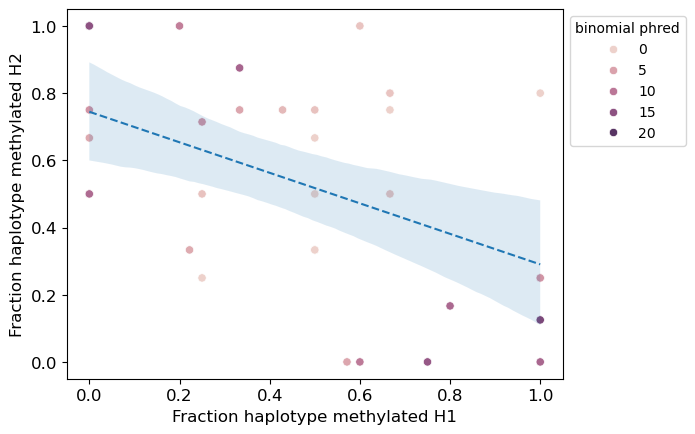

In [4]:
### plot frac hap methylated H1 vs H2 for samples who has both haplotypes present
num_reads_thr = 2
df_methyl_flt = df_methyl.loc[df_methyl.sex=='Female']
print(df_methyl_flt.shape)
df_methyl_flt = df_methyl_flt.loc[(df_methyl_flt.num_methyl_reads_h1 != '.') & (df_methyl_flt.num_methyl_reads_h2 != '.')]
print(df_methyl_flt.shape)
df_methyl_flt = df_methyl_flt.loc[(df_methyl_flt.num_methyl_reads_h1.astype(int) + df_methyl_flt.num_unmethyl_reads_h1.astype(int) >= num_reads_thr)]
print(df_methyl_flt.shape)
df_methyl_flt = df_methyl_flt.loc[(df_methyl_flt.num_methyl_reads_h2.astype(int) + df_methyl_flt.num_unmethyl_reads_h2.astype(int) >= num_reads_thr)]
print(df_methyl_flt.shape)
display(df_methyl_flt)
### figure out which hp is the large and with is the small CGG repeat
df_methyl_flt[['frac_hap_methyl_large_rep', 'frac_hap_methyl_small_rep']] = df_methyl_flt.apply(lambda row: (row['frac_hap_methyl_h1'], row['frac_hap_methyl_h2']) if 
                                                                                                (row['mean_repeat_length_h1'] >= row['mean_repeat_length_h2']) 
                                                                                                else (row['frac_hap_methyl_h2'], row['frac_hap_methyl_h1']), axis=1, result_type = 'expand')
df_methyl_flt[['mean_large_rep', 'mean_small_rep']] = df_methyl_flt.apply(lambda row: (row['mean_repeat_length_h1'], row['mean_repeat_length_h2']) if 
                                                                          (row['mean_repeat_length_h1'] >= row['mean_repeat_length_h2']) 
                                                                          else (row['mean_repeat_length_h2'], row['mean_repeat_length_h1']), axis=1, result_type = 'expand')

def get_binomtest_pval(row):
    k = int(row.num_methyl_reads_h1) + int(row.num_unmethyl_reads_h2)
    n = int(row.num_methyl_reads_h1) + int(row.num_unmethyl_reads_h1) + int(row.num_methyl_reads_h2) + int(row.num_unmethyl_reads_h2)
    return binomtest(k, n, p=0.5, alternative='two-sided').pvalue

df_methyl_flt['binomial_pval'] = df_methyl_flt.apply(lambda row: get_binomtest_pval(row), axis=1)
df_methyl_flt['binomial_phred'] = df_methyl_flt['binomial_pval'].apply(lambda x: -10*np.log10(x))
df_methyl_flt['large_dev'] = df_methyl_flt.apply(lambda row: 'TRUE' if ((float(row.mean_repeat_length_h1) >= 35) or 
                                                                        (float(row.mean_repeat_length_h1) <= 25) or 
                                                                        (float(row.mean_repeat_length_h2) >= 35) or 
                                                                        (float(row.mean_repeat_length_h2) <= 25)) else 'FALSE', axis=1)
### write the table
file_name = f'{dir_fig}/methylation_table_h1_vs_h2.tsv'
print(file_name)
df_methyl_flt.to_csv(file_name, sep='\t', index=True)

col = 'frac_hap_methyl_h1'
df_methyl_flt[col] = df_methyl_flt[col].astype(float)
col = 'frac_hap_methyl_h2'
df_methyl_flt[col] = df_methyl_flt[col].astype(float)

pd.set_option('display.max_rows', None)
display(df_methyl_flt)
pd.set_option('display.max_rows', 10)

y = np.array(df_methyl_flt.frac_hap_methyl_h2.tolist())
X = pd.DataFrame(df_methyl_flt.frac_hap_methyl_h1)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

FS = 12
plt.figure()
sb.scatterplot(data=df_methyl_flt, x='frac_hap_methyl_h1', y='frac_hap_methyl_h2', hue='binomial_phred') #, hue='subject', size='num_reads', sizes=(5,20))
sb.regplot(data=df_methyl_flt, x='frac_hap_methyl_h1', y='frac_hap_methyl_h2', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))
plt.legend(title = 'binomial phred', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Fraction haplotype methylated H1', fontsize=FS)
plt.ylabel('Fraction haplotype methylated H2', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/frac_hap_methyl_h1_vs_h2.png'
#print(fig_name)
#plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

df_plt:


,subject_id,mean_repeat_length,frac_hap_methyl,xci_frac_hap_methyl,num_reads,repeat_group
0,REACH000066,31.333333,0.000000,0.5,3.0,26-34 CGG
1,REACH000087,29.500000,0.750000,0.6666666666666666,4.0,26-34 CGG
2,REACH000089,30.333333,0.666667,1.0,3.0,26-34 CGG
3,REACH000092,29.800000,0.600000,0.7777777777777778,5.0,26-34 CGG
4,REACH000093,29.250000,1.000000,0.2777777777777778,4.0,26-34 CGG
...,...,...,...,...,...,...
64,REACH000579,28.500000,0.750000,0.5,4.0,26-34 CGG
65,REACH000581,31.500000,0.500000,0.2926829268292683,4.0,≤25 CGG
66,REACH000581,23.750000,0.500000,0.5,4.0,≤25 CGG
67,REACH000661,32.666667,0.333333,0.45454545454545453,3.0,26-34 CGG


Scikit learn LR model:
Coefficients: [0.01993324]
Intercept: -0.08256426801312244
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     10.91
Date:                Tue, 29 Apr 2025   Prob (F-statistic):            0.00154
Time:                        10:04:51   Log-Likelihood:                -10.747
No. Observations:                  69   AIC:                             25.49
Df Residuals:                      67   BIC:                             29.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

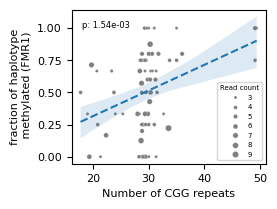

In [7]:
### plot fraction of heplotype methylated as a function of CGG repeat size
### get_here
df_methyl_plt = df_methyl.loc[(df_methyl.sex=='Female')].copy()
df_methyl_plt = df_methyl_plt.loc[(df_methyl_plt.num_methyl_reads_h1!='.') | (df_methyl_plt.num_methyl_reads_h2!='.')]
df_methyl_plt['num_reads_h1'] = df_methyl_plt.apply(lambda row: int(row.num_methyl_reads_h1) + int(row.num_unmethyl_reads_h1) if row.num_methyl_reads_h1!='.' else 0, axis=1)
df_methyl_plt['num_reads_h2'] = df_methyl_plt.apply(lambda row: int(row.num_methyl_reads_h2) + int(row.num_unmethyl_reads_h2) if row.num_methyl_reads_h2!='.' else 0, axis=1)
df_methyl_plt = df_methyl_plt.loc[(df_methyl_plt.num_reads_h1>=3) | (df_methyl_plt.num_reads_h2>=3)]

df_plt = pd.DataFrame()
for idx, row in df_methyl_plt.iterrows():
    sample = idx
    for hp in ['h1', 'h2']:
        if row[f'num_reads_{hp}'] >= 3:
            mean_rep = row[f'mean_repeat_length_{hp}']
            frac_hap = row[f'frac_hap_methyl_{hp}']
            xci_frac_hap = row[f'xci_frac_hap_methyl_{hp}']
            num_reads = row[f'num_reads_{hp}']
            rep_group = row['repeat_group']
            df_tmp = pd.DataFrame({'subject_id': [idx], f'mean_repeat_length': [mean_rep], f'frac_hap_methyl': [frac_hap], 
                                   f'xci_frac_hap_methyl': [xci_frac_hap], f'num_reads': [num_reads], f'repeat_group': [rep_group]})
            df_plt = pd.concat([df_plt, df_tmp], ignore_index=True)
### get rid of one sample (REACH000563) if you need XCI values cause it's '.', for FMR1 plot it's ok to have that.
#df_plt = df_plt.loc[df_plt.xci_frac_hap_methyl != '.']
#cols = ['mean_repeat_length', 'frac_hap_methyl', 'xci_frac_hap_methyl', 'num_reads']
cols = ['mean_repeat_length', 'frac_hap_methyl', 'num_reads']
for col in cols:
    df_plt[col] = df_plt[col].astype(float)

def get_rep_group2(row):
    if row.repeat_group != '.':
        out = row.repeat_group
    else:
        out = ('≥35 CGG' if (row.mean_repeat_length >= 35) else 
               ('≤25 CGG' if (row.mean_repeat_length <= 25) else '26-34 CGG'))
    return out
df_plt['repeat_group'] = df_plt.apply(lambda row: get_rep_group2(row), axis=1)

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
print('df_plt:')
display(df_plt)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

x = np.array(df_plt.mean_repeat_length.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(df_plt.frac_hap_methyl.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(df_plt.mean_repeat_length)
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_plt.frac_hap_methyl.tolist())
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

FS = 8
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_plt, x='mean_repeat_length', y='frac_hap_methyl', color='gray', 
               size='num_reads', sizes=(5,20), legend='brief') # sizes gets a min max tuple interpreted by "size" hue='subject',
#hue='repeat_group', hue_order=['≥35 CGG', '26-34 CGG', '≤25 CGG'], palette=['red',  'lightblue', 'blue'], 
sb.regplot(data=df_plt, x='mean_repeat_length', y='frac_hap_methyl', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
plt.legend(title='Read count', loc='lower right', bbox_to_anchor=(1, 0), fontsize=FS-3, title_fontsize=FS-3) #handles=plt.gca().legend_.legend_handles[num_subjects+2:], 
#, handles=plt.gca().legend_.legend_handles[1:4]+plt.gca().legend_.legend_handles[5:12:2]

x_t = 18
y_t = 1
p = model_sm.pvalues['mean_repeat_length']
plt.text(x_t, y_t, f'p: {p:.2e}', fontsize=FS-2, ha='left')

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/haplotype_readFrac_methylation_vs_repeats_FMR1_fromTable.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

In [11]:
df_plt.loc[df_plt.mean_repeat_length>45]

,subject_id,mean_repeat_length,frac_hap_methyl,xci_frac_hap_methyl,num_reads,xci_num_reads,repeat_group
19,REACH000453,49.400000,1.0,0.50000,3.0,24,≥35 CGG
59,REACH000561,49.111111,1.0,0.52381,5.0,21,≥35 CGG


In [20]:
pd.set_option('display.max_columns', None)
display(df_methyl_plt)
pd.set_option('display.max_columns', 10)
df_tmp = df_methyl_plt.loc[df_methyl_plt.mean_repeat_length_h2 != '.'].copy()
df_tmp['mean_repeat_length_h2'] = df_tmp['mean_repeat_length_h2'].astype(float)
pd.set_option('display.max_columns', None)
display(df_tmp.loc[(df_tmp.mean_repeat_length_h2 >45) | (df_tmp.mean_repeat_length_h2 >45)])
pd.set_option('display.max_columns', 10)

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,repeat_length_h2,repeat_length_h0,mean_repeat_length_h1,mean_repeat_length_h2,mean_repeat_length_h0,read_mean_methyl_lik_h1,read_mean_methyl_lik_h2,read_mean_methyl_lik_h0,num_methyl_reads_h1,num_unmethyl_reads_h1,frac_hap_methyl_h1,num_methyl_reads_h2,num_unmethyl_reads_h2,frac_hap_methyl_h2,num_methyl_reads_h0,num_unmethyl_reads_h0,frac_hap_methyl_h0,xci_num_methyl_reads_h1,xci_num_unmethyl_reads_h1,xci_frac_hap_methyl_h1,xci_num_methyl_reads_h2,xci_num_unmethyl_reads_h2,xci_frac_hap_methyl_h2,xci_num_methyl_reads_h0,xci_num_unmethyl_reads_h0,xci_frac_hap_methyl_h0,sample_id,rel,sex,coverage,Platform,Affected,in_trios,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads,num_reads_h1,num_reads_h2,xci_num_reads_h1,xci_num_reads_h2
REACH000066,32,"1,12,34","31,43,30","87,0",.,"71,77,1,88",91|95|100|99|96|100|99|98|98|96|96|97|94|99|98...,64|20|7|2|0|0|0|0|0|0|2|0|1|0|0|0|0|0|3|2|6|2|...,.,31,"30,34,30",.,31.0,31.333333333333332,.,79,"8,42,3",.,1,0,1.0,0,3,0.0,.,.,.,0,3,0.0,1,1,0.5,3,1,0.75,REACH000066,M,Female,1.61,PB,No,TRUE,0.0,1.0,31.333333333333332,31.0,TRUE,0.125,9.030899869919436,26-34 CGG,FALSE,FALSE,1,3,3,2
REACH000087,30,"71,2,3,3,84,11,100,38,11","30,28,28,31","60,51,92,27,81,2,90,77,42",.,"10,2,86,84,9,12,6,2,34,14,99,48,2,2,69,9,1",0|0|0|0|0|1|3|1|0|0|0|0|0|0|0|0|0|1|0|0|1|0|1|...,0|0|0|0|0|0|0|0|0|0|1|3|7|4|2|2|0|2|1|0|0|0|0|...,.,30,"30,29,29,30",.,30.0,29.5,.,19,"16,89,76,57",.,0,1,0.0,3,1,0.75,.,.,.,3,6,0.3333333333333333,6,3,0.6666666666666666,4,13,0.23529411764705882,REACH000087,M,Female,2.75,PB,No,TRUE,0.0,0.75,30.0,29.5,TRUE,0.375,4.259687322722812,26-34 CGG,FALSE,FALSE,1,4,9,9
REACH000089,"31,30","54,51,2,91,51","30,30,32","82,52,94",.,"47,5,6,28,11,1,0,22,4,96,7,13,13,25,78,83,81,9...",5|9|3|4|24|19|29|89|99|100|100|99|97|99|93|76|...,82|69|81|83|45|73|55|13|24|33|82|67|43|60|86|9...,.,"30,30","30,30,31",.,30.0,30.333333333333332,.,"62,2","85,73,9",.,1,1,0.5,2,1,0.6666666666666666,.,.,.,4,1,0.8,3,0,1.0,6,14,0.3,REACH000089,C,Female,3.27,PB,Yes,TRUE,0.6666666666666666,0.5,30.333333333333332,30.0,TRUE,1.0,-0.0,26-34 CGG,TRUE,FALSE,2,3,5,3
REACH000092,34,"1,1,16,57,57,3,1,17,4,96,10,2,2,21,6,19,90,2,3...","34,27,33,26,27","56,88,73,100,63,36,75,8,62",.,"27,76,69,5,37,52,2,83,0,6,52,94,52,30,13,60,23...",0|0|0|0|0|0|1|2|12|7|0|0|0|1|1|0|4|4|7|2|4|4|3...,95|77|94|81|74|36|90|86|97|96|97|97|96|77|82|6...,.,31,"31,29,31,29,29",.,31.0,29.8,.,8,"68,77,78,8,6",.,0,1,0.0,3,2,0.6,.,.,.,4,18,0.18181818181818182,7,2,0.7777777777777778,10,9,0.5263157894736842,REACH000092,C,Female,4.89,PB,Yes,TRUE,0.0,0.6,31.0,29.8,TRUE,0.6875,1.6272729749769974,26-34 CGG,FALSE,FALSE,1,5,22,9
REACH000093,"27,27,27,29","69,53,94,11,5,0,3,10,1,10,7,5,16,2,44,88,100,3",.,"71,55,70,19,58,55,98,28,21,82",.,"76,1,55,64,0,62",29|7|70|96|31|95|95|93|98|100|99|99|99|99|100|...,.,.,"29,29,29,30",.,.,29.25,.,.,"90,88,83,75",.,.,4,0,1.0,.,.,.,.,.,.,5,13,0.2777777777777778,7,3,0.7,4,2,0.6666666666666666,REACH000093,M,Female,4.63,PB,No,TRUE,.,.,.,.,FALSE,.,.,.,.,.,4,0,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REACH000579,"31,45","10,4,52,7,2,9,3,83,6,73,19,35,3,83,67,73,10,70...","35,15,.,.","5,58,79,57,88,6,5,64,3,1,52,2,62,64,15,78,7,82...",.,"1,6,44,47,88,3,11,9,1,84,80,67,57,38,83,7,40,7...",0|0|0|0|8|0|5|4|98|49|21|5|2|12|92|77|43|2|0|0...,100|0|99|100|100|98|97|99|96|100|100|99|100|10...,.,"30,35","32,25,.,.",.,32.5,28.5,.,"12,64","91,2,71,63",.,1,1,0.5,3,1,0.75,.,.,.,11,18,0.3793103448275862,17,17,0.5,12,20,0.375,REACH000579,M,Female,10.80,ONT,No,TRUE,0.5,0.75,32.5,28.5,TRUE,0.6

,bp_dev_h1,xci_read_mean_methyl_lik_h1,bp_dev_h2,xci_read_mean_methyl_lik_h2,bp_dev_h0,xci_read_mean_methyl_lik_h0,methyl_h1,methyl_h2,methyl_h0,repeat_length_h1,repeat_length_h2,repeat_length_h0,mean_repeat_length_h1,mean_repeat_length_h2,mean_repeat_length_h0,read_mean_methyl_lik_h1,read_mean_methyl_lik_h2,read_mean_methyl_lik_h0,num_methyl_reads_h1,num_unmethyl_reads_h1,frac_hap_methyl_h1,num_methyl_reads_h2,num_unmethyl_reads_h2,frac_hap_methyl_h2,num_methyl_reads_h0,num_unmethyl_reads_h0,frac_hap_methyl_h0,xci_num_methyl_reads_h1,xci_num_unmethyl_reads_h1,xci_frac_hap_methyl_h1,xci_num_methyl_reads_h2,xci_num_unmethyl_reads_h2,xci_frac_hap_methyl_h2,xci_num_methyl_reads_h0,xci_num_unmethyl_reads_h0,xci_frac_hap_methyl_h0,sample_id,rel,sex,coverage,Platform,Affected,in_trios,frac_hap_methyl_large_rep,frac_hap_methyl_small_rep,mean_large_rep,mean_small_rep,has_both_hps,binomial_pval,binomial_phred,repeat_group,both_hps_2_reads,both_hps_3_reads,num_reads_h1,num_reads_h2,xci_num_reads_h1,xci_num_reads_h2
REACH000451,"24,27,27,27,27","20,1,99,95,99,94,16,4,0,78,7,88,44,99,0,0,3,0,...","81,91","100,6,0,0,7,0,0,1,97,93,95,100,39,0,1,99,3,98,...",.,"0,91,32,0,100,0,0,15,100,100,1,98,0,22",0|0|0|0|0|0|0|0|0|0|0|1|5|1|0|0|0|0|0|0|0|0|0|...,59|90|82|99|12|93|98|98|100|100|100|100|100|10...,.,"28,29,29,29,29","47,50",.,28.8,49.400000,.,"0,79,14,3,1","87,94",.,1,4,0.2,2,0,1.0,.,.,.,9,15,0.375,11,16,0.4074074074074074,5,9,0.35714285714285715,REACH000451,M,Female,6.35,PB,No,TRUE,1.0,0.2,49.4,28.8,TRUE,0.125,9.030899869919436,≥35 CGG,TRUE,FALSE,5,2,24,27
REACH000453,"33,33,33,36,33","0,86,0,1,0,84,52,1,81,79,69,76,1,0,0,0,53,1,99...","97,84,90","87,0,0,0,0,93,3,1,1,100,2,68,96,99,99,0,86,72,...",.,"10,3,0,80,90,70,1,100,83,2,23,100,0,0,92",59|95|99|100|99|100|100|97|90|78|91|100|100|10...,94|100|100|100|100|99|99|99|100|99|95|99|100|9...,.,"31,31,31,32,31","52,48,50",.,31.2,49.400000,.,"77,57,43,42,66","66,87,91",.,3,2,0.6,3,0,1.0,.,.,.,13,13,0.5,12,12,0.5,7,8,0.4666666666666667,REACH000453,C,Female,7.12,PB,No,TRUE,1.0,0.6,49.4,31.2,TRUE,0.7265625,1.3872702109393327,≥35 CGG,TRUE,TRUE,5,3,26,24
REACH000561,"22,25,24,31","65,70,80,63,1,16,29,70,26,99,56,20","92,88,102,67,83","3,1,24,86,71,62,56,84,59,92,77,7,10,67,5,6,5,9...",.,"21,3,6,5,81,53,75,81,4,6,4,17,72,0,51,87,47,6,...",3|0|2|0|1|5|12|99|59|66|0|0|0|0|0|0|0|58|10|29...,95|41|55|100|74|99|100|100|100|91|91|97|82|100...,.,"27,28,28,30","51,49,54,42,48",.,28.25,49.111111,.,"17,29,7,5","72,79,60,58,87",.,0,4,0.0,5,0,1.0,.,.,.,7,5,0.5833333333333334,11,10,0.5238095238095238,14,20,0.4117647058823529,REACH000561,M,Female,8.34,ONT,No,TRUE,1.0,0.0,49.111111111111114,28.25,TRUE,0.00390625,24.082399653118497,≥35 CGG,TRUE,TRUE,4,5,12,21


df_plt:


,subject_id,mean_repeat_length,frac_hap_methyl,xci_frac_hap_methyl,num_reads,xci_num_reads,repeat_group
0,REACH000066,31.000000,1.0,0.000000,1,3.0,26-34 CGG
1,REACH000087,30.000000,0.0,0.333333,1,9.0,26-34 CGG
2,REACH000087,29.500000,0.75,0.666667,4,9.0,26-34 CGG
3,REACH000089,30.000000,0.5,0.800000,2,5.0,26-34 CGG
4,REACH000089,30.333333,0.6666666666666666,1.000000,3,3.0,26-34 CGG
5,REACH000092,31.000000,0.0,0.181818,1,22.0,26-34 CGG
6,REACH000092,29.800000,0.6,0.777778,5,9.0,26-34 CGG
7,REACH000093,29.250000,1.0,0.277778,4,18.0,26-34 CGG
9,REACH000098,32.000000,1.0,0.428571,1,7.0,26-34 CGG
12,REACH000121,23.000000,0.0,0.454545,1,11.0,≤25 CGG


df_plt, mean repeat > 45:


,subject_id,mean_repeat_length,frac_hap_methyl,xci_frac_hap_methyl,num_reads,xci_num_reads,repeat_group
38,REACH000451,49.400000,1.0,0.407407,2,27.0,≥35 CGG
40,REACH000453,49.400000,1.0,0.500000,3,24.0,≥35 CGG
122,REACH000561,49.111111,1.0,0.523810,5,21.0,≥35 CGG


Scikit learn LR model:
Coefficients: [0.00159696]
Intercept: 0.41398029128204844
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1966
Date:                Tue, 29 Apr 2025   Prob (F-statistic):              0.658
Time:                        10:32:47   Log-Likelihood:                 29.895
No. Observations:                 122   AIC:                            -55.79
Df Residuals:                     120   BIC:                            -50.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

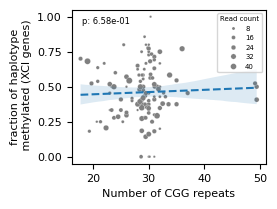

In [30]:
### plot fraction of heplotype methylated as a function of XCI methylation
### get_here
df_methyl_plt = df_methyl.loc[(df_methyl.sex=='Female')].copy()
df_methyl_plt = df_methyl_plt.loc[(df_methyl_plt.num_methyl_reads_h1!='.') | (df_methyl_plt.num_methyl_reads_h2!='.')]
df_methyl_plt['num_reads_h1'] = df_methyl_plt.apply(lambda row: int(row.num_methyl_reads_h1) + int(row.num_unmethyl_reads_h1) if row.num_methyl_reads_h1!='.' else 0, axis=1)
df_methyl_plt['num_reads_h2'] = df_methyl_plt.apply(lambda row: int(row.num_methyl_reads_h2) + int(row.num_unmethyl_reads_h2) if row.num_methyl_reads_h2!='.' else 0, axis=1)
df_methyl_plt['xci_num_reads_h1'] = df_methyl_plt.apply(lambda row: int(row.xci_num_methyl_reads_h1) + int(row.xci_num_unmethyl_reads_h1) if row.xci_num_methyl_reads_h1!='.' else 0, axis=1)
df_methyl_plt['xci_num_reads_h2'] = df_methyl_plt.apply(lambda row: int(row.xci_num_methyl_reads_h2) + int(row.xci_num_unmethyl_reads_h2) if row.xci_num_methyl_reads_h2!='.' else 0, axis=1)
df_methyl_plt = df_methyl_plt.loc[(df_methyl_plt.xci_num_reads_h1>=3) | (df_methyl_plt.xci_num_reads_h2>=3)]

df_plt = pd.DataFrame()
for idx, row in df_methyl_plt.iterrows():
    sample = idx
    for hp in ['h1', 'h2']:
        if row[f'xci_num_reads_{hp}'] >= 3:
            mean_rep = row[f'mean_repeat_length_{hp}']
            frac_hap = row[f'frac_hap_methyl_{hp}']
            xci_frac_hap = row[f'xci_frac_hap_methyl_{hp}']
            num_reads = row[f'num_reads_{hp}']
            xci_num_reads = row[f'xci_num_reads_{hp}']
            rep_group = row['repeat_group']
            df_tmp = pd.DataFrame({'subject_id': [idx], f'mean_repeat_length': [mean_rep], f'frac_hap_methyl': [frac_hap], 
                                   f'xci_frac_hap_methyl': [xci_frac_hap], f'num_reads': [num_reads], f'xci_num_reads': [xci_num_reads], f'repeat_group': [rep_group]})
            df_plt = pd.concat([df_plt, df_tmp], ignore_index=True)

### also get rid of the haplotypes where mean number of CGG repeats are missing
df_plt = df_plt.loc[df_plt.mean_repeat_length!='.']

cols = ['mean_repeat_length', 'xci_frac_hap_methyl', 'xci_num_reads']
for col in cols:
    df_plt[col] = df_plt[col].astype(float)

def get_rep_group2(row):
    if row.repeat_group != '.':
        out = row.repeat_group
    else:
        out = ('≥35 CGG' if (row.mean_repeat_length >= 35) else 
               ('≤25 CGG' if (row.mean_repeat_length <= 25) else '26-34 CGG'))
    return out
df_plt['repeat_group'] = df_plt.apply(lambda row: get_rep_group2(row), axis=1)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print('df_plt:')
display(df_plt)
print('df_plt, mean repeat > 45:')
display(df_plt.loc[(df_plt.mean_repeat_length >45) | (df_plt.mean_repeat_length >45)])
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

x = np.array(df_plt.mean_repeat_length.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(df_plt.xci_frac_hap_methyl.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(df_plt.mean_repeat_length)
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_plt.xci_frac_hap_methyl.tolist())
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

FS = 8
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=df_plt, x='mean_repeat_length', y='xci_frac_hap_methyl', size='xci_num_reads', sizes=(3,20), color='gray') # sizes gets a min max tuple interpreted by "size" hue='subject',
#hue='repeat_group', hue_order=['≥35 CGG', '26-34 CGG', '≤25 CGG'], palette=['red',  'lightblue', 'blue'] , legend='brief'
sb.regplot(data=df_plt, x='mean_repeat_length', y='xci_frac_hap_methyl', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
plt.legend(title='Read count', loc='upper right', bbox_to_anchor=(1, 1), fontsize=FS-3, title_fontsize=FS-3) #handles=plt.gca().legend_.legend_handles[num_subjects+2:], , handles=plt.gca().legend_.legend_handles[0:]

x_t = 18
y_t = 0.95
p = model_sm.pvalues['mean_repeat_length']
plt.text(x_t, y_t, f'p: {p:.2e}', fontsize=FS-2, ha='left')

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (XCI genes)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/haplotype_readFrac_methylation_vs_repeats_XCI_fromTable.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

In [ ]:
FS = 8

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.methylation_mean_binary_xci.tolist(), X.hp_rep_fmr1.tolist(), y, color='blue', label='Data Points', s=8)
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.25, color='orange', label='Fitted Plane', edgecolor='black')
x_t =0.8 ; y_t = 10; z_t = 0.8
ax.text(x_t, y_t, z_t, f'r2: {r2:.2f}', fontsize=FS)
ax.set_xlabel('Other genes (XCI) methyl.', fontsize=FS)
ax.set_ylabel('Number of CGG repeats', fontsize=FS)
ax.set_zlabel('FMR1 methyl.', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
#plt.zticks(fontsize=FS)
ax.tick_params(axis='z', labelsize=FS)
ax.set_title('')
ax.view_init(elev=15, azim=150)
#plt.tight_layout()
fig_name = f'{dir_fig}/3D_FMR1_methyl_vs_XCI_methyl_and_CGG_repeat.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', pad_inches=.3, dpi=1200)
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_plt[['methylation_mean_binary_xci']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_plt.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.figure(figsize=(3, 2))
sb.scatterplot(data=df_plt, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', hue='subject', size='num_reads_fmr1', sizes=(7,20))
sb.regplot(data=df_plt, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
x_t =0.1 ; y_t = 0.85
plt.text(x_t, y_t, f'r2: {r2:.2f}', fontsize=FS)
plt.legend(title='Number of reads', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3)
plt.xlabel('Fraction of HP reads methylated \n for other genes (XCI)', fontsize=FS)
plt.ylabel('Fraction of HP reads \n methylated for FMR1', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/FMR1_methyl_vs_XCI_methyl.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_plt[['hp_rep_fmr1']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_plt.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.figure(figsize=(3, 2))
df_merge_jitter = pd.DataFrame(df_merge)
df_merge_jitter['hp_rep_fmr1'] = df_merge_jitter['hp_rep_fmr1'].astype(float)
df_merge_jitter.loc[('REACH000453', 'h2'), 'hp_rep_fmr1'] = 49.5
df_merge_jitter.loc[('REACH000461', 'h2'), 'hp_rep_fmr1'] = 50.5
sb.scatterplot(data=df_merge_jitter, x='hp_rep_fmr1', y='methylation_mean_binary_fmr1', hue='subject', size='num_reads_fmr1', sizes=(7,20))
sb.regplot(data=df_merge, x='hp_rep_fmr1', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
x_t =20 ; y_t = 1
plt.text(x_t, y_t, f'r2: {r2:.2f}', fontsize=FS)
plt.legend(title='Number of reads', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[num_subjects+3:], fontsize=FS-3, title_fontsize=FS-3)
plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('Fraction of HP reads \n methylated for FMR1', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/FMR1_methyl_vs_CGG_repeats.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

df_plt:


,subject_id,mean_repeat_length,frac_hap_methyl,xci_frac_hap_methyl,num_reads,xci_num_reads,repeat_group
0,REACH000066,31.333333,0.000000,0.500000,3.0,2.0,26-34 CGG
1,REACH000087,29.500000,0.750000,0.666667,4.0,9.0,26-34 CGG
2,REACH000089,30.333333,0.666667,1.000000,3.0,3.0,26-34 CGG
3,REACH000092,29.800000,0.600000,0.777778,5.0,9.0,26-34 CGG
4,REACH000093,29.250000,1.000000,0.277778,4.0,18.0,26-34 CGG
5,REACH000220,29.000000,0.250000,0.363636,4.0,11.0,26-34 CGG
6,REACH000220,29.000000,0.250000,0.473684,4.0,19.0,26-34 CGG
7,REACH000230,20.666667,0.666667,0.250000,3.0,4.0,≤25 CGG
8,REACH000234,29.333333,0.666667,0.434783,3.0,23.0,26-34 CGG
9,REACH000234,30.600000,0.800000,0.250000,5.0,20.0,26-34 CGG


df_plt, mean repeat > 45:


,subject_id,mean_repeat_length,frac_hap_methyl,xci_frac_hap_methyl,num_reads,xci_num_reads,repeat_group
19,REACH000453,49.400000,1.0,0.50000,3.0,24.0,≥35 CGG
59,REACH000561,49.111111,1.0,0.52381,5.0,21.0,≥35 CGG


stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     9.005
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           0.000353
Time:                        11:15:27   Log-Likelihood:                -7.5687
No. Observations:                  68   AIC:                             21.14
Df Residuals:                      65   BIC:                             27.80
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                

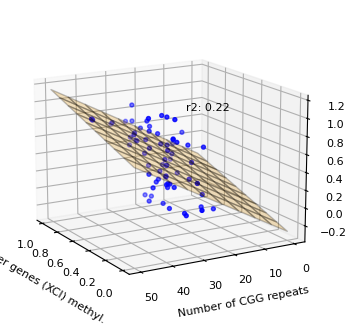

stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.801
Date:                Tue, 29 Apr 2025   Prob (F-statistic):            0.00683
Time:                        11:15:29   Log-Likelihood:                -12.086
No. Observations:                  68   AIC:                             28.17
Df Residuals:                      66   BIC:                             32.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                

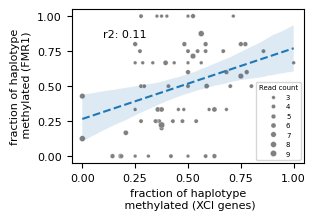

stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     10.36
Date:                Tue, 29 Apr 2025   Prob (F-statistic):            0.00199
Time:                        11:15:30   Log-Likelihood:                -10.925
No. Observations:                  68   AIC:                             25.85
Df Residuals:                      66   BIC:                             30.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -

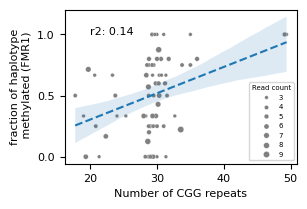

In [40]:
### Multivariate OLS: linear regression of FMR1 methylation as a function of XCI and CGG repeat
df_methyl_plt = df_methyl.loc[(df_methyl.sex=='Female')].copy()
df_methyl_plt = df_methyl_plt.loc[(df_methyl_plt.num_methyl_reads_h1!='.') | (df_methyl_plt.num_methyl_reads_h2!='.')]
df_methyl_plt['num_reads_h1'] = df_methyl_plt.apply(lambda row: int(row.num_methyl_reads_h1) + int(row.num_unmethyl_reads_h1) if row.num_methyl_reads_h1!='.' else 0, axis=1)
df_methyl_plt['num_reads_h2'] = df_methyl_plt.apply(lambda row: int(row.num_methyl_reads_h2) + int(row.num_unmethyl_reads_h2) if row.num_methyl_reads_h2!='.' else 0, axis=1)
df_methyl_plt['xci_num_reads_h1'] = df_methyl_plt.apply(lambda row: int(row.xci_num_methyl_reads_h1) + int(row.xci_num_unmethyl_reads_h1) if row.xci_num_methyl_reads_h1!='.' else 0, axis=1)
df_methyl_plt['xci_num_reads_h2'] = df_methyl_plt.apply(lambda row: int(row.xci_num_methyl_reads_h2) + int(row.xci_num_unmethyl_reads_h2) if row.xci_num_methyl_reads_h2!='.' else 0, axis=1)
df_methyl_plt = df_methyl_plt.loc[(df_methyl_plt.num_reads_h1>=3) | (df_methyl_plt.num_reads_h2>=3)]

df_plt = pd.DataFrame()
for idx, row in df_methyl_plt.iterrows():
    sample = idx
    for hp in ['h1', 'h2']:
        if row[f'num_reads_{hp}'] >= 3:
            mean_rep = row[f'mean_repeat_length_{hp}']
            frac_hap = row[f'frac_hap_methyl_{hp}']
            xci_frac_hap = row[f'xci_frac_hap_methyl_{hp}']
            num_reads = row[f'num_reads_{hp}']
            xci_num_reads = row[f'xci_num_reads_{hp}']
            rep_group = row['repeat_group']
            df_tmp = pd.DataFrame({'subject_id': [idx], f'mean_repeat_length': [mean_rep], f'frac_hap_methyl': [frac_hap], 
                                   f'xci_frac_hap_methyl': [xci_frac_hap], f'num_reads': [num_reads], f'xci_num_reads': [xci_num_reads], f'repeat_group': [rep_group]})
            df_plt = pd.concat([df_plt, df_tmp], ignore_index=True)

### also get rid of the haplotypes where xci_frac_hap_methyl are missing. this would omit REACH000563 who don't have any phased reads in XCI genes.
### REACH000451 is also not there because it has only 2 reads for FMR1 on the haplotype
df_plt = df_plt.loc[df_plt.xci_frac_hap_methyl!='.']

cols = ['mean_repeat_length', 'frac_hap_methyl', 'xci_frac_hap_methyl', 'xci_num_reads', 'num_reads']
for col in cols:
    df_plt[col] = df_plt[col].astype(float)

def get_rep_group2(row):
    if row.repeat_group != '.':
        out = row.repeat_group
    else:
        out = ('≥35 CGG' if (row.mean_repeat_length >= 35) else 
               ('≤25 CGG' if (row.mean_repeat_length <= 25) else '26-34 CGG'))
    return out
df_plt['repeat_group'] = df_plt.apply(lambda row: get_rep_group2(row), axis=1)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print('df_plt:')
display(df_plt)
print('df_plt, mean repeat > 45:')
display(df_plt.loc[(df_plt.mean_repeat_length >45) | (df_plt.mean_repeat_length >45)])
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

### multi variate linear model: methylation_fmr1 ~ methylation_xci + hp_rep
X = pd.DataFrame(df_plt[['xci_frac_hap_methyl', 'mean_repeat_length']])
X_const = sm.add_constant(X)  # Adds intercept term
#print('X_const:')
#display(X_const)
y = np.array(df_plt.frac_hap_methyl.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

print(model_sm.params)
print(model_sm.params.xci_frac_hap_methyl)
print(model_sm.params.mean_repeat_length)
x_plane = np.linspace(0, 1, 10)  # Define grid for the plane
y_plane = np.linspace(0, 50, 10)
a = model_sm.params.xci_frac_hap_methyl
b = model_sm.params.mean_repeat_length
c = model_sm.params.const
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = a * x_plane + b * y_plane + c  # Compute corresponding z values

FS = 8
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.xci_frac_hap_methyl.tolist(), X.mean_repeat_length.tolist(), y, color='blue', label='Data Points', s=8)
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.25, color='orange', label='Fitted Plane', edgecolor='black')
x_t =0.8 ; y_t = 10; z_t = 0.8
ax.text(x_t, y_t, z_t, f'r2: {r2:.2f}', fontsize=FS)
ax.set_xlabel('Other genes (XCI) methyl.', fontsize=FS)
ax.set_ylabel('Number of CGG repeats', fontsize=FS)
ax.set_zlabel('FMR1 methyl.', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
#plt.zticks(fontsize=FS)
ax.tick_params(axis='z', labelsize=FS)
ax.set_title('')
ax.view_init(elev=15, azim=150)
#plt.tight_layout()
fig_name = f'{dir_fig}/3D_FMR1_methyl_vs_XCI_methyl_and_CGG_repeat_fromTable.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', pad_inches=.3, dpi=1200)
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_plt[['xci_frac_hap_methyl']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_plt.frac_hap_methyl.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.figure(figsize=(3, 2))
sb.scatterplot(data=df_plt, x='xci_frac_hap_methyl', y='frac_hap_methyl', color='gray', size='num_reads', sizes=(7,20))
sb.regplot(data=df_plt, x='xci_frac_hap_methyl', y='frac_hap_methyl', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
x_t =0.1 ; y_t = 0.85
plt.text(x_t, y_t, f'r2: {r2:.2f}', fontsize=FS)
plt.legend(title='Read count', loc='lower right', bbox_to_anchor=(1, 0), fontsize=FS-3, title_fontsize=FS-3) #handles=plt.gca().legend_.legend_handles[num_subjects+2:],
plt.xlabel('fraction of haplotype\n methylated (XCI genes)', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/FMR1_methyl_vs_XCI_methyl_fromTable.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_plt[['mean_repeat_length']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_plt.frac_hap_methyl.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.figure(figsize=(3, 2))
sb.scatterplot(data=df_plt, x='mean_repeat_length', y='frac_hap_methyl', color='gray', size='num_reads', sizes=(7,20))
sb.regplot(data=df_plt, x='mean_repeat_length', y='frac_hap_methyl', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
x_t =20 ; y_t = 1
plt.text(x_t, y_t, f'r2: {r2:.2f}', fontsize=FS)
plt.legend(title='Read count', loc='lower right', bbox_to_anchor=(1, 0), fontsize=FS-3, title_fontsize=FS-3) #handles=plt.gca().legend_.legend_handles[num_subjects+3:],
plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/FMR1_methyl_vs_CGG_repeats_fromTable.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

In [ ]:
### Multivariate OLS: linear regression of FMR1 methylation as a function of XCI and CGG repeat
df_reads_fmr1, df_hps_fmr1, df_reads_xci, df_hps_xci = reduce_df_bps(df_bps_fm)

cols = ['hp_rep', 'num_reads', 'methylation_mean', 'methylation_mean_binary']
#pd.set_option('display.max_rows', None)
df_merge = pd.merge(df_hps_fmr1[cols], df_hps_xci[cols], left_index=True, right_index=True, how='inner', suffixes=('_fmr1', '_xci'))
df_merge = df_merge.loc[(df_merge.num_reads_fmr1>2)&(df_merge.num_reads_xci>2)]
#print('df_merge:')
#display(df_merge)
pd.set_option('display.max_rows', 10)

num_subjects = len(set(df_merge.index.get_level_values('subject').tolist()))
print(f'number of subjects: {num_subjects}')

##### for investigation ######
print('===================== for investigation ===================')
df_this = df_merge.loc[(df_merge.methylation_mean_binary_xci<.1)]
#pd.set_option('display.max_rows', None)
print('haplotypes with methylation_mean_binary_xci<.1:') #num_reads>2
display(df_this)

df_this = df_merge.loc[(df_merge.methylation_mean_binary_xci>.9)]
#pd.set_option('display.max_rows', None)
print('haplotypes with methylation_mean_binary_xci>.9:') #num_reads>2
display(df_this)

df_this = df_merge.loc[(df_merge.hp_rep_fmr1<23)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep_fmr1<23:') #num_reads>2
display(df_this)

df_this = df_merge.loc[(df_merge.hp_rep_fmr1>40)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep_fmr1>40:') #num_reads>2
display(df_this)

#x_min=27; x_max=33; y_min=.49; y_max=.51
#df_this = df_hps.loc[(df_hps.hp_rep>x_min)&(df_hps.hp_rep<x_max)&(df_hps.methylation_mean_binary>y_min)&(df_hps.methylation_mean_binary<y_max)]
#pd.set_option('display.max_rows', None)
#print(f'haplotypes with hp_rep>{x_min} & hp_rep<{x_max} & y>{y_min} & y<{y_max}:') #num_reads>2
#pd.set_option('display.max_rows', None)
#display(df_this)
print('==========================================')
##############################

### multi variate linear model: methylation_fmr1 ~ methylation_xci + hp_rep
X = pd.DataFrame(df_merge[['methylation_mean_binary_xci', 'hp_rep_fmr1']])
X_const = sm.add_constant(X)  # Adds intercept term
#print('X_const:')
#display(X_const)
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

print(model_sm.params)
print(model_sm.params.methylation_mean_binary_xci)
print(model_sm.params.hp_rep_fmr1)
x_plane = np.linspace(0, 1, 10)  # Define grid for the plane
y_plane = np.linspace(0, 50, 10)
a = model_sm.params.methylation_mean_binary_xci
b = model_sm.params.hp_rep_fmr1
c = model_sm.params.const
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = a * x_plane + b * y_plane + c  # Compute corresponding z values

FS = 8

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.methylation_mean_binary_xci.tolist(), X.hp_rep_fmr1.tolist(), y, color='blue', label='Data Points', s=8)
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.25, color='orange', label='Fitted Plane', edgecolor='black')
x_t =0.8 ; y_t = 10; z_t = 0.8
ax.text(x_t, y_t, z_t, f'r2: {r2:.2f}', fontsize=FS)
ax.set_xlabel('Other genes (XCI) methyl.', fontsize=FS)
ax.set_ylabel('Number of CGG repeats', fontsize=FS)
ax.set_zlabel('FMR1 methyl.', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
#plt.zticks(fontsize=FS)
ax.tick_params(axis='z', labelsize=FS)
ax.set_title('')
ax.view_init(elev=15, azim=150)
#plt.tight_layout()
fig_name = f'{dir_fig}/3D_FMR1_methyl_vs_XCI_methyl_and_CGG_repeat.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', pad_inches=.3, dpi=1200)
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_merge[['methylation_mean_binary_xci']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.figure(figsize=(3, 2))
sb.scatterplot(data=df_merge, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', hue='subject', size='num_reads_fmr1', sizes=(7,20))
sb.regplot(data=df_merge, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
x_t =0.1 ; y_t = 0.85
plt.text(x_t, y_t, f'r2: {r2:.2f}', fontsize=FS)
plt.legend(title='Number of reads', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3)
plt.xlabel('Fraction of HP reads methylated \n for other genes (XCI)', fontsize=FS)
plt.ylabel('Fraction of HP reads \n methylated for FMR1', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/FMR1_methyl_vs_XCI_methyl.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_merge[['hp_rep_fmr1']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.figure(figsize=(3, 2))
df_merge_jitter = pd.DataFrame(df_merge)
df_merge_jitter['hp_rep_fmr1'] = df_merge_jitter['hp_rep_fmr1'].astype(float)
df_merge_jitter.loc[('REACH000453', 'h2'), 'hp_rep_fmr1'] = 49.5
df_merge_jitter.loc[('REACH000461', 'h2'), 'hp_rep_fmr1'] = 50.5
sb.scatterplot(data=df_merge_jitter, x='hp_rep_fmr1', y='methylation_mean_binary_fmr1', hue='subject', size='num_reads_fmr1', sizes=(7,20))
sb.regplot(data=df_merge, x='hp_rep_fmr1', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
x_t =20 ; y_t = 1
plt.text(x_t, y_t, f'r2: {r2:.2f}', fontsize=FS)
plt.legend(title='Number of reads', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[num_subjects+3:], fontsize=FS-3, title_fontsize=FS-3)
plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('Fraction of HP reads \n methylated for FMR1', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/FMR1_methyl_vs_CGG_repeats.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

In [16]:

s = '97|66|94|100|89|85|19|31|21|0|0|0|0|13|9|11|58|98|91|75|89|28|42|54|33|90|93|95|99|100|100|100|100|100|100|100|100|100|100|99|93|70|47|21|13|3|1|0|6|23|96|53|86|86|97|94|93,100|100|100|100|100|100|100|100|100|100|100|99|100|100|100|98|95|95|89|91|25|23|22|31|5|31|14|52|89|99|98|99|96|98|99|99|99|99|99|96|98|97|94|91|92|95|99|99|100|98|98|97|94|87|75|98|100,100|100|100|100|100|99|99|98|99|100|99|100|100|100|100|100|100|100|98|96|92|93|95|98|98|99|99|99|100|100|100|100|100|100|99|98|98|98|98|97|98|100|99|99|100|100|100|100|100|100|100|100|100|100|100|100|99,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|2|0|1|0|0|0|0|0|0|0|0|2|0|0|2|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0'
ss = [x for x in s.split(',')]
print(ss)

tot = [len([xx for xx in x.split ('|')]) for x in ss]
print(f'total cpg sites: {tot}')
methyl = [len([xx for xx in x.split('|') if int(xx) >= 50]) for x in ss]
print(f'methylated cpg sites: {methyl}')
frac = np.array(methyl) / np.array(tot)
print(f'fraction of read methylated: {frac}')

['97|66|94|100|89|85|19|31|21|0|0|0|0|13|9|11|58|98|91|75|89|28|42|54|33|90|93|95|99|100|100|100|100|100|100|100|100|100|100|99|93|70|47|21|13|3|1|0|6|23|96|53|86|86|97|94|93', '100|100|100|100|100|100|100|100|100|100|100|99|100|100|100|98|95|95|89|91|25|23|22|31|5|31|14|52|89|99|98|99|96|98|99|99|99|99|99|96|98|97|94|91|92|95|99|99|100|98|98|97|94|87|75|98|100', '100|100|100|100|100|99|99|98|99|100|99|100|100|100|100|100|100|100|98|96|92|93|95|98|98|99|99|99|100|100|100|100|100|100|99|98|98|98|98|97|98|100|99|99|100|100|100|100|100|100|100|100|100|100|100|100|99', '0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|2|0|1|0|0|0|0|0|0|0|0|2|0|0|2|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0']
total cpg sites: [57, 57, 57, 58]
methylated cpg sites: [36, 50, 57, 0]
fraction of read methylated: [0.63157895 0.87719298 1.         0.        ]


In [53]:
binomtest(k=4, n=11, p=0.5, alternative='two-sided')

BinomTestResult(k=4, n=11, alternative='two-sided', statistic=0.36363636363636365, pvalue=0.548828125)

In [9]:
### make a dataframe for each sample to represent each bp methylation in each region
#pd.set_option('display.max_rows', 10)
def get_bp_df(df_in, sample):
    df_bps = pd.DataFrame()
    read_hps = ['h1', 'h2', 'h0']
    for idx in df_in.index:
    #for idx in range(1):
        region_id = df_in.loc[idx, 'region_id']
        for read_hp in read_hps:
            ### example: 0|0|1|0|1|1|6|4,1|1|1|4|3|16|46|69
            m_region = df_in.loc[idx, f'{sample}_methyl_{read_hp}']
            #print(f'm_region: {m_region}')

            ### example bp_dev: 0,0
            bp_dev_list = df_in.loc[idx, f'{sample}_bp_dev_{read_hp}'].split(',')
            read_name_list = df_in.loc[idx, f'{sample}_rn_{read_hp}'].split(',')
            if read_hp != 'h0':
                ### example ps: 10185,10185
                ps_tag_list = df_in.loc[idx, f'{sample}_ps_{read_hp}'].split(',')
            else:
                ps_tag_list = ['.' for i in range(len(read_name_list))]
            
            if m_region == '.':
                continue
                
            m_reads = m_region.split(',')
            #print(f'm_reads: {m_reads}')
    
            m_bps = []
            read_names = []
            bp_devs = []
            hp_tags = []
            ps_tags = []
            tmp = [x.split('|') for x in m_reads] ### list of lists. the inner list values are the methylation probs
            for i_x, x in enumerate(tmp):
                m_bps.extend(x)
                #read_ids.extend([f'{region_id}_{read_hp}_{i_x}' for i in range(len(x))])
                read_names.extend([read_name_list[i_x] for i in range(len(x))])
                bp_devs.extend([bp_dev_list[i_x] for i in range(len(x))])
                hp_tags.extend([read_hp for i in range(len(x))])
                ps_tags.extend([ps_tag_list[i_x] for i in range(len(x))])
            #print(f'm_bps: {m_bps}')
            #print(f'read_ids: {read_ids}')
    
            df_tmp = pd.DataFrame()
            df_tmp['region_id'] = [region_id for x in m_bps]
            df_tmp['methylation'] = m_bps
            df_tmp['read_name'] = read_names
            df_tmp['bp_dev'] = bp_devs
            df_tmp['hp_tag'] = hp_tags
            df_tmp['ps_tag'] = ps_tags
    
            df_bps = pd.concat([df_bps, df_tmp], ignore_index=True)

    if df_bps.shape[0]>0:
        df_bps['methylation'] = df_bps['methylation'].astype(int)
        df_bps = df_bps.loc[df_bps.bp_dev!='.']
        df_bps['bp_dev'] = df_bps['bp_dev'].astype(int)
        df_bps['subject'] = [sample for i in range(df_bps.shape[0])]
        #df_bps['haplotype'] = df_bps.bp_dev.apply(lambda x: 'PM' if x>=bp_dev_thr else 'N')
        #df_bps['haplotype'] = df_bps.read_name.apply(lambda x: read_haplotype_dict[x] if x in read_haplotype_dict else 'NA')
        #df_bps = df_bps.loc[df_bps.haplotype!='NA']
        #display(df_bps)
    return df_bps

In [ ]:
### not needed anymore
#file_fm_offsp_pb = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/PB_SAMPLES/select_samples/pb_female_kids_cov_lt_2.txt'
#file_fm_offsp_ont = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/ONT_SAMPLES/01_pod5s/prior_samples/ont_female_kids.txt'
#df_sam_pb = pd.read_table(file_fm_offsp_pb, header=None)
#print(f'number of pb samples: {df_sam_pb.shape[0]}')
#df_sam_ont = pd.read_table(file_fm_offsp_ont, header=None)
#print(f'number of pb samples: {len([x for x in df_sam_ont[0].tolist() if x not in ["REACH000592", "REACH000409"]])}')
#samples = df_sam_pb[0].tolist() + [x for x in df_sam_ont[0].tolist() if x not in ['REACH000592', 'REACH000409']]
#print(f'number of samples: {len(samples)}')
#print(samples)

In [10]:
exclude_samples = ['REACH000592', 'REACH000409', 'REACH000001', 'REACH000226']
samples = [x for x in df_samples.sample_id.tolist() if x not in exclude_samples] + ['REACH000226_blood', 'REACH000226_sperm']
print(f'number of samples: {len(samples)}')
print(samples)

df_bps = pd.DataFrame()
for sample in samples:
    df_tmp = get_bp_df(df_exnd, sample)
    df_bps = pd.concat([df_bps, df_tmp], ignore_index=True)
df_bps['rel'] = df_bps.subject.map(df_samples.set_index('sample_id').rel)
df_bps['sex'] = df_bps.subject.map(df_samples.set_index('sample_id').sex)
df_bps['coverage'] = df_bps.subject.map(df_samples.set_index('sample_id').coverage)
print('df_bps:')
display(df_bps)

number of samples: 244
['REACH000026', 'REACH000058', 'REACH000065', 'REACH000086', 'REACH000089', 'REACH000092', 'REACH000095', 'REACH000097', 'REACH000120', 'REACH000159', 'REACH000162', 'REACH000182', 'REACH000185', 'REACH000194', 'REACH000197', 'REACH000214', 'REACH000217', 'REACH000219', 'REACH000222', 'REACH000224', 'REACH000229', 'REACH000232', 'REACH000233', 'REACH000246', 'REACH000284', 'REACH000287', 'REACH000288', 'REACH000291', 'REACH000292', 'REACH000293', 'REACH000316', 'REACH000353', 'REACH000356', 'REACH000364', 'REACH000367', 'REACH000441', 'REACH000450', 'REACH000453', 'REACH000525', 'REACH000528', 'REACH000537', 'REACH000630', 'REACH000640', 'REACH000643', 'REACH000644', 'REACH000650', 'REACH000653', 'REACH000654', 'REACH000671', 'REACH000674', 'REACH000701', 'REACH000705', 'REACH000708', 'REACH000727', 'REACH000730', 'REACH000747', 'REACH000750', 'REACH000751', 'REACH000754', 'REACH000762', 'REACH000765', 'REACH000766', 'REACH000767', 'REACH000770', 'REACH000154', '

,region_id,methylation,read_name,bp_dev,hp_tag,ps_tag,subject,rel,sex,coverage
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22
...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,.,REACH000226_sperm,D,1,27.87
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,.,REACH000226_sperm,D,1,27.87
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,.,REACH000226_sperm,D,1,27.87
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,.,REACH000226_sperm,D,1,27.87


In [11]:
def get_status(row, bp_dev_col, ignore_region=False):
    if row['region_id'] != 'FMR1_5UTR' and not ignore_region:
        status = 'XCI (other genes)'
    else:
        status = 'NA'
        rep = round(row[bp_dev_col] / 3) + 20
        rep_thrs = [20, 30, 40]
        if rep <= rep_thrs[0]:
            status = f'repeats<{rep_thrs[0]}'
        for idx, rep_thr in enumerate(rep_thrs[:-1]):
            if rep > rep_thr and rep <= rep_thrs[idx+1]:
                status = f'{rep_thr}<repeats<{rep_thrs[idx+1]}'
        if rep > rep_thrs[-1]:
            status = f'{rep_thrs[-1]}<repeats'
    return status

In [12]:
df_bps['bp_rep_status'] = df_bps.apply(lambda row: get_status(row, 'bp_dev'), axis=1)
print('df_bps:')
display(df_bps)

df_bps:


,region_id,methylation,read_name,bp_dev,hp_tag,ps_tag,subject,rel,sex,coverage,bp_rep_status
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
...,...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,.,REACH000226_sperm,D,1,27.87,XCI (other genes)


In [13]:
#### correct FMR1 repeat hp_tag for REACH000563. The hp_tag is inferred from bp_dev with a bp_dev_thr
pd.set_option('display.max_rows', 10)
bp_dev_thr = 60
#df_bps.loc[(df_bps.subject=='REACH000563')&(df_bps.region_id=='FMR1_5UTR')]['hp_tag'] = df_bps.loc[((df_bps.subject=='REACH000563')&
#                                                                                                    (df_bps.region_id=='FMR1_5UTR'))].apply(lambda row: 'h1' if row['bp_dev']>bp_dev_thr else 'h2', axis=1)
def correct_hp(row, bp_dev_thr):
    hp = row['hp_tag']
    if row['subject'] == 'REACH000563' and row['region_id'] == 'FMR1_5UTR':
        if row['bp_dev'] >= bp_dev_thr:
            hp = 'h1'
        else:
            hp = 'h2'
    return hp
df_bps['hp_tag'] = df_bps.apply(lambda row: correct_hp(row, bp_dev_thr), axis=1)
print('corrected df_bps for R563 and FMR1_5UTR:')
display(df_bps.loc[(df_bps.subject=='REACH000563')&(df_bps.region_id=='FMR1_5UTR')])
print('df_bps:')
display(df_bps)

corrected df_bps for R563 and FMR1_5UTR:


,region_id,methylation,read_name,bp_dev,hp_tag,ps_tag,subject,rel,sex,coverage,bp_rep_status
83641,FMR1_5UTR,0,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,.,REACH000563,C,2,8.68,40<repeats
83642,FMR1_5UTR,0,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,.,REACH000563,C,2,8.68,40<repeats
83643,FMR1_5UTR,20,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,.,REACH000563,C,2,8.68,40<repeats
83644,FMR1_5UTR,97,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,.,REACH000563,C,2,8.68,40<repeats
83645,FMR1_5UTR,80,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,.,REACH000563,C,2,8.68,40<repeats
...,...,...,...,...,...,...,...,...,...,...,...
84040,FMR1_5UTR,21,be004428-de04-4e9a-bb2f-3f5f0e54e1a1,53,h2,.,REACH000563,C,2,8.68,30<repeats<40
84041,FMR1_5UTR,88,be004428-de04-4e9a-bb2f-3f5f0e54e1a1,53,h2,.,REACH000563,C,2,8.68,30<repeats<40
84042,FMR1_5UTR,36,be004428-de04-4e9a-bb2f-3f5f0e54e1a1,53,h2,.,REACH000563,C,2,8.68,30<repeats<40
84043,FMR1_5UTR,25,be004428-de04-4e9a-bb2f-3f5f0e54e1a1,53,h2,.,REACH000563,C,2,8.68,30<repeats<40


df_bps:


,region_id,methylation,read_name,bp_dev,hp_tag,ps_tag,subject,rel,sex,coverage,bp_rep_status
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,.,REACH000026,C,1,3.22,XCI (other genes)
...,...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,.,REACH000226_sperm,D,1,27.87,XCI (other genes)


In [14]:
#### correct male haplotypes to hemizygous: hm
pd.set_option('display.max_rows', 10)
def correct_hp_male(row):
    hp = row['hp_tag']
    sex = row['sex']
    if sex == 1:
        hp = 'hm'
    return hp
df_bps['hp_tag'] = df_bps.apply(lambda row: correct_hp_male(row), axis=1)
print('df_bps:')
display(df_bps)

df_bps:


,region_id,methylation,read_name,bp_dev,hp_tag,ps_tag,subject,rel,sex,coverage,bp_rep_status
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes)
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes)
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes)
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes)
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes)
...,...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,hm,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,hm,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,hm,.,REACH000226_sperm,D,1,27.87,XCI (other genes)
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,hm,.,REACH000226_sperm,D,1,27.87,XCI (other genes)


In [15]:
this_df = df_bps.loc[df_bps.region_id=='FMR1_5UTR']
#display(this_df)
hp_info_dict = {}
ps_info_dict = {}
#for sample in samples[49:50]:
for sample in samples:
    #print(sample)
    hp_info_dict[sample] = {}
    ps_info_dict[sample] = {}
    df_tmp = this_df.loc[this_df.subject==sample]
    #print(df_tmp.shape)
    #display(df_tmp)
        
    ### reduce redundant bps to each read/hp
    collapse_1 = df_tmp[['read_name', 'hp_tag', 'bp_dev']].groupby(by=['read_name', 'hp_tag']).median()
    #print(collapse_1)
    ### take the median of bp in each hp
    collapse_2 = collapse_1.groupby('hp_tag').median()
    #print(collapse_2)
    hps = collapse_2.index.tolist()
    for hp in hps:
        hp_info_dict[sample][hp] = round(collapse_2.loc[hp,'bp_dev'])
        #ps_info_dict[sample][hp] = round(collapse_2.loc[hp,'bp_dev'])
    #print(collapse_2.index.tolist())
    #print(df_tmp[['read_name', 'hp_tag', 'bp_dev']].groupby(by=['read_name', 'hp_tag']).mean().groupby('hp_tag').median())
    #print(df_tmp[['hp_tag', 'bp_dev']].groupby(by='hp_tag').median())
    
    ### reduce redundant bps to each read/hp
    collapse_1 = df_tmp[['read_name', 'hp_tag', 'ps_tag']].groupby(by=['read_name', 'hp_tag']).first()
    #print(collapse_1)
    ### take the median of bp in each hp
    collapse_2 = collapse_1.groupby('hp_tag').ps_tag.apply(set)
    #print(collapse_2)
    hps = collapse_2.index.tolist()
    for hp in hps:
        #this_ps = collapse_2.loc[hp,'ps_tag']
        this_ps = collapse_2.loc[hp]
        ps_info_dict[sample][hp] = {x for x in this_ps if x!='.'}
        #if this_ps != '.':
        #    ps_info_dict[sample][hp] = this_ps

print(f'number of samples: {len(hp_info_dict)}')
print('hp_info_dict:')
print(hp_info_dict)

print('ps_info_dict:')
print(ps_info_dict)

### this is used for long vs short plots
hp_info_dict_comp = {}
for sample in hp_info_dict:
    if 'h1' in hp_info_dict[sample] and 'h2' in hp_info_dict[sample]:
        hp_info_dict_comp[sample] = hp_info_dict[sample]
print(f'number of samples with both h1 and h2: {len(hp_info_dict_comp)}')
print(hp_info_dict_comp)

### non empty ps samples:
ps_info_dict_nonempty = {}
for sample in ps_info_dict:
    if 'h1' in ps_info_dict[sample] or 'h2' in ps_info_dict[sample]:
        ps_info_dict_nonempty[sample] = ps_info_dict[sample]
print('ps_info_dict_nonempty:')
print(ps_info_dict_nonempty)

number of samples: 242
hp_info_dict:
{'REACH000026': {}, 'REACH000058': {'hm': 51}, 'REACH000065': {'hm': 30}, 'REACH000086': {'hm': 30}, 'REACH000089': {'h1': 30, 'h2': 30}, 'REACH000092': {'h1': 34, 'h2': 27}, 'REACH000095': {'h0': 4}, 'REACH000097': {'hm': 30}, 'REACH000120': {'hm': 11}, 'REACH000159': {}, 'REACH000162': {}, 'REACH000182': {'hm': 30}, 'REACH000185': {'hm': 31}, 'REACH000194': {}, 'REACH000197': {}, 'REACH000214': {'hm': 30}, 'REACH000217': {'h0': 2}, 'REACH000219': {'h0': 30}, 'REACH000222': {'hm': 27}, 'REACH000224': {}, 'REACH000229': {}, 'REACH000232': {}, 'REACH000233': {'hm': 30}, 'REACH000246': {'hm': 32}, 'REACH000284': {'h0': 16}, 'REACH000287': {'hm': 15}, 'REACH000288': {'hm': 30}, 'REACH000291': {'hm': 30}, 'REACH000292': {'hm': 30}, 'REACH000293': {'hm': 9}, 'REACH000316': {'h2': 28}, 'REACH000353': {}, 'REACH000356': {'hm': 30}, 'REACH000364': {'hm': 27}, 'REACH000367': {'h0': 27}, 'REACH000441': {'hm': 51}, 'REACH000450': {}, 'REACH000453': {'h1': 33, 

In [16]:
hp_info_dict_male = {s: hp_info_dict[s] for s in hp_info_dict if s in df_samples_flt_males.sample_id.tolist()}
print(hp_info_dict_male)

{'REACH000026': {}, 'REACH000058': {'hm': 51}, 'REACH000086': {'hm': 30}, 'REACH000097': {'hm': 30}, 'REACH000120': {'hm': 11}, 'REACH000159': {}, 'REACH000162': {}, 'REACH000182': {'hm': 30}, 'REACH000185': {'hm': 31}, 'REACH000194': {}, 'REACH000197': {}, 'REACH000214': {'hm': 30}, 'REACH000222': {'hm': 27}, 'REACH000233': {'hm': 30}, 'REACH000287': {'hm': 15}, 'REACH000288': {'hm': 30}, 'REACH000291': {'hm': 30}, 'REACH000292': {'hm': 30}, 'REACH000293': {'hm': 9}, 'REACH000356': {'hm': 30}, 'REACH000441': {'hm': 51}, 'REACH000537': {'hm': 15}, 'REACH000643': {'hm': 34}, 'REACH000650': {'hm': 28}, 'REACH000653': {'hm': 54}, 'REACH000671': {'hm': 30}, 'REACH000708': {'hm': 36}, 'REACH000730': {'hm': 36}, 'REACH000747': {'hm': 34}, 'REACH000750': {}, 'REACH000762': {'hm': 35}, 'REACH000767': {'hm': 30}, 'REACH000154': {'hm': 35}, 'REACH000400': {'hm': 8}, 'REACH000403': {'hm': -4}, 'REACH000414': {'hm': 23}, 'REACH000419': {'hm': 28}, 'REACH000422': {'hm': 22}, 'REACH000423': {'hm': 2

In [17]:
def get_hp_info(row, bp_dev_info_dict, ps_info_dict):
    ### we set the hp info for hp_tag or h1 and h2 only. because for h0 we don't know the haplotype and the bp_dev can be wrong by taking the median of them
    this_hp = row['hp_tag']
    this_subject = row['subject']
    this_ps = row['ps_tag']
    this_sex = row['sex']
    if this_hp == 'h0':
        return 'NA', 'NA'
    if this_hp in bp_dev_info_dict[this_subject]:
        ### check if the phase set for this bp is observed in the phase sets near FMR1
        ### or in case the sex is male the phase on chrX should be the same
        ### or for subject REACH000563 where we corrected h1/h2 near FMR1 based on bp_dev, phase set is not important. The subject is unphased
        ### so for other genes hp is always h0 (except for only one read which we ignore since we filter for number of reads later on)
        if (this_ps in ps_info_dict[this_subject][this_hp]) or (this_sex==1) or (this_subject=='REACH000563'):
            this_hp_bp_dev = bp_dev_info_dict[this_subject][this_hp]
            this_hp_rep = round(this_hp_bp_dev / 3) + 20
            return this_hp_bp_dev, this_hp_rep
        else:
            return 'psNA', 'psNA'
    else:
        ### this could happen when you are looking at other genes with a haplotype that was not present in the FMR1 gene
        ### in these cases the information for that hp in the other genes is not known, so we leave NA
        return 'NA', 'NA'

In [18]:
df_bps[['hp_bp_dev', 'hp_rep']] = df_bps.apply(lambda row: get_hp_info(row, hp_info_dict, ps_info_dict), 
                                                                                 axis=1, result_type='expand')
df_bps['gene_tag'] = df_bps.apply(lambda row: 'FMR1 UTR' if row['region_id']=='FMR1_5UTR' else 'XCI (other genes)', axis=1)
display(df_bps)
#display(df_bps.loc[df_bps.hp_bp_dev==-10000])

,region_id,methylation,read_name,bp_dev,hp_tag,ps_tag,subject,rel,sex,coverage,bp_rep_status,hp_bp_dev,hp_rep,gene_tag
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,.,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,hm,.,REACH000226_sperm,D,1,27.87,XCI (other genes),0,20,XCI (other genes)
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,hm,.,REACH000226_sperm,D,1,27.87,XCI (other genes),0,20,XCI (other genes)
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,hm,.,REACH000226_sperm,D,1,27.87,XCI (other genes),0,20,XCI (other genes)
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,hm,.,REACH000226_sperm,D,1,27.87,XCI (other genes),0,20,XCI (other genes)


In [19]:
print(df_bps.loc[df_bps.hp_rep=='psNA'].shape)
#display(df_bps.loc[df_bps.hp_rep=='psNA'])
#print(df_bps.loc[df_bps.hp_rep=='psNA'].subject.value_counts())
#ps_info_dict['REACH000420']
#display(df_bps.loc[(df_bps.subject=='REACH000563')&(df_bps.region_id=='FMR1_5UTR')])
#print(hp_info_dict['REACH000563'])
#print(ps_info_dict['REACH000563'])

(965, 14)


In [20]:

### for females we require that the haplotype is h1 or h2, and we filter out h0 becuase we don't know which haplotype it is
### and taking the median will not be accurate
df_bps_fm = df_bps.loc[(df_bps.subject.isin(df_samples_flt_females.sample_id))] # &(df_bps.hp_tag!='h0')
df_bps_fm_kid = df_bps.loc[(df_bps.subject.isin(df_samples_flt_female_kids.sample_id))]
df_bps_male = df_bps.loc[df_bps.subject.isin(df_samples_flt_males.sample_id)]
df_bps_flt = df_bps.loc[df_bps.subject.isin(df_samples_flt.sample_id)]

In [21]:
def reduce_df_bps(df_in):
    ### make tables for all subjects with at least 2x coverage
    df_flt = df_in.loc[(df_in.hp_bp_dev!='NA')&(df_in.hp_bp_dev!='psNA')].copy()
    df_flt['hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'hp_bp_dev', ignore_region=True), axis=1)
    #print('df_flt:')
    #display(df_flt)
    
    ### FMR1 haplotypes
    df_flt_fmr1 = df_flt.loc[df_flt.region_id=='FMR1_5UTR'].copy()
    df_flt_fmr1['bp_rep'] = (df_flt_fmr1['bp_dev'] / 3).round().astype(int) + 20
    print(f'df_flt_fmr1 len: {df_flt_fmr1.shape[0]}')
    #display(df_flt_fmr1)
    df_reads_fmr1 = pd.DataFrame()
    df_reads_fmr1['bp_rep'] = df_flt_fmr1.groupby(by='read_name')['bp_rep'].median().astype(int) # we first get the repeats for each read (the same for each bp)
    df_reads_fmr1['methylation_mean'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['methylation'].mean()) # average methylation over bps for each read
    df_reads_fmr1['methylation_std'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['methylation'].std())
    df_reads_fmr1['methylation_mean_binary'] = df_reads_fmr1['methylation_mean'].apply(lambda x: 1 if x>=50 else 0) # decide if a read is methylated or not (make binary)
    df_reads_fmr1['subject'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['subject'].first())
    df_reads_fmr1['hp_tag'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['hp_tag'].first())
    df_reads_fmr1['hp_rep'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['hp_rep'].first())
    print(f'df_reads_fmr1 len: {df_reads_fmr1.shape[0]}')
    #display(df_reads_fmr1)
    #pd.set_option('display.max_rows', 10)
    #display(df_reads_fmr1.subject.value_counts())
    
    df_hps_fmr1 = pd.DataFrame()
    df_hps_fmr1['hp_rep'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['hp_rep'].first()
    df_hps_fmr1['num_reads'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean'].size()
    df_hps_fmr1['methylation_mean'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean'].mean()
    df_hps_fmr1['methylation_std'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean'].std()
    df_hps_fmr1['methylation_mean_binary'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].mean()
    df_hps_fmr1['methylation_std_binary'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].std()
    df_hps_fmr1['subject'] = df_hps_fmr1.index.map(lambda x: x[0])
    df_hps_fmr1['hp_tag'] = df_hps_fmr1.index.map(lambda x: x[1])
    pd.set_option('display.max_rows', 10)
    print(f'df_hps_fmr1 len: {df_hps_fmr1.shape[0]}')
    #display(df_hps_fmr1)
    
    ### XCI other genes haplotypes
    df_flt_xci = df_flt.loc[df_flt.region_id!='FMR1_5UTR'].copy()
    df_flt_xci['bp_rep'] = (df_flt_xci['bp_dev'] / 3).round().astype(int) + 20
    print(f'df_flt_xci len: {df_flt_xci.shape[0]}')
    #display(df_flt_xci)
    
    df_reads_xci = pd.DataFrame()
    df_reads_xci['bp_rep'] = df_flt_xci.groupby(by='read_name')['bp_rep'].median().astype(int) # we first get the repeats for each read (the same for each read)
    df_reads_xci['methylation_mean'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['methylation'].mean()) # average methylation over bps for each read
    df_reads_xci['methylation_std'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['methylation'].std())
    df_reads_xci['methylation_mean_binary'] = df_reads_xci['methylation_mean'].apply(lambda x: 1 if x>=50 else 0) # decide if a read is methylated or not (make binary)
    df_reads_xci['subject'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['subject'].first())
    df_reads_xci['hp_tag'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['hp_tag'].first())
    df_reads_xci['hp_rep'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['hp_rep'].first())
    print(f'df_reads_xci len: {df_reads_xci.shape[0]}')
    #display(df_reads_xci)
    #display(df_reads_xci.subject.value_counts())
    
    df_hps_xci = pd.DataFrame()
    df_hps_xci['hp_rep'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['hp_rep'].first()
    df_hps_xci['num_reads'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean'].size()
    df_hps_xci['methylation_mean'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean'].mean()
    df_hps_xci['methylation_std'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean'].std()
    df_hps_xci['methylation_mean_binary'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].mean()
    df_hps_xci['methylation_std_binary'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].std()
    df_hps_xci['subject'] = df_hps_xci.index.map(lambda x: x[0])
    df_hps_xci['hp_tag'] = df_hps_xci.index.map(lambda x: x[1])
    pd.set_option('display.max_rows', 10)
    print(f'df_hps_xci len: {df_hps_xci.shape[0]}')
    #display(df_hps_xci)
    return df_reads_fmr1, df_hps_fmr1, df_reads_xci, df_hps_xci

In [22]:
### make tables for all subjects with at least 2x coverage
df_reads_fmr1, df_hps_fmr1, df_reads_xci, df_hps_xci = reduce_df_bps(df_bps_flt)

print('df_hps_xci:')
display(df_hps_xci.loc[(df_hps_xci.subject=='REACH000365')|(df_hps_xci.subject=='REACH000561')])

### merge dfs and write the table
cols = ['hp_rep', 'num_reads', 'methylation_mean', 'methylation_mean_binary']
#pd.set_option('display.max_rows', None)
df_merge = pd.merge(df_hps_fmr1[cols], df_hps_xci[cols], left_index=True, right_index=True, how='inner', suffixes=('_fmr1', '_xci'))
#df_merge = df_merge.loc[(df_merge.num_reads_fmr1>2)&(df_merge.num_reads_xci>2)]
df_merge['subject'] = df_merge.index.map(lambda x: x[0])
### correct subject for REACH000226
df_merge['subject'] = df_merge.subject.apply(lambda x: 'REACH000226' if x == 'REACH000226_sperm' else x)
df_merge['hp_tag'] = df_merge.index.map(lambda x: x[1])
df_merge['fid'] = df_merge.subject.map(df_pca_flt.set_index('iid').fid)
df_merge['Affected'] = df_merge.subject.map(aff_dict)
df_merge['Phenotype'] = df_merge.Affected.map({'Yes': 1, 'No': 0})
df_merge['sex'] = df_merge.subject.map(ds_sex)
df_merge['coverage'] = df_merge.subject.map(cov_dict)
df_merge['rel'] = df_merge.subject.map(df_samples.set_index('sample_id').rel)
for i in range(1,11):
    df_merge[f'PC{i}'] = df_merge.subject.map(df_pca_flt.set_index('iid')[f'PC{i}'])
cols_old_order = df_merge.columns.tolist()
cols_new_order = cols_old_order[-10-8:-10] + cols_old_order[:-10-8] + cols_old_order[-10:]
df_merge = df_merge[cols_new_order]
print('df_merge:')
display(df_merge)
pd.set_option('display.max_rows', 10)

file_name = f'{dir_fig}/methylation_table.tsv'
print(file_name)
#df_merge.to_csv(file_name, sep='\t', index=False)

df_flt_fmr1 len: 42511
df_reads_fmr1 len: 756
df_hps_fmr1 len: 219
df_flt_xci len: 86612
df_reads_xci len: 4935
df_hps_xci len: 216
df_hps_xci:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000365 h1          30          4          9.200000        13.784049   
            h2          29          7         87.771429        18.796251   
REACH000561 h1          28         11         48.122113        31.358327   
            h2          50         20         44.850301        35.781359   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000365 h1                     0.000000                0.000000   
            h2                     0.857143                0.377964   
REACH000561 h1                     0.545455                0.522233   
            h2                     0.550000                0.510418   

                        subject hp_tag  
subject     hp_tag                      
REACH000365 h1      REACH000365     h1  
            h2      REACH000365     h2  
REACH000561 h1      REACH000561     h1  
            h2      REACH000561     h2

df_merge:


subject hp_tag    fid Affected  Phenotype  sex  \
subject     hp_tag                                                       
REACH000058 hm      REACH000058     hm  F0058      Yes          1    1   
REACH000086 hm      REACH000086     hm  F0078      Yes          1    1   
REACH000087 h1      REACH000087     h1  F0078       No          0    2   
            h2      REACH000087     h2  F0078       No          0    2   
REACH000088 hm      REACH000088     hm  F0078       No          0    1   
...                         ...    ...    ...      ...        ...  ...   
REACH000755 h1      REACH000755     h1  F0288       No          0    2   
REACH000762 hm      REACH000762     hm  F0290      Yes          1    1   
REACH000763 h2      REACH000763     h2  F0290       No          0    2   
REACH000766 h2      REACH000766     h2  F0290       No          0    2   
REACH000767 hm      REACH000767     hm  F0291      Yes          1    1   

                    coverage rel  hp_rep_fmr1  num_reads_fmr1  ...       PC1  \
subject     hp_tag                                             ...             
REACH000058 hm          6.19   C           37               7  ...  0.002422   
REACH000086 hm          2.70   C           30               1  ...  0.044785   
REACH000087 h1          2.75   M           30               1  ...  0.129968   
            h2          2.75   M           30               4  ...  0.129968   
REACH000088 hm          3.30   D           31               2  ... -0.034480   
...                      ...  ..          ...             ...  ...       ...   
REACH000755 h1          8.76   M           20               3  ...  0.106540   
REACH000762 hm          3.79   C           32               1  ... -0.027901   
REACH000763 h2          3.36   M           31               2  ... -0.030630   
REACH000766 h2          5.83   C           31               1  ... -0.028469   
REACH000767 hm          6.31   C           30               4  ...  0.087690   

                         PC2       PC3       PC4       PC5       PC6  \
subject     hp_tag                                                     
REACH000058 hm     -0.009216 -0.007762  0.073817  0.015720  0.006303   
REACH000086 hm      0.038065  0.054606  0.014648  0.018967  0.014095   
REACH000087 h1      0.080387  0.132056  0.029583  0.020156  0.007971   
            h2      0.080387  0.132056  0.029583  0.020156  0.007971   
REACH000088 hm     -0.003222 -0.007194 -0.001006  0.007012  0.020830   
...                      ...       ...       ...       ...       ...   
REACH000755 h1      0.060475  0.110081  0.040933  0.025530  0.026022   
REACH000762 hm      0.000946 -0.004413 -0.008514 -0.003313 -0.000918   
REACH000763 h2      0.003052 -0.009075 -0.014136 -0.005499 -0.008555   
REACH000766 h2     -0.005167 -0.005808 -0.009013 -0.008074  0.000038   
REACH000767 hm     -0.012273 -0.017086  0.152272 -0.022385  0.008105   

                         PC7       PC8       PC9      PC10  
subject     hp_tag                                          
REACH000058 hm      0.055403 -0.038327 -0.011381  0.032498  
REACH000086 hm     -0.008569  0.010836  0.005924 -0.012543  
REACH000087 h1     -0.002383  0.014468  0.006253 -0.018303  
            h2     -0.002383  0.014468  0.006253 -0.018303  
REACH000088 hm     -0.009793  0.015290 -0.020905 -0.000667  
...                      ...       ...       ...       ...  
REACH000755 h1      0.015113  0.014570 -0.019842 -0.013599  
REACH000762 hm     -0.001420  0.008548  0.001257 -0.000569  
REACH000763 h2      0.015644  0.004869  0.011004 -0.019684  
REACH000766 h2      0.007456  0.005629  0.002762 -0.007944  
REACH000767 hm     -0.002083  0.017964 -0.004649 -0.006845  

[216 rows x 26 columns]

fragile_x_all//methylation_table.tsv


In [ ]:
### PLOTS:
# be careful: df_bps is a dataframe containing bps from all samples: male, female, kids, parents. In the plots below we should filter them for females for FMR1 on chrX
# be careful not polt directly with df_bps

fragile_x_all//methylation_vs_repeats_allreads_females.png


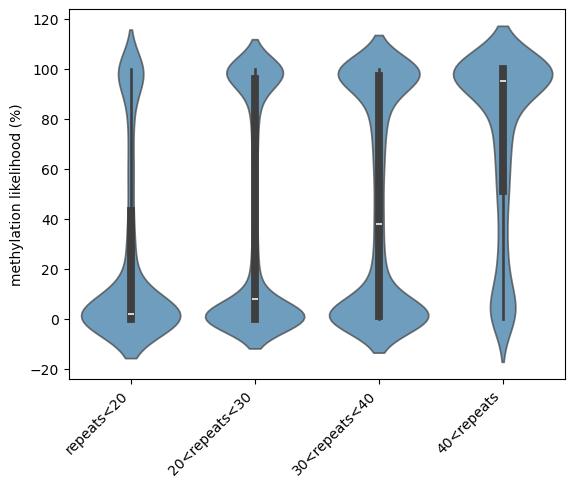

In [23]:
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_bps_fm, x='bp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_allreads_females.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

fragile_x_all//methylation_vs_repeats_allreads_female_kids.png


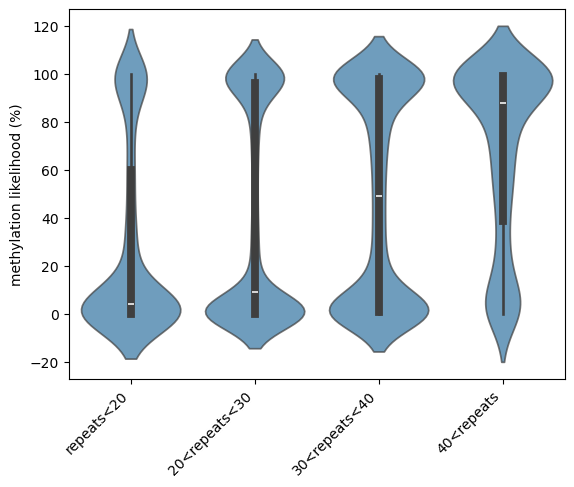

In [24]:
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_bps_fm_kid, x='bp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_allreads_female_kids.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [25]:
#this_df = df_bps_male.loc[(df_bps_male.hp_rep!='NA')].copy()
#this_df['hp_rep'] = this_df.hp_rep.astype(int)
#display(df_bps_male.loc[df_bps_male.bp_dev>60])
print(df_bps_male.loc[df_bps_male.bp_dev>60].subject.value_counts())
print(df_bps_male.loc[df_bps_male.bp_dev>60].bp_dev.value_counts())
print('repeats:')
print(df_bps_male.loc[df_bps_male.bp_dev>60].bp_dev.value_counts().index/3+20)

subject
REACH000560    71
REACH000557    38
REACH000516     9
Name: count, dtype: int64
bp_dev
63    71
79    38
66     9
Name: count, dtype: int64
repeats:
Index([41.0, 46.33333333333333, 42.0], dtype='float64', name='bp_dev')


fragile_x_all//methylation_vs_repeats_allreads_males.png


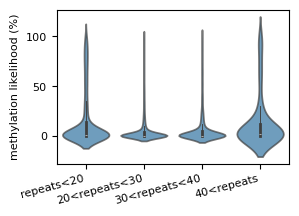

In [26]:
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
FS = 8
plt.figure(figsize=(3, 2))
sb.violinplot(data=df_bps_male, x='bp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width', inner_kws=dict(box_width=2))
plt.xticks(rotation=15, ha='right', fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('')
plt.ylabel('methylation likelihood (%)', fontsize=FS)
fig_name = f'{dir_fig}/methylation_vs_repeats_allreads_males.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

df_flt_fmr1 len: 22564
df_reads_fmr1 len: 397
df_hps_fmr1 len: 102
df_flt_xci len: 53069
df_reads_xci len: 2888
df_hps_xci len: 102
===================== for investigation ===================
haplotypes with hp_rep<23:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000161,hm,20,3,21.451389,33.107269,0.333333,0.57735,REACH000161,hm
REACH000216,hm,20,2,7.031250,3.609191,0.000000,0.00000,REACH000216,hm
REACH000226_sperm,hm,20,16,17.647112,16.655321,0.062500,0.25000,REACH000226_sperm,hm
REACH000286,hm,22,1,2.941176,NaN,0.000000,NaN,REACH000286,hm
REACH000403,hm,19,3,5.565517,3.043701,0.000000,0.00000,REACH000403,hm
REACH000478,hm,22,5,14.397018,10.262920,0.000000,0.00000,REACH000478,hm
REACH000604,hm,18,3,11.220581,8.658528,0.000000,0.00000,REACH000604,hm
REACH000681,hm,18,4,11.272027,9.676495,0.000000,0.00000,REACH000681,hm
REACH000707,hm,20,3,4.965278,4.421986,0.000000,0.00000,REACH000707,hm


haplotypes with hp_rep>35:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000058,hm,37,7,12.742508,6.459954,0.0,0.0,REACH000058,hm
REACH000441,hm,37,1,3.571429,NaN,0.0,NaN,REACH000441,hm
REACH000560,hm,41,1,9.281690,NaN,0.0,NaN,REACH000560,hm
REACH000653,hm,38,3,0.143590,0.146221,0.0,0.0,REACH000653,hm


this_df_hps num_reads>2:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000058,hm,37,7,12.742508,6.459954,0.000000,0.00000,REACH000058,hm
REACH000120,hm,24,3,13.174460,8.973196,0.000000,0.00000,REACH000120,hm
REACH000122,hm,30,5,11.797807,6.133524,0.000000,0.00000,REACH000122,hm
REACH000161,hm,20,3,21.451389,33.107269,0.333333,0.57735,REACH000161,hm
REACH000182,hm,30,3,9.192982,7.581140,0.000000,0.00000,REACH000182,hm
...,...,...,...,...,...,...,...,...,...
REACH000684,hm,28,6,4.816010,4.585366,0.000000,0.00000,REACH000684,hm
REACH000685,hm,26,5,4.666948,2.931965,0.000000,0.00000,REACH000685,hm
REACH000707,hm,20,3,4.965278,4.421986,0.000000,0.00000,REACH000707,hm


number of subjects: 63
Scikit learn LR model:
Coefficients: [-0.33340034]
Intercept: 17.024616513623865
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.271
Date:                Mon, 28 Apr 2025   Prob (F-statistic):            0.00905
Time:                        11:47:26   Log-Likelihood:                -169.54
No. Observations:                  63   AIC:                             343.1
Df Residuals:                      61   BIC:                             347.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

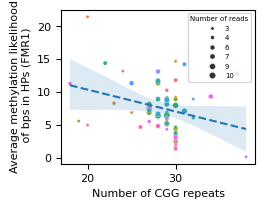

Scikit learn LR model:
Coefficients: [-0.00317958]
Intercept: 0.09497539975399755
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     5.271
Date:                Mon, 28 Apr 2025   Prob (F-statistic):             0.0251
Time:                        11:47:27   Log-Likelihood:                 113.44
No. Observations:                  63   AIC:                            -222.9
Df Residuals:                      61   BIC:                            -218.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

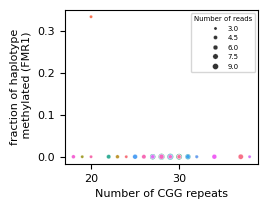

In [27]:
#### look at correlation between CGG repeat length and fraction of haplotypes methylated in males
df_reads_fmr1, df_hps_fmr1, df_reads_xci, df_hps_xci = reduce_df_bps(df_bps_male)

##### for investigation ######
print('===================== for investigation ===================')
df_this = df_hps_fmr1.loc[(df_hps_fmr1.hp_rep<23)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep<23:') #num_reads>2
display(df_this)

df_this = df_hps_fmr1.loc[(df_hps_fmr1.hp_rep>35)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep>35:') #num_reads>2
display(df_this)

#x_min=27; x_max=33; y_min=.49; y_max=.51
#df_this = df_hps_fmr1.loc[(df_hps_fmr1.hp_rep>x_min)&(df_hps_fmr1.hp_rep<x_max)&(df_hps_fmr1.methylation_mean_binary>y_min)&(df_hps_fmr1.methylation_mean_binary<y_max)]
##pd.set_option('display.max_rows', None)
#print(f'haplotypes with hp_rep>{x_min} & hp_rep<{x_max} & y>{y_min} & y<{y_max}:') #num_reads>2
#pd.set_option('display.max_rows', None)
#display(df_this)
print('==========================================')
##############################

### filter the sperm sample because the tissue is different
this_df_hps = df_hps_fmr1.loc[(df_hps_fmr1.num_reads>2) & (df_hps_fmr1.subject !='REACH000226_sperm')]
pd.set_option('display.max_rows', 10)
print('this_df_hps num_reads>2:')
display(this_df_hps)

num_subjects = len(set(this_df_hps['subject'].tolist()))
print(f'number of subjects: {num_subjects}')

FS = 8

### version 1
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=this_df_hps, x='hp_rep', y='methylation_mean', hue='subject', size='num_reads', sizes=(5,20)) # sizes gets a min max tuple interpreted by "size"
sb.regplot(data=this_df_hps, x='hp_rep', y='methylation_mean', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
plt.legend(title='Number of reads', loc='upper right', bbox_to_anchor=(1, 1), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3)
# Fit linear regression
x = np.array(this_df_hps.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(this_df_hps.methylation_mean.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(this_df_hps.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('Average methylation likelihood\n of bps in HPs (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
#**plt.xlim(xmax=52)
fig_name = f'{dir_fig}/bp_methylation_likelihood_vs_repeats_FMR1_MALES.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

### version 2
plt.figure(figsize=(2.5, 2))
df_hps_jitter = pd.DataFrame(this_df_hps)
df_hps_jitter['hp_rep'] = df_hps_jitter['hp_rep'].astype(float)
df_hps_jitter.loc[('REACH000453', 'h2'), 'hp_rep'] = 49.5
df_hps_jitter.loc[('REACH000461', 'h2'), 'hp_rep'] = 50.5
sb.scatterplot(data=df_hps_jitter, x='hp_rep', y='methylation_mean_binary', hue='subject', size='num_reads', sizes=(5,20)) # sizes gets a min max tuple interpreted by "size"
#**sb.regplot(data=this_df_hps, x='hp_rep', y='methylation_mean_binary', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
plt.legend(title='Number of reads', loc='upper right', bbox_to_anchor=(1, 1), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3) 
# Fit linear regression
x = np.array(this_df_hps.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(this_df_hps.methylation_mean_binary.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(this_df_hps.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')
x_t = 30
y_t = .1
p = model_sm.pvalues['hp_rep']
#**plt.text(x_t, y_t, f'p: {p:.2e}', fontsize=FS-2)

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
#plt.xlim(xmax=52)
fig_name = f'{dir_fig}/haplotype_readFrac_methylation_vs_repeats_FMR1_MALES.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

fragile_x_all//methylation_vs_repeats_h1h2reads_FMR1.png


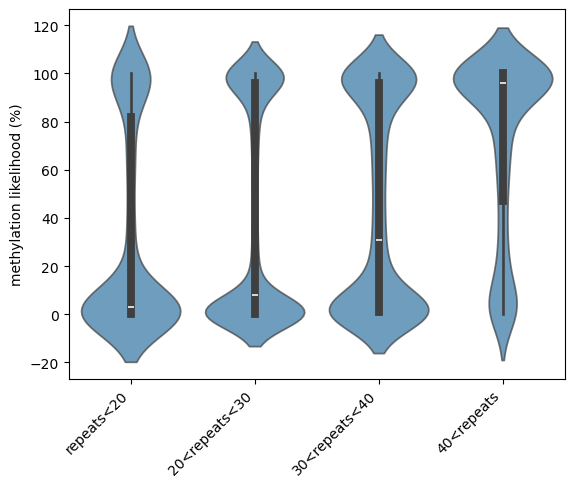

In [28]:
df_flt = df_bps_fm.loc[(df_bps_fm.hp_bp_dev!='NA')&(df_bps_fm.hp_bp_dev!='psNA')].copy()
df_flt['hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'hp_bp_dev', ignore_region=True), axis=1)
df_plt = df_flt.loc[df_flt.region_id=='FMR1_5UTR']
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_plt, x='hp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_h1h2reads_FMR1.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

fragile_x_all//methylation_vs_repeats_h1h2reads_XCI_othergenes.png


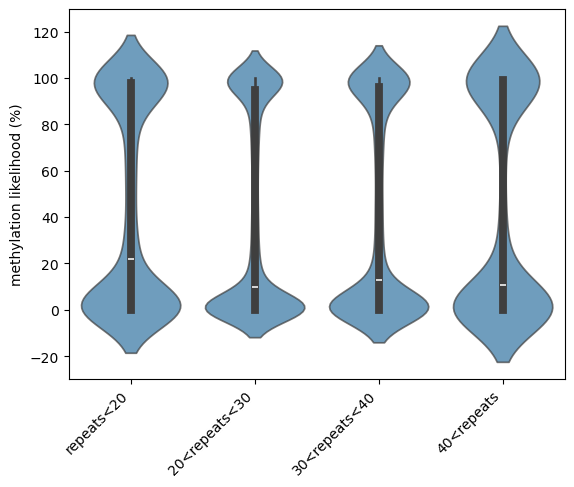

In [29]:
df_flt = df_bps_fm.loc[(df_bps_fm.hp_bp_dev!='NA')&(df_bps_fm.hp_bp_dev!='psNA')].copy()
df_flt['hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'hp_bp_dev', ignore_region=True), axis=1)
df_plt = df_flt.loc[df_flt.region_id!='FMR1_5UTR']
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_plt, x='hp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_h1h2reads_XCI_othergenes.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

fragile_x_all//methylation_vs_repeats_h1h2reads_allgenes.png


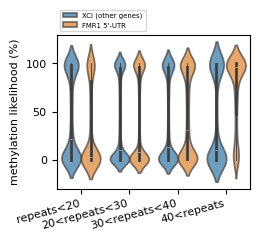

In [30]:
df_flt = df_bps_fm.loc[(df_bps_fm.hp_bp_dev!='NA')&(df_bps_fm.hp_bp_dev!='psNA')].copy()
df_flt['hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'hp_bp_dev', ignore_region=True), axis=1)
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
hue_order = ['XCI (other genes)', 'FMR1 UTR']
FS = 8
plt.figure(figsize=(2.5, 2))
ax = sb.violinplot(data=df_flt, x='hp_rep_status', y='methylation', hue='gene_tag', dodge=True, hue_order=hue_order, alpha=0.7, 
                   inner='box', order=order, density_norm='width', inner_kws=dict(box_width=2))
#sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=FS-3)
#legend = ax.get_legend()
#legend.set_title('')
ax.legend(handles=ax.legend_.legend_handles, labels=['XCI (other genes)', "FMR1 5'-UTR"], loc='lower left', bbox_to_anchor=(0, 1), fontsize=FS-3)
plt.xticks(rotation=15, ha='right', fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('')
plt.ylabel('methylation likelihood (%)', fontsize=FS)

#dx = .2
##x1, x2 = 3-dx, 3+dx   # columns (first column: 0, see plt.xticks())
#y, h, col = 130, 7, 'k'
#for idx, group in enumerate(order):
#    x1, x2 = idx-dx, idx+dx   # columns (first column: 0, see plt.xticks())
#    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#    plt.text((x1+x2)*.5, y+h, f"p: {pvalue_dict[group]:.2e}\n n: {num_obs_dict[group]}", ha='center', va='bottom', color=col)

fig_name = f'{dir_fig}/methylation_vs_repeats_h1h2reads_allgenes.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

In [ ]:
### the cells below are for scatter-like plots:

df_flt_fmr1 len: 19947
df_reads_fmr1 len: 359
df_hps_fmr1 len: 117
df_flt_xci len: 33543
df_reads_xci len: 2047
df_hps_xci len: 114


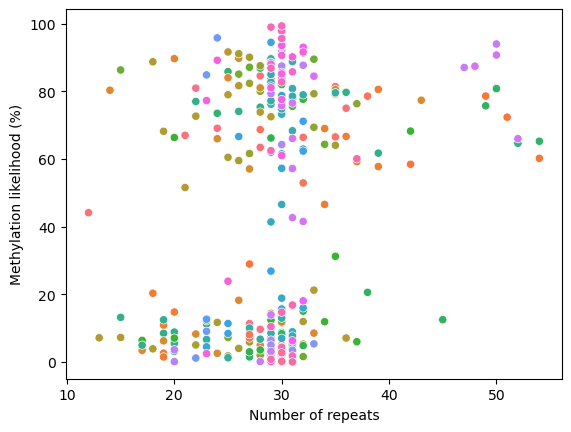

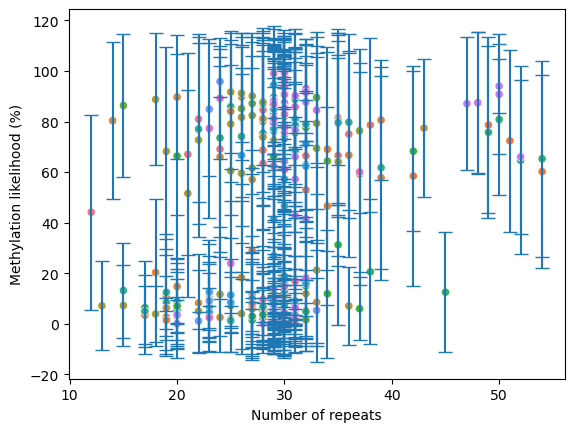

In [31]:
df_reads_fmr1, df_hps_fmr1, df_reads_xci, df_hps_xci = reduce_df_bps(df_bps_fm)

plt.figure()
sb.scatterplot(data=df_reads_fmr1, x='bp_rep', y='methylation_mean', hue='subject', legend=False)
plt.xlabel('Number of repeats')
plt.ylabel('Methylation likelihood (%)')
plt.show()
plt.close()

plt.figure()
sb.scatterplot(data=df_reads_fmr1, x='bp_rep', y='methylation_mean', hue='subject', legend=False)
plt.errorbar(df_reads_fmr1['bp_rep'], df_reads_fmr1['methylation_mean'], yerr=df_reads_fmr1['methylation_std'], fmt='none', capsize=5)
plt.xlabel('Number of repeats')
plt.ylabel('Methylation likelihood (%)')
plt.show()
plt.close()
#df_flt_fmr1.groupby(by='read_name')['methylation'].std()


In [ ]:
display(df_hps_fmr1.loc[df_hps_fmr1.subject=='REACH000519'])
display(df_reads_fmr1.loc[df_reads_fmr1.subject=='REACH000519'])

df_flt_fmr1 len: 19947
df_reads_fmr1 len: 359
df_hps_fmr1 len: 117
df_flt_xci len: 33543
df_reads_xci len: 2047
df_hps_xci len: 114
===================== for investigation ===================
haplotypes with hp_rep<23:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000294,h1,22,1,1.140000,NaN,0.000000,NaN,REACH000294,h1
REACH000401,h1,18,4,44.975787,46.411017,0.500000,0.577350,REACH000401,h1
REACH000404,h2,19,7,54.679653,34.752180,0.714286,0.487950,REACH000404,h2
REACH000420,h1,20,6,6.044481,2.189809,0.000000,0.000000,REACH000420,h1
REACH000435,h2,22,3,6.859690,4.220148,0.000000,0.000000,REACH000435,h2
REACH000479,h2,19,6,21.770969,29.696086,0.166667,0.408248,REACH000479,h2
REACH000482,h2,20,3,26.597935,34.442905,0.333333,0.577350,REACH000482,h2
REACH000519,h2,21,4,28.457060,32.386450,0.250000,0.500000,REACH000519,h2
REACH000755,h1,20,3,30.477754,49.626784,0.333333,0.577350,REACH000755,h1


haplotypes with hp_rep>45:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000451,h2,49,2,90.546320,4.920973,1.00,0.0,REACH000451,h2
REACH000453,h2,50,3,81.419051,13.431833,1.00,0.0,REACH000453,h2
REACH000561,h2,50,4,67.418848,9.705172,1.00,0.0,REACH000561,h2
REACH000563,h1,49,4,58.579873,31.405029,0.75,0.5,REACH000563,h1


haplotypes with hp_rep>27 & hp_rep<33 & y>0.49 & y<0.51:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject        hp_tag                                                         
REACH000089    h1          30          2         31.767857        42.098107   
REACH000107    h1          29          4         43.960021        46.773873   
REACH000314    h1          29          4         43.647400        44.243599   
               h2          31          2         39.386419        33.321498   
REACH000316    h2          29          2         64.092857        32.092546   
REACH000365    h1          30          6         47.325217        49.927682   
REACH000530_PB h2          31          2         49.659791        61.365461   
REACH000541    h1          29          2         39.761006        50.306867   
REACH000565    h2          32          2         42.972727        47.221876   
REACH000579    h2          28          2         46.564327        63.337746   
REACH000581    h1          28          4         34.610856        38.572900   
REACH000628    h1          30          4         38.763158        46.068143   
REACH000674    h2          30          6         46.532769        49.370513   

                       methylation_mean_binary  methylation_std_binary  \
subject        hp_tag                                                    
REACH000089    h1                          0.5                0.707107   
REACH000107    h1                          0.5                0.577350   
REACH000314    h1                          0.5                0.577350   
               h2                          0.5                0.707107   
REACH000316    h2                          0.5                0.707107   
REACH000365    h1                          0.5                0.547723   
REACH000530_PB h2                          0.5                0.707107   
REACH000541    h1                          0.5                0.707107   
REACH000565    h2                          0.5                0.707107   
REACH000579    h2                          0.5                0.707107   
REACH000581    h1                          0.5                0.577350   
REACH000628    h1                          0.5                0.577350   
REACH000674    h2                          0.5                0.547723   

                              subject hp_tag  
subject        hp_tag                         
REACH000089    h1         REACH000089     h1  
REACH000107    h1         REACH000107     h1  
REACH000314    h1         REACH000314     h1  
               h2         REACH000314     h2  
REACH000316    h2         REACH000316     h2  
REACH000365    h1         REACH000365     h1  
REACH000530_PB h2      REACH000530_PB     h2  
REACH000541    h1         REACH000541     h1  
REACH000565    h2         REACH000565     h2  
REACH000579    h2         REACH000579     h2  
REACH000581    h1         REACH000581     h1  
REACH000628    h1         REACH000628     h1  
REACH000674    h2         REACH000674     h2

this_df_hps num_reads>2:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000087 h2          30          4         59.431413        31.915171   
REACH000089 h2          30          3         55.854861        41.103003   
REACH000092 h2          29          5         47.627256        36.986086   
REACH000093 h1          29          4         83.919643         6.748338   
REACH000107 h1          29          4         43.960021        46.773873   
...                    ...        ...               ...              ...   
REACH000682 h1          29          3          4.507125         3.389182   
REACH000702 h1          29          6         28.637914        44.252899   
            h2          30          8         72.080279        30.669235   
REACH000727 h1          30          3         86.355011        11.607663   
REACH000755 h1          20          3         30.477754        49.626784   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000087 h2                     0.750000                0.500000   
REACH000089 h2                     0.666667                0.577350   
REACH000092 h2                     0.600000                0.547723   
REACH000093 h1                     1.000000                0.000000   
REACH000107 h1                     0.500000                0.577350   
...                                     ...                     ...   
REACH000682 h1                     0.000000                0.000000   
REACH000702 h1                     0.333333                0.516398   
            h2                     0.875000                0.353553   
REACH000727 h1                     1.000000                0.000000   
REACH000755 h1                     0.333333                0.577350   

                        subject hp_tag  
subject     hp_tag                      
REACH000087 h2      REACH000087     h2  
REACH000089 h2      REACH000089     h2  
REACH000092 h2      REACH000092     h2  
REACH000093 h1      REACH000093     h1  
REACH000107 h1      REACH000107     h1  
...                         ...    ...  
REACH000682 h1      REACH000682     h1  
REACH000702 h1      REACH000702     h1  
            h2      REACH000702     h2  
REACH000727 h1      REACH000727     h1  
REACH000755 h1      REACH000755     h1  

[66 rows x 8 columns]

number of subjects: 45
Scikit learn LR model:
Coefficients: [1.38978438]
Intercept: 2.5646370772864913
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     9.311
Date:                Mon, 28 Apr 2025   Prob (F-statistic):            0.00331
Time:                        11:47:58   Log-Likelihood:                -296.51
No. Observations:                  66   AIC:                             597.0
Df Residuals:                      64   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

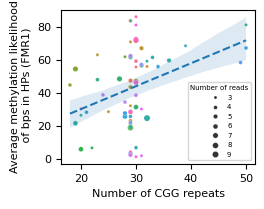

Scikit learn LR model:
Coefficients: [0.02166684]
Intercept: -0.13041522158803887
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     13.98
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           0.000398
Time:                        11:47:58   Log-Likelihood:                -8.4716
No. Observations:                  66   AIC:                             20.94
Df Residuals:                      64   BIC:                             25.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

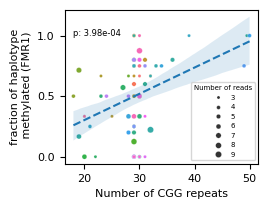

In [32]:
df_reads_fmr1, df_hps_fmr1, df_reads_xci, df_hps_xci = reduce_df_bps(df_bps_fm)

##### for investigation ######
print('===================== for investigation ===================')
df_this = df_hps_fmr1.loc[(df_hps_fmr1.hp_rep<23)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep<23:') #num_reads>2
display(df_this)

df_this = df_hps_fmr1.loc[(df_hps_fmr1.hp_rep>45)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep>45:') #num_reads>2
display(df_this)

x_min=27; x_max=33; y_min=.49; y_max=.51
df_this = df_hps_fmr1.loc[(df_hps_fmr1.hp_rep>x_min)&(df_hps_fmr1.hp_rep<x_max)&(df_hps_fmr1.methylation_mean_binary>y_min)&(df_hps_fmr1.methylation_mean_binary<y_max)]
#pd.set_option('display.max_rows', None)
print(f'haplotypes with hp_rep>{x_min} & hp_rep<{x_max} & y>{y_min} & y<{y_max}:') #num_reads>2
pd.set_option('display.max_rows', None)
display(df_this)
print('==========================================')
##############################

this_df_hps = df_hps_fmr1.loc[df_hps_fmr1.num_reads>2]
pd.set_option('display.max_rows', 10)
print('this_df_hps num_reads>2:')
display(this_df_hps)

num_subjects = len(set(this_df_hps['subject'].tolist()))
print(f'number of subjects: {num_subjects}')

FS = 8

### version 1
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=this_df_hps, x='hp_rep', y='methylation_mean', hue='subject', size='num_reads', sizes=(5,20)) # sizes gets a min max tuple interpreted by "size"
sb.regplot(data=this_df_hps, x='hp_rep', y='methylation_mean', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
plt.legend(title='Number of reads', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3)
# Fit linear regression
x = np.array(this_df_hps.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(this_df_hps.methylation_mean.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(this_df_hps.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('Average methylation likelihood\n of bps in HPs (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/bp_methylation_likelihood_vs_repeats_FMR1.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

### version 2
plt.figure(figsize=(2.5, 2))
df_hps_jitter = pd.DataFrame(this_df_hps)
df_hps_jitter['hp_rep'] = df_hps_jitter['hp_rep'].astype(float)
df_hps_jitter.loc[('REACH000453', 'h2'), 'hp_rep'] = 49.5
df_hps_jitter.loc[('REACH000461', 'h2'), 'hp_rep'] = 50.5
sb.scatterplot(data=df_hps_jitter, x='hp_rep', y='methylation_mean_binary', hue='subject', size='num_reads', sizes=(5,20)) # sizes gets a min max tuple interpreted by "size"
sb.regplot(data=this_df_hps, x='hp_rep', y='methylation_mean_binary', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
plt.legend(title='Number of reads', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3) 
# Fit linear regression
x = np.array(this_df_hps.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(this_df_hps.methylation_mean_binary.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(this_df_hps.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')
x_t = 18
y_t = 1
p = model_sm.pvalues['hp_rep']
plt.text(x_t, y_t, f'p: {p:.2e}', fontsize=FS-2, ha='left')

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (FMR1)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/haplotype_readFrac_methylation_vs_repeats_FMR1.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

In [ ]:
### OLS for XCI other genes

df_flt_fmr1 len: 19947
df_reads_fmr1 len: 359
df_hps_fmr1 len: 117
df_flt_xci len: 33543
df_reads_xci len: 2047
df_hps_xci len: 114


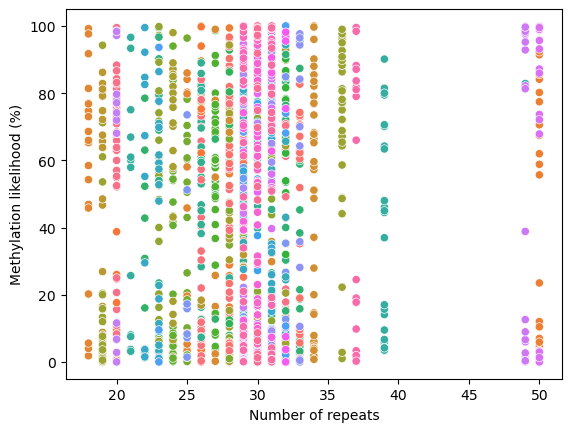

===================== for investigation ===================
haplotypes with hp_rep<23:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000294,h1,22,9,57.352651,37.508377,0.666667,0.500000,REACH000294,h1
REACH000401,h1,18,19,58.329904,30.665538,0.684211,0.477567,REACH000401,h1
REACH000404,h2,19,21,46.995576,32.264201,0.523810,0.511766,REACH000404,h2
REACH000420,h1,20,9,11.290159,13.687711,0.000000,0.000000,REACH000420,h1
REACH000435,h2,22,12,24.898338,27.818974,0.250000,0.452267,REACH000435,h2
REACH000479,h2,19,32,18.162667,27.654599,0.187500,0.396558,REACH000479,h2
REACH000482,h2,20,43,53.574915,29.571198,0.697674,0.464701,REACH000482,h2
REACH000519,h2,21,13,43.250863,35.740993,0.538462,0.518875,REACH000519,h2
REACH000755,h1,20,15,51.713706,40.257137,0.600000,0.507093,REACH000755,h1


haplotypes with hp_rep>45:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000451,h2,49,27,41.651123,45.746096,0.407407,0.500712,REACH000451,h2
REACH000453,h2,50,24,45.121808,45.900766,0.500000,0.510754,REACH000453,h2
REACH000561,h2,50,20,44.850301,35.781359,0.550000,0.510418,REACH000561,h2
REACH000563,h1,49,1,82.857143,NaN,1.000000,NaN,REACH000563,h1


this_df_hps num_reads>2:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000087 h1          30          9         35.944841        39.181304   
            h2          30          7         59.863159        34.534200   
REACH000089 h1          30          5         49.798303        31.780398   
            h2          30          3         75.888889        21.647539   
REACH000092 h1          31         22         20.957186        28.692205   
...                    ...        ...               ...              ...   
REACH000727 h1          30         21         64.084070        39.921118   
REACH000752 h1          33         14         41.658049        40.894232   
REACH000755 h1          20         15         51.713706        40.257137   
REACH000763 h2          31         14         69.680573        37.437119   
REACH000766 h2          31         18         51.360592        40.967890   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000087 h1                     0.333333                0.500000   
            h2                     0.714286                0.487950   
REACH000089 h1                     0.800000                0.447214   
            h2                     1.000000                0.000000   
REACH000092 h1                     0.181818                0.394771   
...                                     ...                     ...   
REACH000727 h1                     0.714286                0.462910   
REACH000752 h1                     0.428571                0.513553   
REACH000755 h1                     0.600000                0.507093   
REACH000763 h2                     0.785714                0.425815   
REACH000766 h2                     0.611111                0.501631   

                        subject hp_tag  
subject     hp_tag                      
REACH000087 h1      REACH000087     h1  
            h2      REACH000087     h2  
REACH000089 h1      REACH000089     h1  
            h2      REACH000089     h2  
REACH000092 h1      REACH000092     h1  
...                         ...    ...  
REACH000727 h1      REACH000727     h1  
REACH000752 h1      REACH000752     h1  
REACH000755 h1      REACH000755     h1  
REACH000763 h2      REACH000763     h2  
REACH000766 h2      REACH000766     h2  

[113 rows x 8 columns]

number of subjects: 65
Scikit learn LR model:
Coefficients: [0.22280458]
Intercept: 35.94898665601864
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7027
Date:                Mon, 28 Apr 2025   Prob (F-statistic):              0.404
Time:                        11:48:07   Log-Likelihood:                -457.78
No. Observations:                 113   AIC:                             919.6
Df Residuals:                     111   BIC:                             925.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

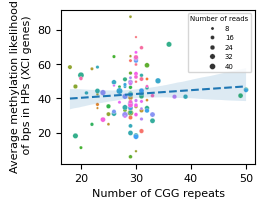

Scikit learn LR model:
Coefficients: [0.00121861]
Intercept: 0.43711993010692685
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1160
Date:                Mon, 28 Apr 2025   Prob (F-statistic):              0.734
Time:                        11:48:08   Log-Likelihood:                 29.006
No. Observations:                 113   AIC:                            -54.01
Df Residuals:                     111   BIC:                            -48.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

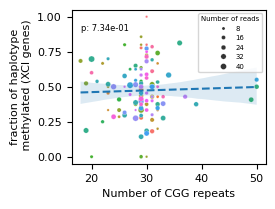

In [33]:
pd.set_option('display.max_rows', 10)
df_reads_fmr1, df_hps_fmr1, df_reads_xci, df_hps_xci = reduce_df_bps(df_bps_fm)

plt.figure()
sb.scatterplot(data=df_reads_xci, x='hp_rep', y='methylation_mean', hue='subject', legend=False)
#plt.errorbar(df_reads['bp_rep'], df_reads['methylation_mean'], yerr=df_reads['methylation_std'], fmt='none', capsize=5)
plt.xlabel('Number of repeats')
plt.ylabel('Methylation likelihood (%)')
plt.show()
plt.close()

##### for investigation ######
print('===================== for investigation ===================')
df_this = df_hps_xci.loc[(df_hps_xci.hp_rep<23)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep<23:') #num_reads>2
display(df_this)

df_this = df_hps_xci.loc[(df_hps_xci.hp_rep>45)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep>45:') #num_reads>2
display(df_this)
print('==========================================')
##############################

this_df_hps = df_hps_xci.loc[df_hps_xci.num_reads>2]
#pd.set_option('display.max_rows', None)
print('this_df_hps num_reads>2:')
display(this_df_hps)

num_subjects = len(set(this_df_hps['subject'].tolist()))
print(f'number of subjects: {num_subjects}')

### version 1
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=this_df_hps, x='hp_rep', y='methylation_mean', hue='subject', size='num_reads', sizes=(3,20)) # sizes gets a min max tuple interpreted by "size"
sb.regplot(data=this_df_hps, x='hp_rep', y='methylation_mean', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
plt.legend(title='Number of reads', loc='upper right', bbox_to_anchor=(1, 1), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3) 
# Fit linear regression
x = np.array(this_df_hps.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(this_df_hps.methylation_mean.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(this_df_hps.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('Average methylation likelihood\n of bps in HPs (XCI genes)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/bp_methylation_likelihood_vs_repeats_XCI.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

### version 2
plt.figure(figsize=(2.5, 2))
sb.scatterplot(data=this_df_hps, x='hp_rep', y='methylation_mean_binary', hue='subject', size='num_reads', sizes=(3,20)) # sizes gets a min max tuple interpreted by "size"
sb.regplot(data=this_df_hps, x='hp_rep', y='methylation_mean_binary', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
plt.legend(title='Number of reads', loc='upper right', bbox_to_anchor=(1, 1), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3)
# Fit linear regression
x = np.array(this_df_hps.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(this_df_hps.methylation_mean_binary.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(this_df_hps.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())
x_t = 18
y_t = .9
p = model_sm.pvalues['hp_rep']
plt.text(x_t, y_t, f'p: {p:.2e}', fontsize=FS-2, ha='left')

plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('fraction of haplotype\n methylated (XCI genes)', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/haplotype_readFrac_methylation_vs_repeats_XCI.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

df_flt_fmr1 len: 19947
df_reads_fmr1 len: 359
df_hps_fmr1 len: 117
df_flt_xci len: 33543
df_reads_xci len: 2047
df_hps_xci len: 114
number of subjects: 43
===================== for investigation ===================
haplotypes with methylation_mean_binary_xci<.1:


,,hp_rep_fmr1,num_reads_fmr1,methylation_mean_fmr1,methylation_mean_binary_fmr1,hp_rep_xci,num_reads_xci,methylation_mean_xci,methylation_mean_binary_xci
subject,hp_tag,,,,,,,,
REACH000365,h1,30,6,47.325217,0.500,30,4,9.200000,0.0
REACH000418,h2,29,8,19.076047,0.125,29,14,5.971627,0.0
REACH000420,h1,20,6,6.044481,0.000,20,9,11.290159,0.0


haplotypes with methylation_mean_binary_xci>.9:


,,hp_rep_fmr1,num_reads_fmr1,methylation_mean_fmr1,methylation_mean_binary_fmr1,hp_rep_xci,num_reads_xci,methylation_mean_xci,methylation_mean_binary_xci
subject,hp_tag,,,,,,,,
REACH000089,h2,30,3,55.854861,0.666667,30,3,75.888889,1.0


haplotypes with hp_rep_fmr1<23:


,,hp_rep_fmr1,num_reads_fmr1,methylation_mean_fmr1,methylation_mean_binary_fmr1,hp_rep_xci,num_reads_xci,methylation_mean_xci,methylation_mean_binary_xci
subject,hp_tag,,,,,,,,
REACH000401,h1,18,4,44.975787,0.500000,18,19,58.329904,0.684211
REACH000404,h2,19,7,54.679653,0.714286,19,21,46.995576,0.523810
REACH000420,h1,20,6,6.044481,0.000000,20,9,11.290159,0.000000
REACH000435,h2,22,3,6.859690,0.000000,22,12,24.898338,0.250000
REACH000479,h2,19,6,21.770969,0.166667,19,32,18.162667,0.187500
REACH000482,h2,20,3,26.597935,0.333333,20,43,53.574915,0.697674
REACH000519,h2,21,4,28.457060,0.250000,21,13,43.250863,0.538462
REACH000755,h1,20,3,30.477754,0.333333,20,15,51.713706,0.600000


haplotypes with hp_rep_fmr1>40:


,,hp_rep_fmr1,num_reads_fmr1,methylation_mean_fmr1,methylation_mean_binary_fmr1,hp_rep_xci,num_reads_xci,methylation_mean_xci,methylation_mean_binary_xci
subject,hp_tag,,,,,,,,
REACH000453,h2,50,3,81.419051,1.0,50,24,45.121808,0.50
REACH000561,h2,50,4,67.418848,1.0,50,20,44.850301,0.55


stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     12.87
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.23e-05
Time:                        11:48:23   Log-Likelihood:                -4.0608
No. Observations:                  63   AIC:                             14.12
Df Residuals:                      60   BIC:                             20.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const

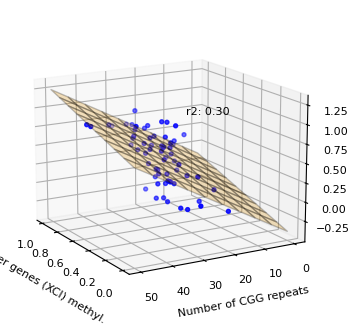

stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     9.913
Date:                Mon, 28 Apr 2025   Prob (F-statistic):            0.00254
Time:                        11:48:25   Log-Likelihood:                -10.562
No. Observations:                  63   AIC:                             25.12
Df Residuals:                      61   BIC:                             29.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const

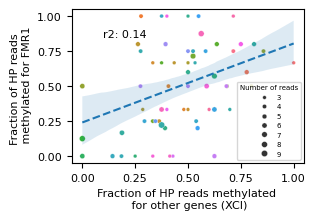

stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     13.67
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           0.000468
Time:                        11:48:26   Log-Likelihood:                -8.9342
No. Observations:                  63   AIC:                             21.87
Df Residuals:                      61   BIC:                             26.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1972      0.193    

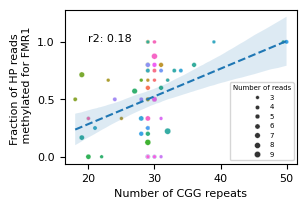

In [34]:
### Multivariate OLS
### investigate all females with consistant h1/h2 for FMR1 and XCI, after checking for phase sets
### linear regression of FMR1 methylation as a function of XCI and CGG repeat
df_reads_fmr1, df_hps_fmr1, df_reads_xci, df_hps_xci = reduce_df_bps(df_bps_fm)

cols = ['hp_rep', 'num_reads', 'methylation_mean', 'methylation_mean_binary']
#pd.set_option('display.max_rows', None)
df_merge = pd.merge(df_hps_fmr1[cols], df_hps_xci[cols], left_index=True, right_index=True, how='inner', suffixes=('_fmr1', '_xci'))
df_merge = df_merge.loc[(df_merge.num_reads_fmr1>2)&(df_merge.num_reads_xci>2)]
#print('df_merge:')
#display(df_merge)
pd.set_option('display.max_rows', 10)

num_subjects = len(set(df_merge.index.get_level_values('subject').tolist()))
print(f'number of subjects: {num_subjects}')

##### for investigation ######
print('===================== for investigation ===================')
df_this = df_merge.loc[(df_merge.methylation_mean_binary_xci<.1)]
#pd.set_option('display.max_rows', None)
print('haplotypes with methylation_mean_binary_xci<.1:') #num_reads>2
display(df_this)

df_this = df_merge.loc[(df_merge.methylation_mean_binary_xci>.9)]
#pd.set_option('display.max_rows', None)
print('haplotypes with methylation_mean_binary_xci>.9:') #num_reads>2
display(df_this)

df_this = df_merge.loc[(df_merge.hp_rep_fmr1<23)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep_fmr1<23:') #num_reads>2
display(df_this)

df_this = df_merge.loc[(df_merge.hp_rep_fmr1>40)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep_fmr1>40:') #num_reads>2
display(df_this)

#x_min=27; x_max=33; y_min=.49; y_max=.51
#df_this = df_hps.loc[(df_hps.hp_rep>x_min)&(df_hps.hp_rep<x_max)&(df_hps.methylation_mean_binary>y_min)&(df_hps.methylation_mean_binary<y_max)]
#pd.set_option('display.max_rows', None)
#print(f'haplotypes with hp_rep>{x_min} & hp_rep<{x_max} & y>{y_min} & y<{y_max}:') #num_reads>2
#pd.set_option('display.max_rows', None)
#display(df_this)
print('==========================================')
##############################

### multi variate linear model: methylation_fmr1 ~ methylation_xci + hp_rep
X = pd.DataFrame(df_merge[['methylation_mean_binary_xci', 'hp_rep_fmr1']])
X_const = sm.add_constant(X)  # Adds intercept term
#print('X_const:')
#display(X_const)
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

print(model_sm.params)
print(model_sm.params.methylation_mean_binary_xci)
print(model_sm.params.hp_rep_fmr1)
x_plane = np.linspace(0, 1, 10)  # Define grid for the plane
y_plane = np.linspace(0, 50, 10)
a = model_sm.params.methylation_mean_binary_xci
b = model_sm.params.hp_rep_fmr1
c = model_sm.params.const
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = a * x_plane + b * y_plane + c  # Compute corresponding z values

FS = 8

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.methylation_mean_binary_xci.tolist(), X.hp_rep_fmr1.tolist(), y, color='blue', label='Data Points', s=8)
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.25, color='orange', label='Fitted Plane', edgecolor='black')
x_t =0.8 ; y_t = 10; z_t = 0.8
ax.text(x_t, y_t, z_t, f'r2: {r2:.2f}', fontsize=FS)
ax.set_xlabel('Other genes (XCI) methyl.', fontsize=FS)
ax.set_ylabel('Number of CGG repeats', fontsize=FS)
ax.set_zlabel('FMR1 methyl.', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
#plt.zticks(fontsize=FS)
ax.tick_params(axis='z', labelsize=FS)
ax.set_title('')
ax.view_init(elev=15, azim=150)
#plt.tight_layout()
fig_name = f'{dir_fig}/3D_FMR1_methyl_vs_XCI_methyl_and_CGG_repeat.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', pad_inches=.3, dpi=1200)
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_merge[['methylation_mean_binary_xci']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.figure(figsize=(3, 2))
sb.scatterplot(data=df_merge, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', hue='subject', size='num_reads_fmr1', sizes=(7,20))
sb.regplot(data=df_merge, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
x_t =0.1 ; y_t = 0.85
plt.text(x_t, y_t, f'r2: {r2:.2f}', fontsize=FS)
plt.legend(title='Number of reads', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[num_subjects+2:], fontsize=FS-3, title_fontsize=FS-3)
plt.xlabel('Fraction of HP reads methylated \n for other genes (XCI)', fontsize=FS)
plt.ylabel('Fraction of HP reads \n methylated for FMR1', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/FMR1_methyl_vs_XCI_methyl.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_merge[['hp_rep_fmr1']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
r2 = model_sm.rsquared
# Get summary
print('stats model:')
print(model_sm.summary())
print(f'p-values: {model_sm.pvalues}')

plt.figure(figsize=(3, 2))
df_merge_jitter = pd.DataFrame(df_merge)
df_merge_jitter['hp_rep_fmr1'] = df_merge_jitter['hp_rep_fmr1'].astype(float)
df_merge_jitter.loc[('REACH000453', 'h2'), 'hp_rep_fmr1'] = 49.5
df_merge_jitter.loc[('REACH000461', 'h2'), 'hp_rep_fmr1'] = 50.5
sb.scatterplot(data=df_merge_jitter, x='hp_rep_fmr1', y='methylation_mean_binary_fmr1', hue='subject', size='num_reads_fmr1', sizes=(7,20))
sb.regplot(data=df_merge, x='hp_rep_fmr1', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
x_t =20 ; y_t = 1
plt.text(x_t, y_t, f'r2: {r2:.2f}', fontsize=FS)
plt.legend(title='Number of reads', loc='lower right', bbox_to_anchor=(1, 0), 
           handles=plt.gca().legend_.legend_handles[num_subjects+3:], fontsize=FS-3, title_fontsize=FS-3)
plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('Fraction of HP reads \n methylated for FMR1', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/FMR1_methyl_vs_CGG_repeats.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

In [ ]:
#### plot comparison of LongTR and snooptr genotypes
### plot repeat length distribution for all samples

#df_hps_all.index.get_level_values('subject').value_counts()
#df_hps_all.loc[('REACH000402', slice(None)), :]
df_hps_all = pd.DataFrame()
# consider only h1 and h2 reads
df_hps_all['hp_rep'] = df_bps.loc[((df_bps.hp_rep!='NA')&
                                   (df_bps.hp_rep!='psNA')&
                                   (df_bps.region_id=='FMR1_5UTR'))].groupby(by=['subject', 'hp_tag'])['hp_rep'].first()
df_hps_all['longtr_hp_rep'] = df_hps_all.index.map(lambda x: df_ltr.loc[x, 'hp_rep'] if x in df_ltr.index else 'NA')
#pd.set_option('display.max_rows', 10)
print('df_hps_all:')
display(df_hps_all)
print(f'total number of subjects: {len(set((df_hps_all.index.get_level_values("subject").tolist())))}')

this_df = df_hps_all.loc[df_hps_all.longtr_hp_rep != "NA"].copy()
this_df.longtr_hp_rep = this_df.longtr_hp_rep.astype(int)

### investigate extreme case subjects
display(this_df.loc[(this_df.longtr_hp_rep>44)|(this_df.hp_rep>44)])

#**df_hps_all_corr = pd.DataFrame(df_hps_all['hp_rep'])
#**#df_hps_all_corr.loc[('REACH000066', 'h1')] = 1000
#**print('df_hps_all_corr:')
#**display(df_hps_all_corr)
#**for subject in set(df_hps_all_corr.index.get_level_values('subject')):
#**    for hp_tag in ['h1', 'h2']
#**    if (subj)
#**    print(f'subject: {subject}')
    
FS = 8

plt.figure()
#plt.plot(this_df.hp_rep, this_df.longtr_hp_rep, 'o')
sb.scatterplot(data=this_df, x='hp_rep', y='longtr_hp_rep', hue='subject', legend=False)
plt.plot([15, 50], [15, 50], '--')
fig_name = f'{dir_fig}/compare_longtr_snooptr_gts.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(3, 2))
sb.histplot(data=df_hps_all, x='hp_rep')
plt.xlabel('Number of CGG repeats', fontsize=FS)
plt.ylabel('Counts', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
fig_name = f'{dir_fig}/dist_num_repeats_snoopsv.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight', dpi=1200)
plt.show()
plt.close()

plt.figure()
sb.histplot(data=df_hps_all.loc[df_hps_all.longtr_hp_rep!='NA'], x='longtr_hp_rep')
plt.xlabel('Number of CGG repeats')
plt.ylabel('Subject count')
fig_name = f'{dir_fig}/dist_num_repeats_longtr.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
### the cells below are for long hp vs short hp plots:

In [ ]:
### filter the df to samples with both h1 and h2 (_comp) and only include phased reads in FMR1 and other genes
samples_h1_h2 = list(hp_info_dict_comp.keys())
df_flt = df_bps.loc[df_bps.subject.isin(samples_h1_h2) & df_bps.hp_tag.isin(['h1', 'h2'])].copy()
print(f'number of subjects in the filtered df: {len(set(df_flt.subject.tolist()))}')
print('df_flt filter for h1/h2 complete samples and no h0 reads:')
display(df_flt)

### determine for each sample h1/h2 is "long hp" or "short hp"
def get_length_status(row, info_dict):
    hp_status = 'NA'
    long_hp_dev = -10000
    h1_bp_dev = info_dict[row['subject']]['h1']
    h2_bp_dev = info_dict[row['subject']]['h2']
    if h1_bp_dev > h2_bp_dev:
        long_hp_dev = h1_bp_dev
        if row['hp_tag'] == 'h1':
            hp_status = 'long hp'
        elif row['hp_tag'] == 'h2':
            hp_status = 'short hp'
    if h1_bp_dev < h2_bp_dev:
        long_hp_dev = h2_bp_dev
        if row['hp_tag'] == 'h1':
            hp_status = 'short hp'
        elif row['hp_tag'] == 'h2':
            hp_status = 'long hp'
    hp_rep = -10000
    if row['hp_tag'] == 'h1':
        hp_rep = round(h1_bp_dev / 3) + 20
    elif row['hp_tag'] == 'h2':
        hp_rep = round(h2_bp_dev / 3) + 20
    
    hp_bp_dev = -10000
    if row['hp_tag'] == 'h1':
        hp_bp_dev = h1_bp_dev
    elif row['hp_tag'] == 'h2':
        hp_bp_dev = h2_bp_dev
    return hp_status, hp_rep, hp_bp_dev, long_hp_dev

df_flt['hp_status'] = df_flt.apply(lambda row: get_length_status(row, hp_info_dict_comp)[0], axis=1)
df_flt['hp_rep'] = df_flt.apply(lambda row: get_length_status(row, hp_info_dict_comp)[1], axis=1)
df_flt['hp_bp_dev'] = df_flt.apply(lambda row: get_length_status(row, hp_info_dict_comp)[2], axis=1)
df_flt['long_hp_bp_dev'] = df_flt.apply(lambda row: get_length_status(row, hp_info_dict_comp)[3], axis=1)
df_flt['hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'hp_bp_dev'), axis=1)
df_flt['long_hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'long_hp_bp_dev'), axis=1)
print('df_flt:')
display(df_flt)
print('df_flt for sample:')
pd.set_option('display.max_rows', 10)
display(df_flt.loc[(df_flt.subject=='REACH000453')])
#print(df_flt.loc[(df_flt.subject=='REACH000453')]['status'].value_counts())
print(df_flt.hp_status.value_counts())

In [ ]:
#pd.set_option('display.max_rows', None)
#display(df_flt)
groups = ['20<repeats<30', '30<repeats<40', '40<repeats']
for group in groups:
    print(group)
    df_tmp = df_flt.loc[(df_flt.hp_status=='long hp') & (df_flt.hp_rep_status==group)]
    #display(df_tmp)
    samples_group = list(set(df_tmp.subject.tolist()))
    print(f'number of samples: {len(samples_group)}')
    df_group = df_flt.loc[df_flt.subject.isin(samples_group)]
    #display(df_group)
    margins = [x for x in group.split('<') if x != 'repeats']
    print(margins)
    order = ['XCI (other genes)', group]
    hue_order = ['short hp', 'long hp']
    plt.figure()
    sb.violinplot(data=df_group, x='long_hp_rep_status', y='methylation', hue='hp_status', dodge=True, hue_order=hue_order, alpha=0.7, inner='box', order=order)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.legend(loc="upper left")
    fig_name = f'{dir_fig}/methylation_vs_repeats_longHP_{"_".join(margins)}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()
    